In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore", message=".*Tight layout not applied.*")

In [2]:
df = pd.read_csv("final_economic_data.csv")

### Preprocessing

In [3]:
df_total = df[df["Municipality"] == "TOTAL"].copy()
df_total["Region"] = df_total["Region"].astype(str).str.strip().astype(int)
df_total = df_total[(df_total["Region"] != 3) & (df_total["Region"] != 20)]
regions = sorted(df_total["Region"].unique())

trade_cols = ["Exports (euro)", "Imports (euro)"]

sector_cols = [
    "Gross value added (millions of euro), A Agriculture, forestry and fishing (01-03)",
    "Gross value added (millions of euro), B Mining and quarrying (05-09)",
    "Gross value added (millions of euro), F Construction (41-43)",
    "Gross value added (millions of euro), G Wholesale and retail trade; repair of motor vehicles and motorcycles (45-47)",
    "Gross value added (millions of euro), H Transportation and storage (49-53)",
    "Gross value added (millions of euro), I Accommodation and food service activities (55-56)",
    "Gross value added (millions of euro), J Information and communication (58-63)",
    "Gross value added (millions of euro), K Financial and insurance activities (64-66)",
    "Gross value added (millions of euro), M Professional, scientific and technical activities (69-75)",
    "Gross value added (millions of euro), N Administrative and support service activities (77-82)",
    "Gross value added (millions of euro), O Public administration and defence; compulsory social security (84)",
    "Gross value added (millions of euro), P Education (85)",
    "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
    "Gross value added (millions of euro), R, S Other service activities (90-96)",
    "Gross value added (millions of euro),  T Activities of households as employers; undifferentiated goods- and services-producing activities of households for own use(97-98)"
]

In [4]:
#cleaning sector names for better display
clean_sector_names = [col.replace("Gross value added (millions of euro), ", "").strip() for col in sector_cols]
rename_map = dict(zip(sector_cols, clean_sector_names))
df_total = df_total.rename(columns=rename_map)
sector_cols = clean_sector_names 

### Strongest Sectors by Region (average GVA 2000–2022)

In [5]:
#strongest industries by region
print("Strongest Sectors by Region (average GVA 2000–2022)\n")
df_sector = df_total[(df_total["Year"] >= 2000) & (df_total["Year"] <= 2022)]

region_sector_mean = df_sector.groupby("Region")[sector_cols].mean()

#top 5 sectors per region
for region in region_sector_mean.index:
    top5 = (region_sector_mean.loc[region].sort_values(ascending=False).head(5))
    print(f"\n{region}:")
    for sector, value in top5.items():
        print(f"  - {sector}: {value:.1f} Millions of euro")

Strongest Sectors by Region (average GVA 2000–2022)


1:
  - G Wholesale and retail trade; repair of motor vehicles and motorcycles (45-47): 8041.3 Millions of euro
  - J Information and communication (58-63): 5968.7 Millions of euro
  - Q Human health and social work activities (86-88): 4541.1 Millions of euro
  - M Professional, scientific and technical activities (69-75): 4454.3 Millions of euro
  - F Construction (41-43): 3887.4 Millions of euro

2:
  - Q Human health and social work activities (86-88): 1455.1 Millions of euro
  - G Wholesale and retail trade; repair of motor vehicles and motorcycles (45-47): 1109.4 Millions of euro
  - F Construction (41-43): 1000.3 Millions of euro
  - P Education (85): 798.0 Millions of euro
  - H Transportation and storage (49-53): 702.6 Millions of euro

4:
  - Q Human health and social work activities (86-88): 619.8 Millions of euro
  - G Wholesale and retail trade; repair of motor vehicles and motorcycles (45-47): 432.5 Millions of euro
  - 

### Getting rid of linear term

In [6]:
#removes linear trend with respect to time
def detrend_dataframe(df):
    df_detrended = pd.DataFrame(index=df.index)
    X = df["Year"].values.reshape(-1, 1)

    for col in df.columns:
        if col == "Year":
            continue
        y = df[col].values.reshape(-1, 1)
        if np.all(np.isnan(y)):
            df_detrended[col] = np.nan
            continue
        model = LinearRegression().fit(X, y)
        y_pred = model.predict(X)
        df_detrended[col] = (y - y_pred).flatten()

    return df_detrended

### Trade Sector correlations per region


Trade Sector correlations per region


Region: 1
                                                    Exports (euro)  \
A Agriculture, forestry and fishing (01-03)                  0.667   
B Mining and quarrying (05-09)                              -0.310   
F Construction (41-43)                                      -0.595   
G Wholesale and retail trade; repair of motor v...           0.024   
H Transportation and storage (49-53)                         0.571   
I Accommodation and food service activities (55...           0.500   
J Information and communication (58-63)                     -0.286   
K Financial and insurance activities (64-66)                 0.548   
M Professional, scientific and technical activi...           0.548   
N Administrative and support service activities...          -0.119   
O Public administration and defence; compulsory...           0.095   
P Education (85)                                             0.262   
Q Human health and social work activitie

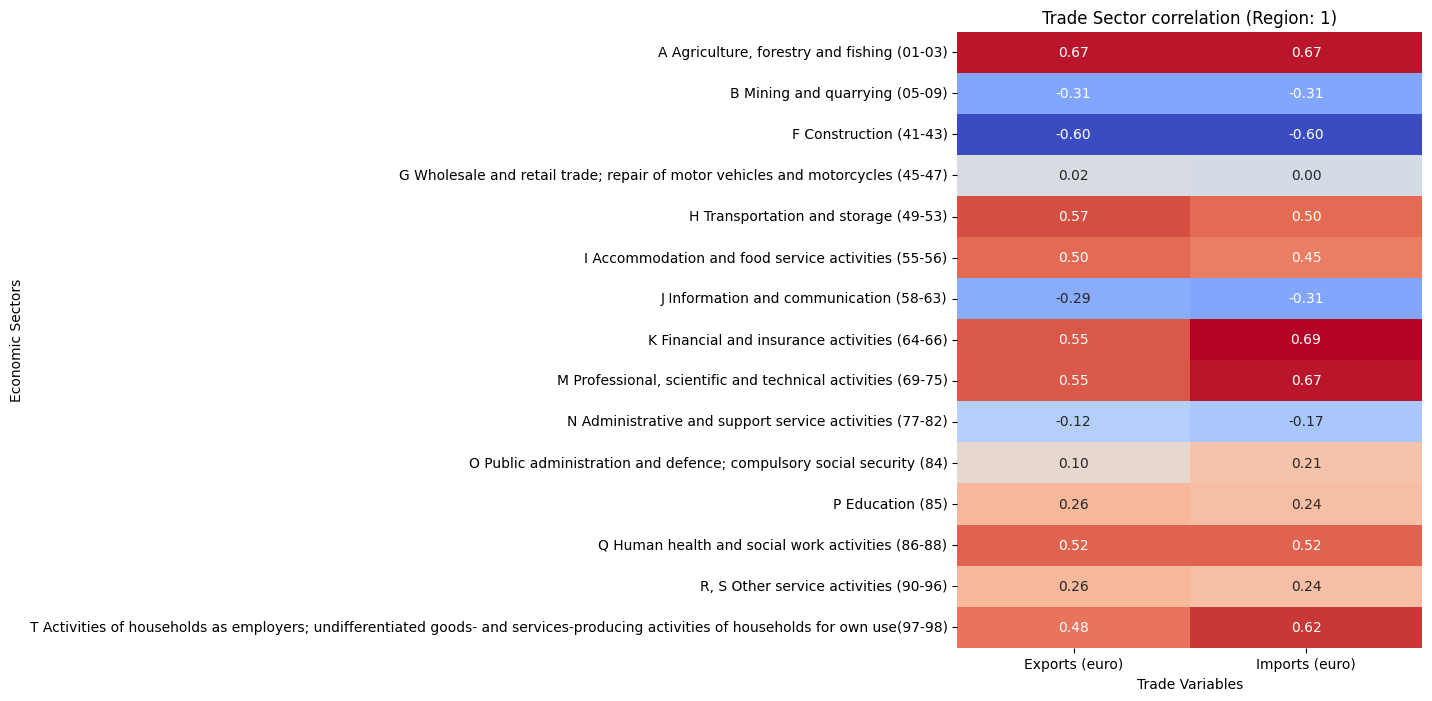


Region: 2
                                                    Exports (euro)  \
A Agriculture, forestry and fishing (01-03)                 -0.262   
B Mining and quarrying (05-09)                               0.690   
F Construction (41-43)                                       0.286   
G Wholesale and retail trade; repair of motor v...           0.381   
H Transportation and storage (49-53)                         0.619   
I Accommodation and food service activities (55...           0.357   
J Information and communication (58-63)                      0.024   
K Financial and insurance activities (64-66)                 0.000   
M Professional, scientific and technical activi...           0.381   
N Administrative and support service activities...           0.619   
O Public administration and defence; compulsory...          -0.071   
P Education (85)                                             0.262   
Q Human health and social work activities (86-88)            0.071   
R, S Othe

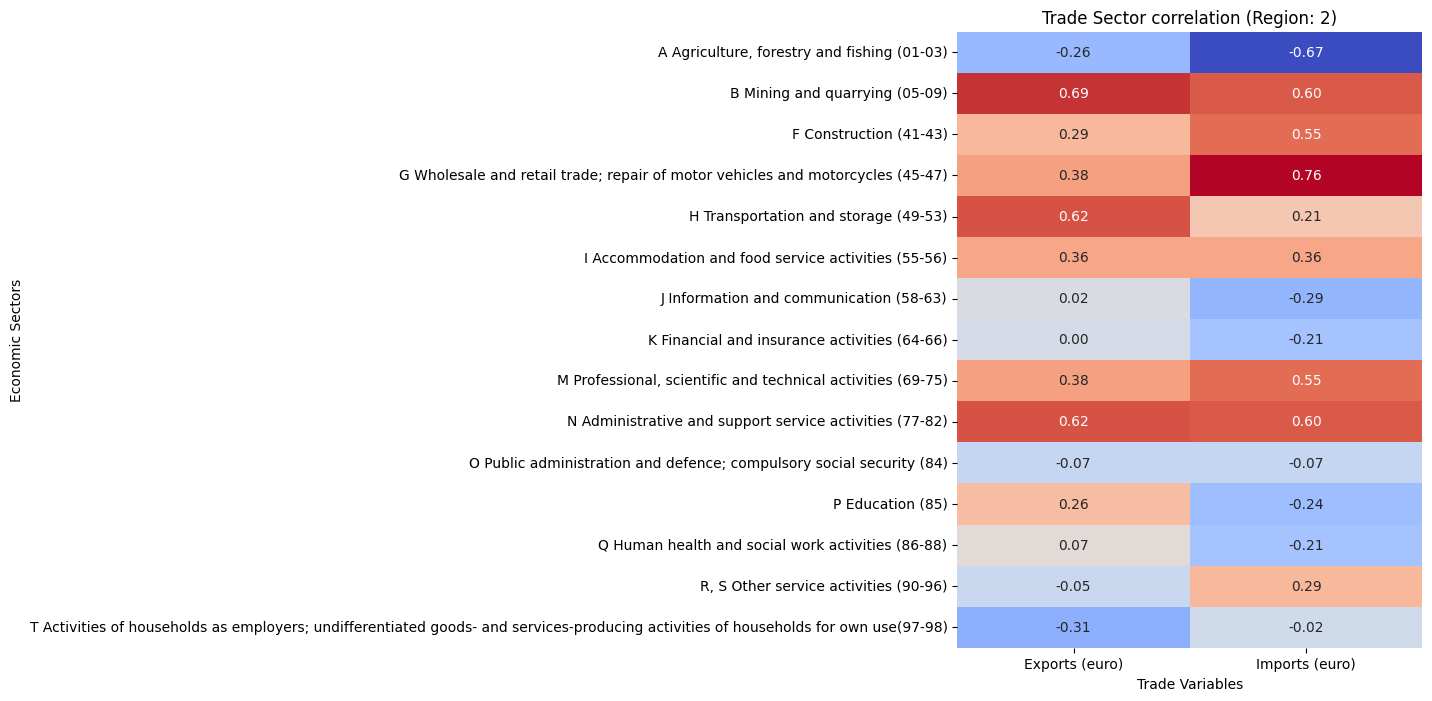


Region: 4
                                                    Exports (euro)  \
A Agriculture, forestry and fishing (01-03)                 -0.524   
B Mining and quarrying (05-09)                              -0.405   
F Construction (41-43)                                      -0.286   
G Wholesale and retail trade; repair of motor v...           0.571   
H Transportation and storage (49-53)                         0.810   
I Accommodation and food service activities (55...           0.429   
J Information and communication (58-63)                      0.333   
K Financial and insurance activities (64-66)                 0.810   
M Professional, scientific and technical activi...           0.095   
N Administrative and support service activities...           0.238   
O Public administration and defence; compulsory...           0.571   
P Education (85)                                             0.857   
Q Human health and social work activities (86-88)            0.857   
R, S Othe

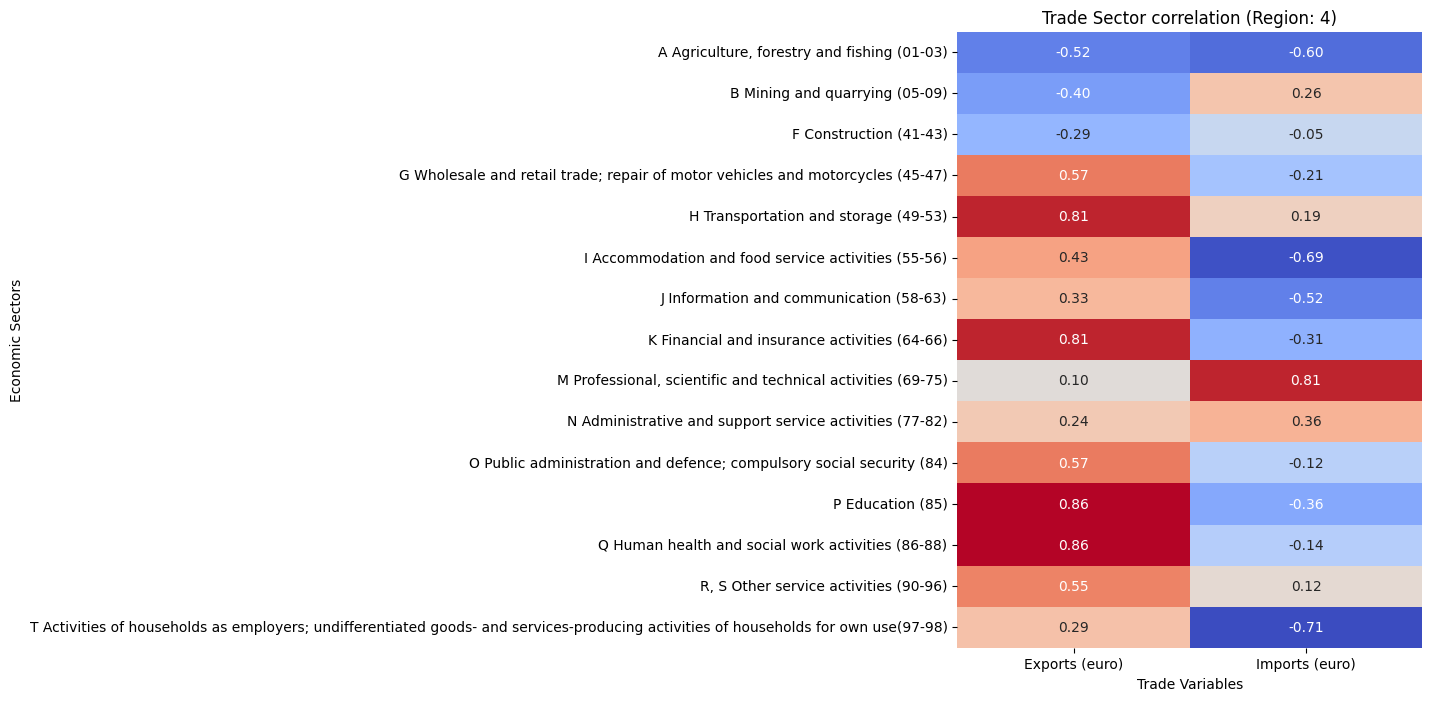


Region: 5
                                                    Exports (euro)  \
A Agriculture, forestry and fishing (01-03)                 -0.071   
B Mining and quarrying (05-09)                               0.119   
F Construction (41-43)                                      -0.524   
G Wholesale and retail trade; repair of motor v...           0.357   
H Transportation and storage (49-53)                         0.667   
I Accommodation and food service activities (55...           0.690   
J Information and communication (58-63)                     -0.024   
K Financial and insurance activities (64-66)                 0.667   
M Professional, scientific and technical activi...           0.857   
N Administrative and support service activities...           0.619   
O Public administration and defence; compulsory...          -0.429   
P Education (85)                                             0.500   
Q Human health and social work activities (86-88)            0.619   
R, S Othe

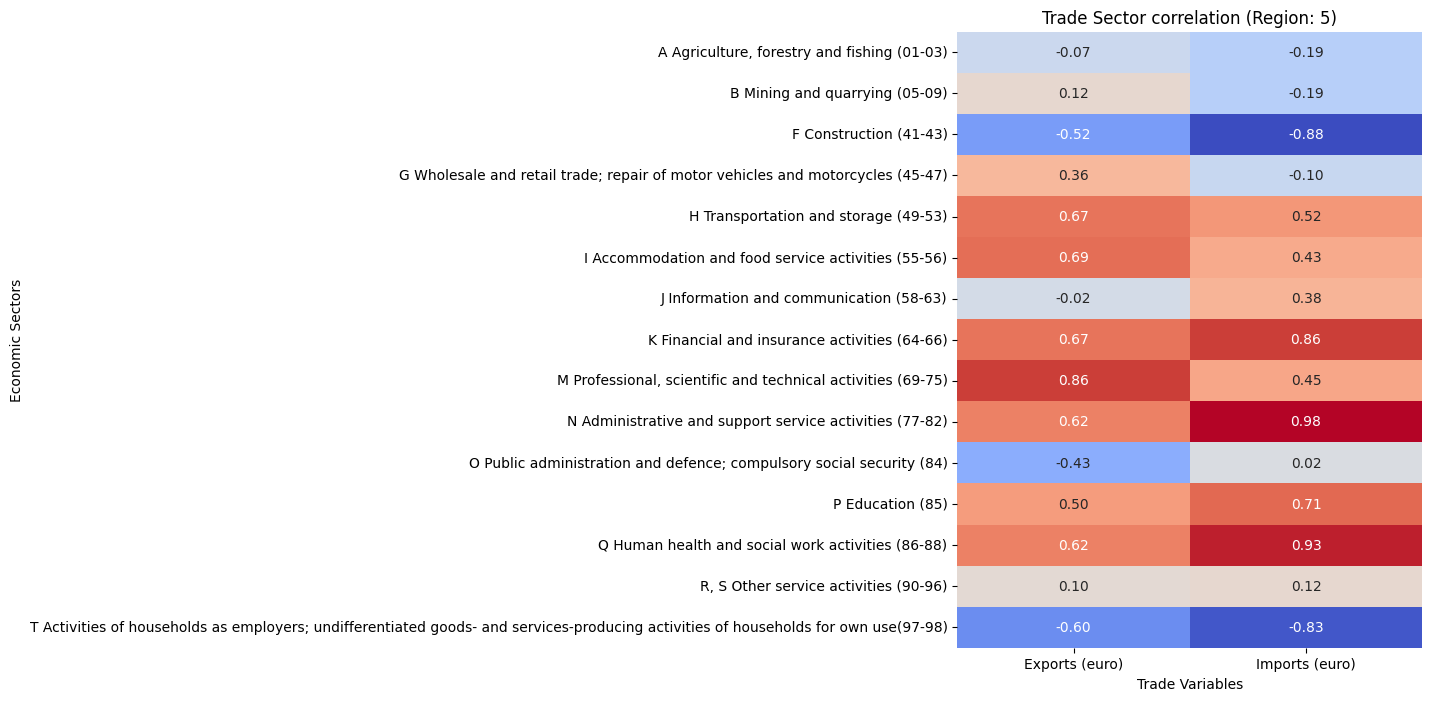


Region: 6
                                                    Exports (euro)  \
A Agriculture, forestry and fishing (01-03)                  0.619   
B Mining and quarrying (05-09)                              -0.714   
F Construction (41-43)                                       0.095   
G Wholesale and retail trade; repair of motor v...           0.667   
H Transportation and storage (49-53)                         0.524   
I Accommodation and food service activities (55...           0.452   
J Information and communication (58-63)                      0.619   
K Financial and insurance activities (64-66)                 0.714   
M Professional, scientific and technical activi...           0.810   
N Administrative and support service activities...           0.595   
O Public administration and defence; compulsory...           0.857   
P Education (85)                                             0.048   
Q Human health and social work activities (86-88)            0.524   
R, S Othe

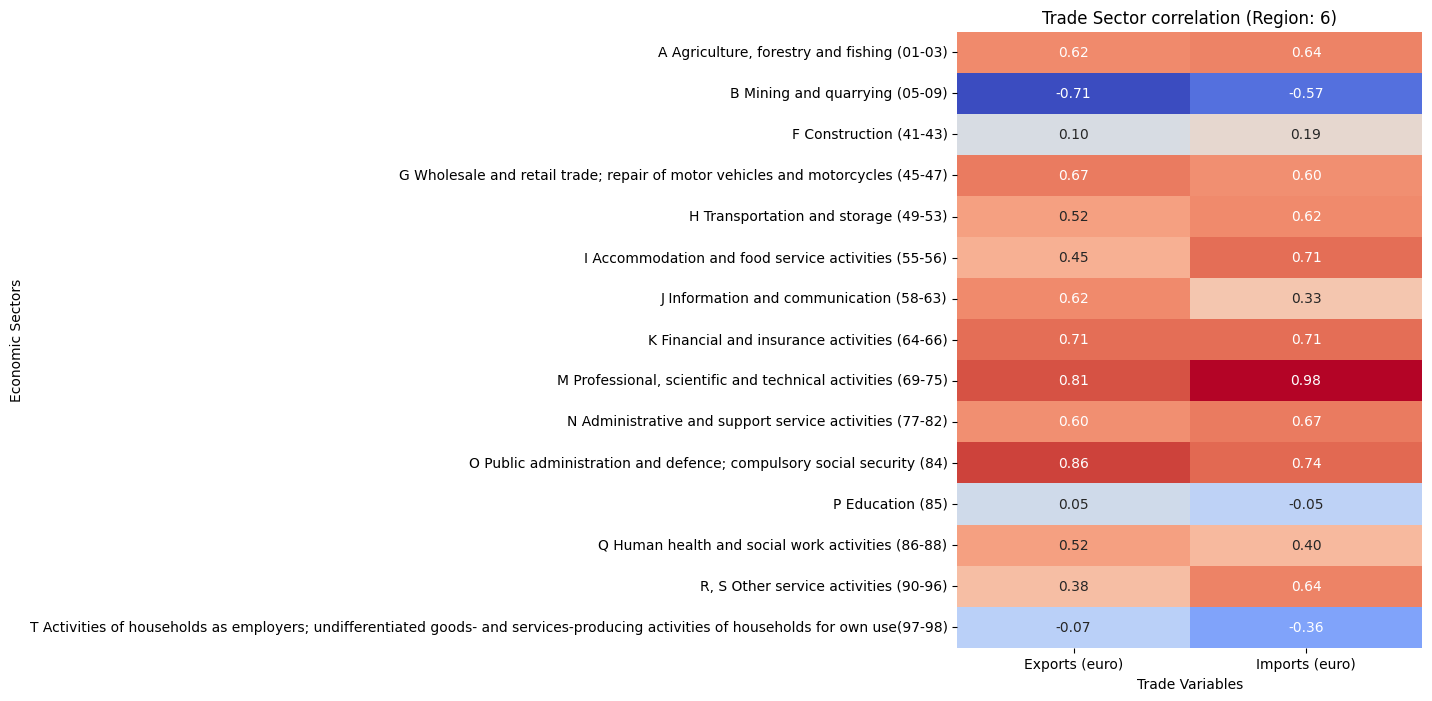


Region: 7
                                                    Exports (euro)  \
A Agriculture, forestry and fishing (01-03)                  0.357   
B Mining and quarrying (05-09)                              -0.024   
F Construction (41-43)                                       0.095   
G Wholesale and retail trade; repair of motor v...           0.262   
H Transportation and storage (49-53)                         0.571   
I Accommodation and food service activities (55...           0.357   
J Information and communication (58-63)                      0.643   
K Financial and insurance activities (64-66)                -0.143   
M Professional, scientific and technical activi...          -0.190   
N Administrative and support service activities...           0.167   
O Public administration and defence; compulsory...           0.429   
P Education (85)                                             0.357   
Q Human health and social work activities (86-88)            0.548   
R, S Othe

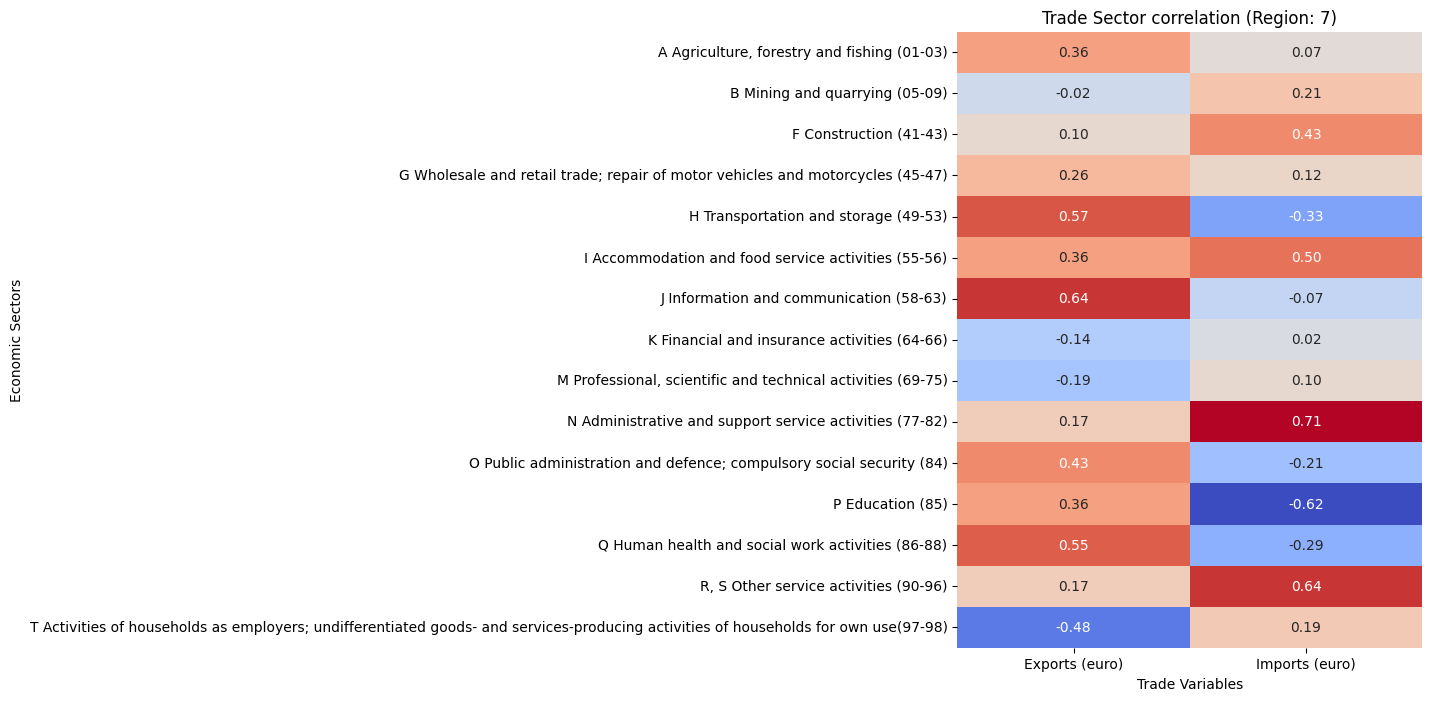


Region: 8
                                                    Exports (euro)  \
A Agriculture, forestry and fishing (01-03)                  0.286   
B Mining and quarrying (05-09)                              -0.452   
F Construction (41-43)                                      -0.095   
G Wholesale and retail trade; repair of motor v...          -0.310   
H Transportation and storage (49-53)                         0.048   
I Accommodation and food service activities (55...           0.571   
J Information and communication (58-63)                      0.024   
K Financial and insurance activities (64-66)                -0.357   
M Professional, scientific and technical activi...          -0.262   
N Administrative and support service activities...           0.286   
O Public administration and defence; compulsory...           0.048   
P Education (85)                                            -0.024   
Q Human health and social work activities (86-88)           -0.071   
R, S Othe

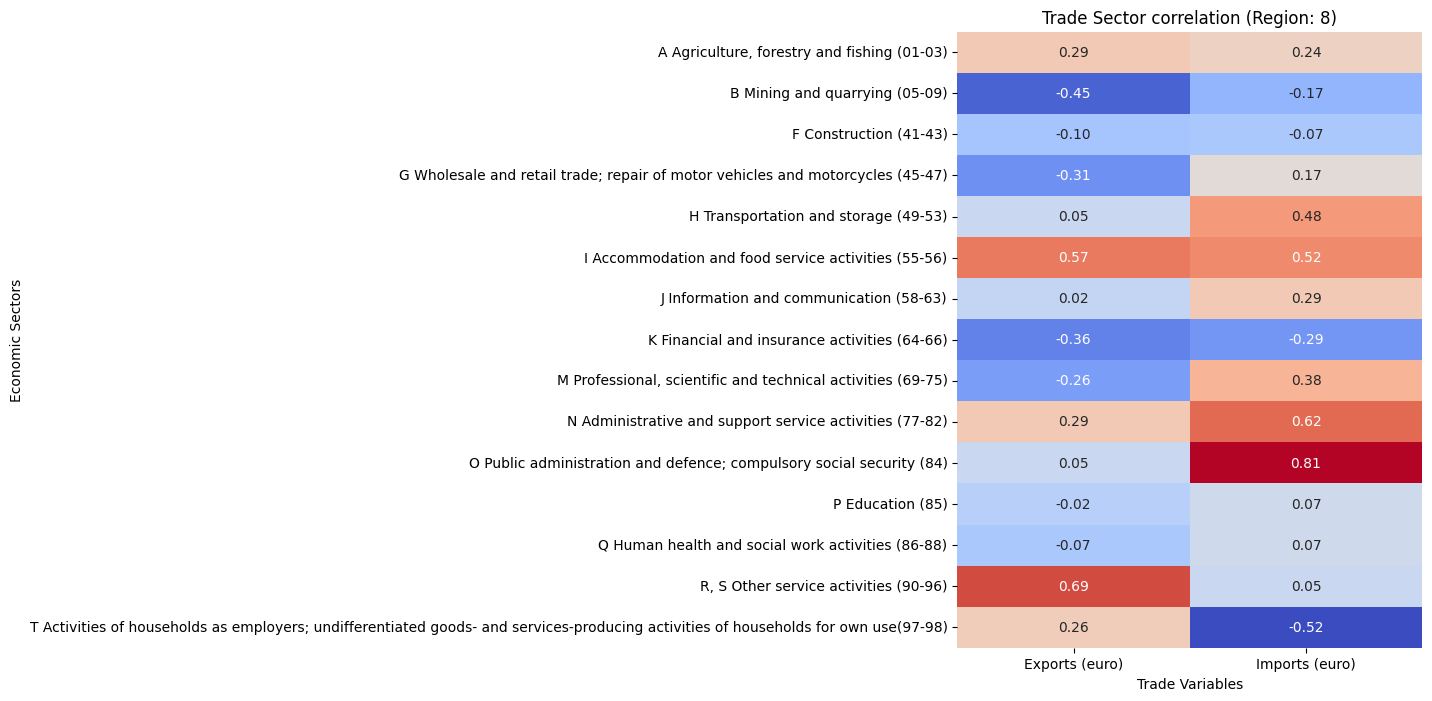


Region: 9
                                                    Exports (euro)  \
A Agriculture, forestry and fishing (01-03)                  0.429   
B Mining and quarrying (05-09)                               0.429   
F Construction (41-43)                                       0.048   
G Wholesale and retail trade; repair of motor v...          -0.429   
H Transportation and storage (49-53)                        -0.262   
I Accommodation and food service activities (55...           0.595   
J Information and communication (58-63)                      0.429   
K Financial and insurance activities (64-66)                 0.786   
M Professional, scientific and technical activi...          -0.119   
N Administrative and support service activities...          -0.429   
O Public administration and defence; compulsory...           0.357   
P Education (85)                                             0.571   
Q Human health and social work activities (86-88)            0.905   
R, S Othe

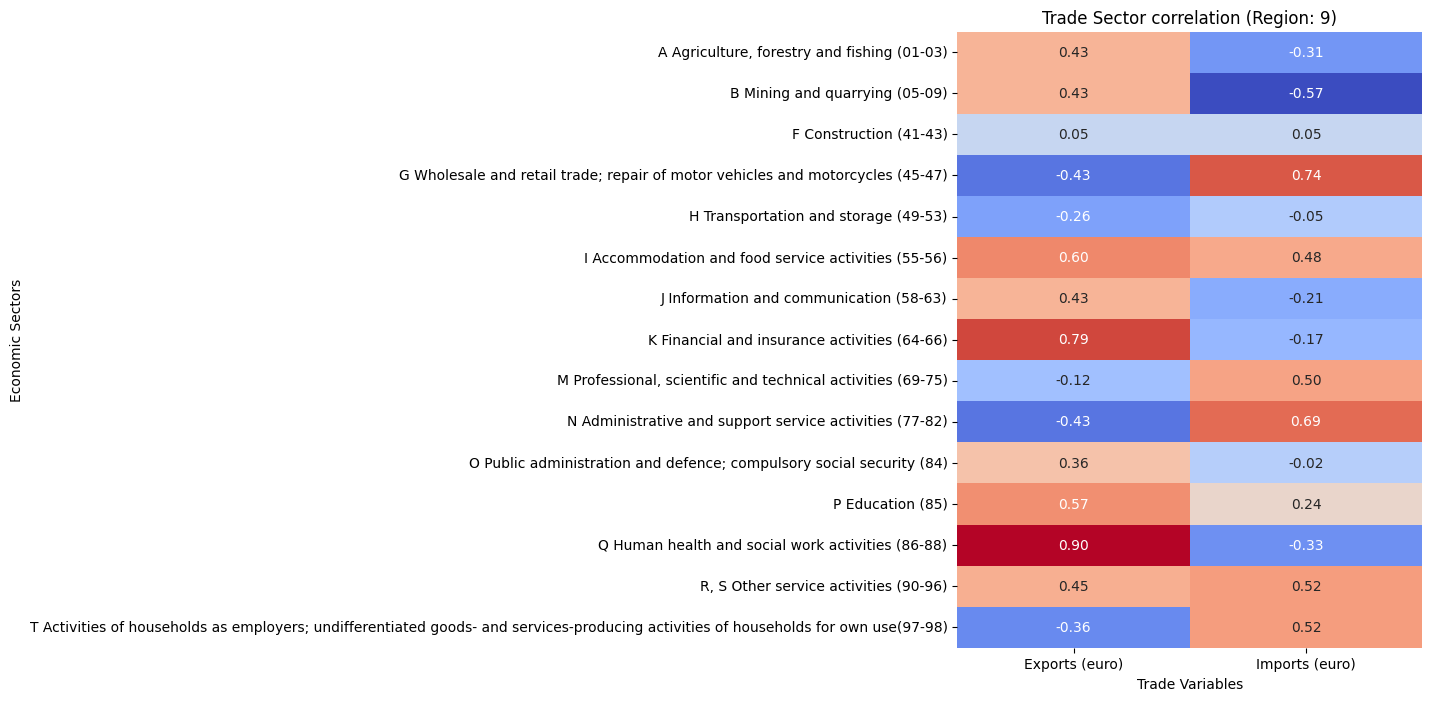


Region: 10
                                                    Exports (euro)  \
A Agriculture, forestry and fishing (01-03)                  0.000   
B Mining and quarrying (05-09)                               0.167   
F Construction (41-43)                                      -0.571   
G Wholesale and retail trade; repair of motor v...          -0.524   
H Transportation and storage (49-53)                        -0.095   
I Accommodation and food service activities (55...           0.476   
J Information and communication (58-63)                     -0.405   
K Financial and insurance activities (64-66)                 0.881   
M Professional, scientific and technical activi...           0.714   
N Administrative and support service activities...           0.190   
O Public administration and defence; compulsory...           0.881   
P Education (85)                                            -0.024   
Q Human health and social work activities (86-88)           -0.405   
R, S Oth

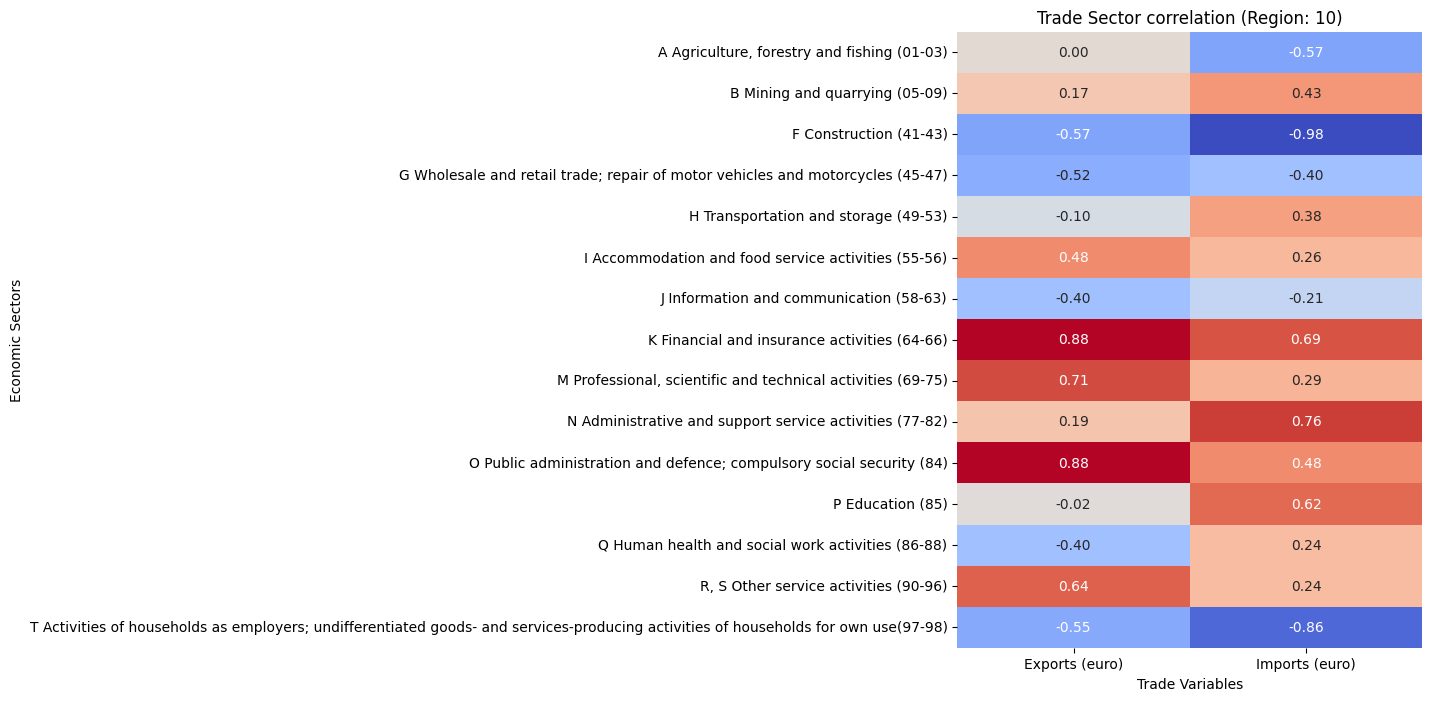


Region: 11
                                                    Exports (euro)  \
A Agriculture, forestry and fishing (01-03)                  0.833   
B Mining and quarrying (05-09)                               0.095   
F Construction (41-43)                                       0.452   
G Wholesale and retail trade; repair of motor v...           0.024   
H Transportation and storage (49-53)                         0.571   
I Accommodation and food service activities (55...           0.429   
J Information and communication (58-63)                     -0.119   
K Financial and insurance activities (64-66)                 0.810   
M Professional, scientific and technical activi...          -0.286   
N Administrative and support service activities...           0.143   
O Public administration and defence; compulsory...           0.905   
P Education (85)                                             0.048   
Q Human health and social work activities (86-88)            0.571   
R, S Oth

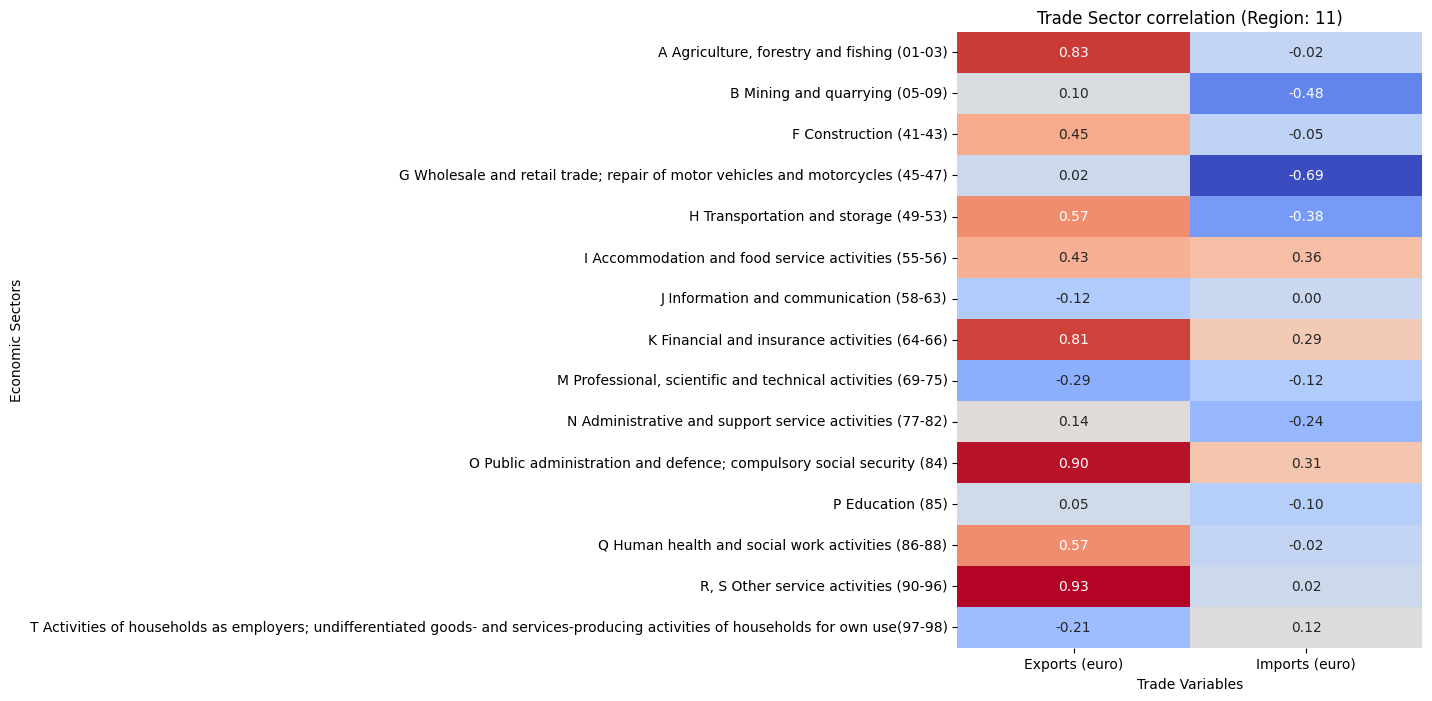


Region: 12
                                                    Exports (euro)  \
A Agriculture, forestry and fishing (01-03)                  0.381   
B Mining and quarrying (05-09)                              -0.214   
F Construction (41-43)                                       0.500   
G Wholesale and retail trade; repair of motor v...          -0.095   
H Transportation and storage (49-53)                         0.048   
I Accommodation and food service activities (55...           0.738   
J Information and communication (58-63)                      0.667   
K Financial and insurance activities (64-66)                -0.595   
M Professional, scientific and technical activi...           0.476   
N Administrative and support service activities...           0.095   
O Public administration and defence; compulsory...           0.833   
P Education (85)                                             0.405   
Q Human health and social work activities (86-88)           -0.238   
R, S Oth

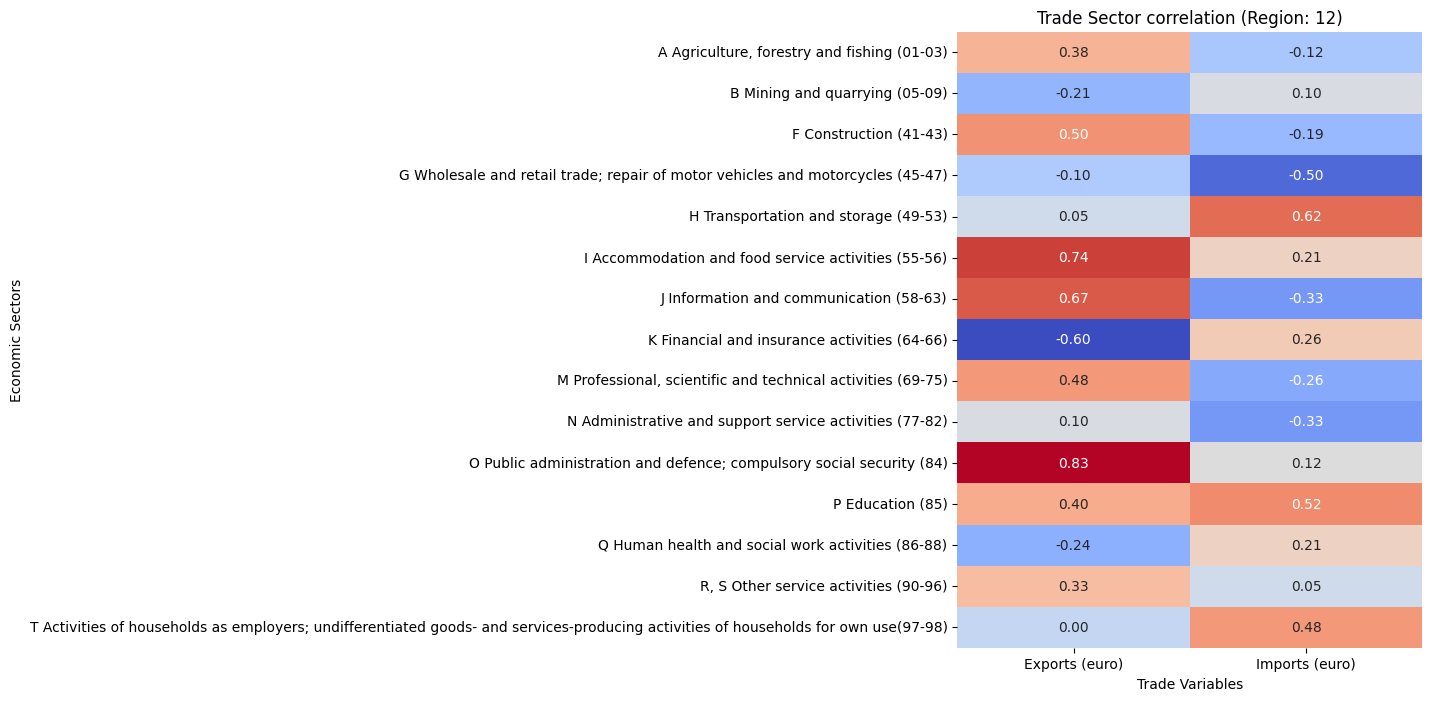


Region: 13
                                                    Exports (euro)  \
A Agriculture, forestry and fishing (01-03)                 -0.548   
B Mining and quarrying (05-09)                               0.000   
F Construction (41-43)                                      -0.881   
G Wholesale and retail trade; repair of motor v...           0.571   
H Transportation and storage (49-53)                         0.333   
I Accommodation and food service activities (55...           0.429   
J Information and communication (58-63)                      0.405   
K Financial and insurance activities (64-66)                 0.905   
M Professional, scientific and technical activi...          -0.024   
N Administrative and support service activities...          -0.024   
O Public administration and defence; compulsory...           0.667   
P Education (85)                                             0.786   
Q Human health and social work activities (86-88)            0.881   
R, S Oth

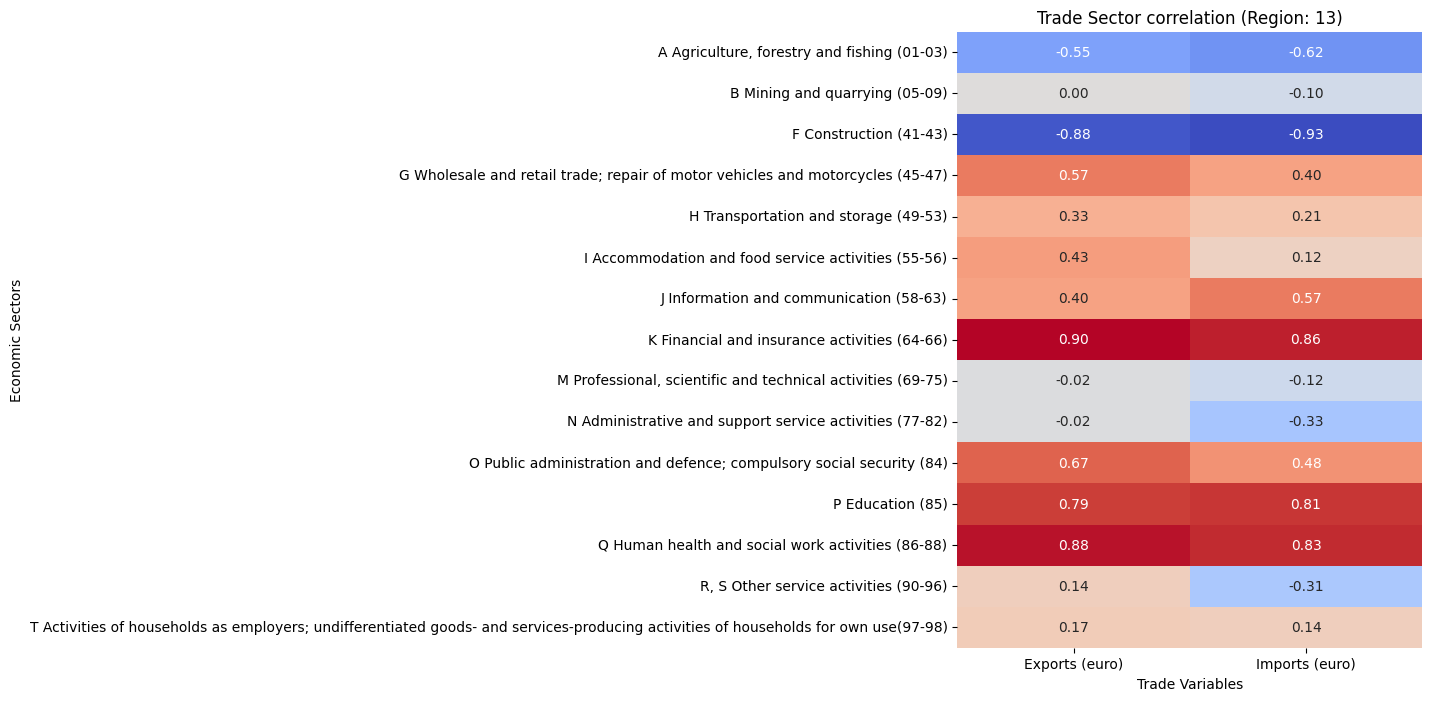


Region: 14
                                                    Exports (euro)  \
A Agriculture, forestry and fishing (01-03)                 -0.024   
B Mining and quarrying (05-09)                              -0.524   
F Construction (41-43)                                       0.524   
G Wholesale and retail trade; repair of motor v...           0.167   
H Transportation and storage (49-53)                         0.095   
I Accommodation and food service activities (55...           0.714   
J Information and communication (58-63)                      0.810   
K Financial and insurance activities (64-66)                 0.595   
M Professional, scientific and technical activi...          -0.405   
N Administrative and support service activities...           0.857   
O Public administration and defence; compulsory...           0.048   
P Education (85)                                             0.405   
Q Human health and social work activities (86-88)            0.095   
R, S Oth

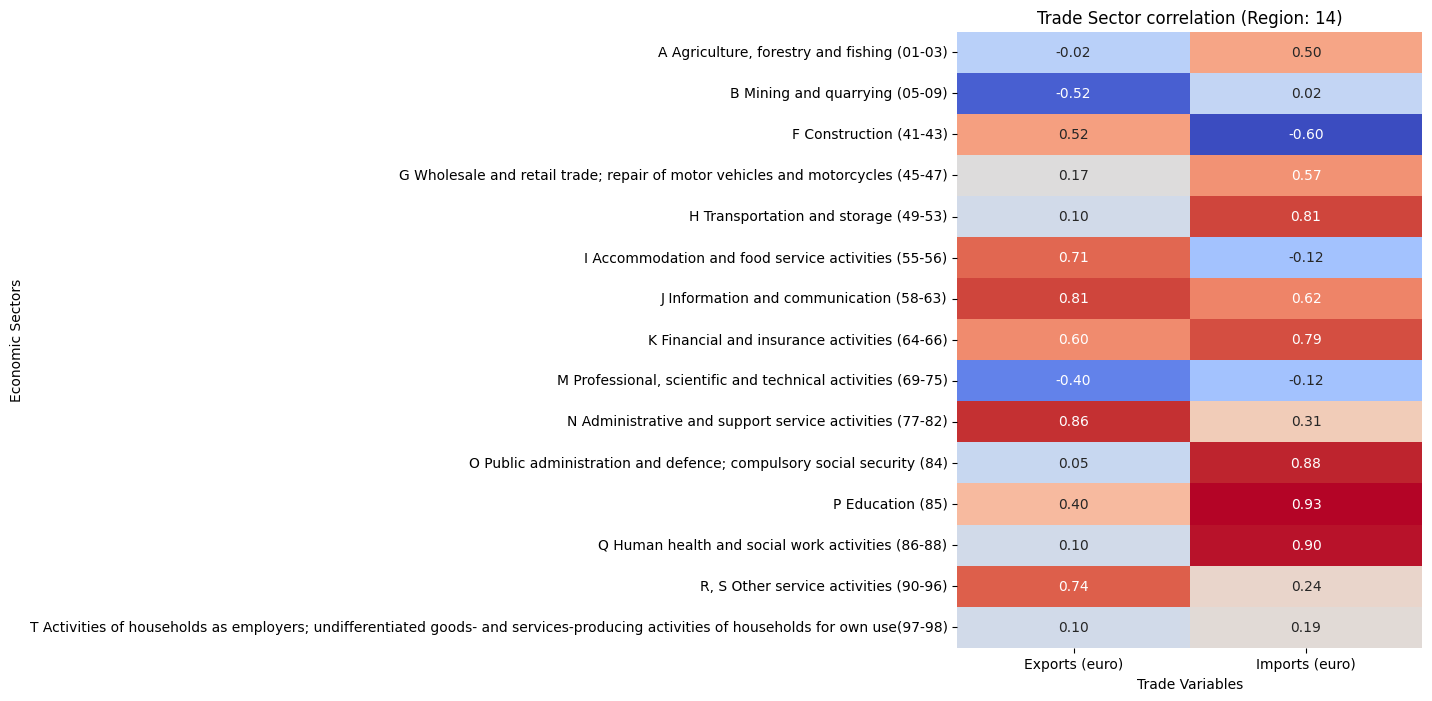


Region: 15
                                                    Exports (euro)  \
A Agriculture, forestry and fishing (01-03)                  0.000   
B Mining and quarrying (05-09)                               0.286   
F Construction (41-43)                                      -0.571   
G Wholesale and retail trade; repair of motor v...           0.810   
H Transportation and storage (49-53)                         0.786   
I Accommodation and food service activities (55...          -0.095   
J Information and communication (58-63)                      0.833   
K Financial and insurance activities (64-66)                 0.929   
M Professional, scientific and technical activi...          -0.333   
N Administrative and support service activities...           0.476   
O Public administration and defence; compulsory...           0.810   
P Education (85)                                             0.548   
Q Human health and social work activities (86-88)            0.929   
R, S Oth

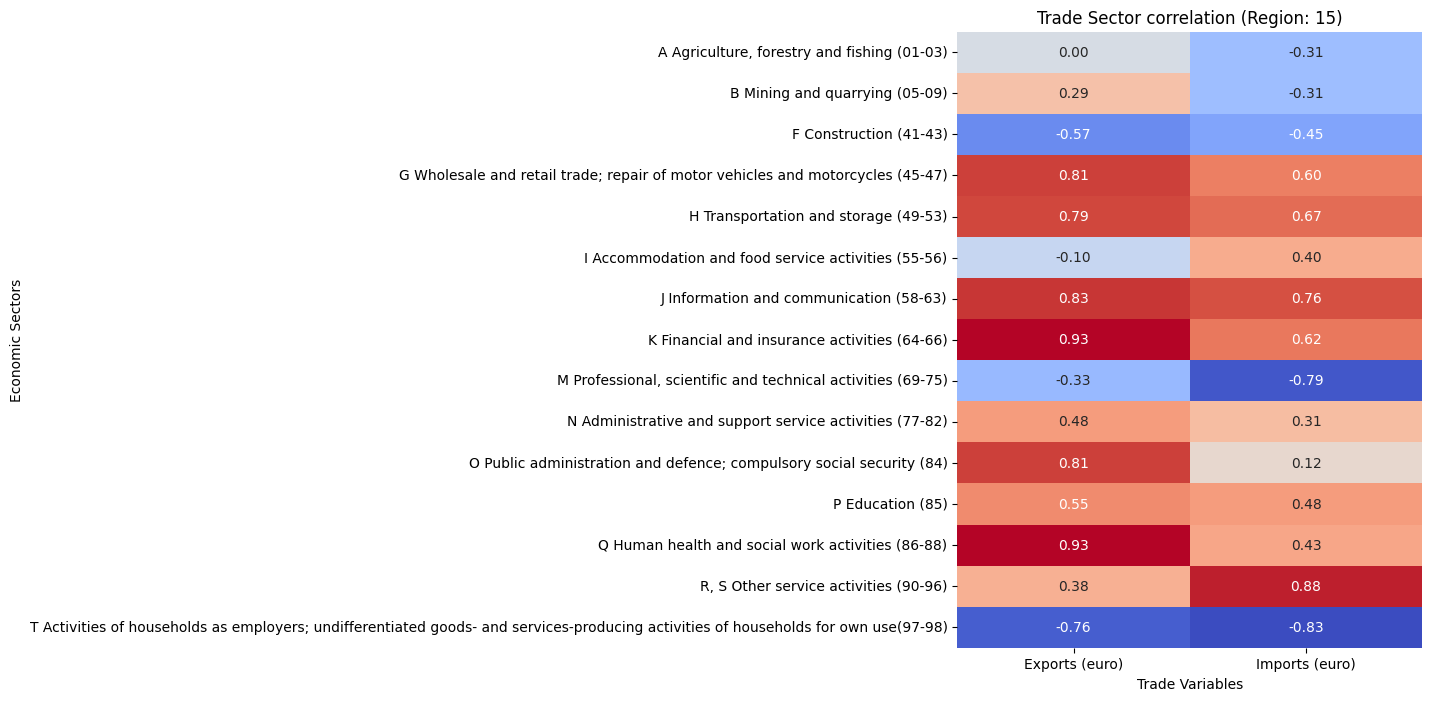


Region: 16
                                                    Exports (euro)  \
A Agriculture, forestry and fishing (01-03)                 -0.071   
B Mining and quarrying (05-09)                               0.214   
F Construction (41-43)                                       0.619   
G Wholesale and retail trade; repair of motor v...           0.024   
H Transportation and storage (49-53)                         0.095   
I Accommodation and food service activities (55...           0.381   
J Information and communication (58-63)                     -0.167   
K Financial and insurance activities (64-66)                -0.452   
M Professional, scientific and technical activi...          -0.167   
N Administrative and support service activities...          -0.143   
O Public administration and defence; compulsory...           0.595   
P Education (85)                                            -0.571   
Q Human health and social work activities (86-88)           -0.024   
R, S Oth

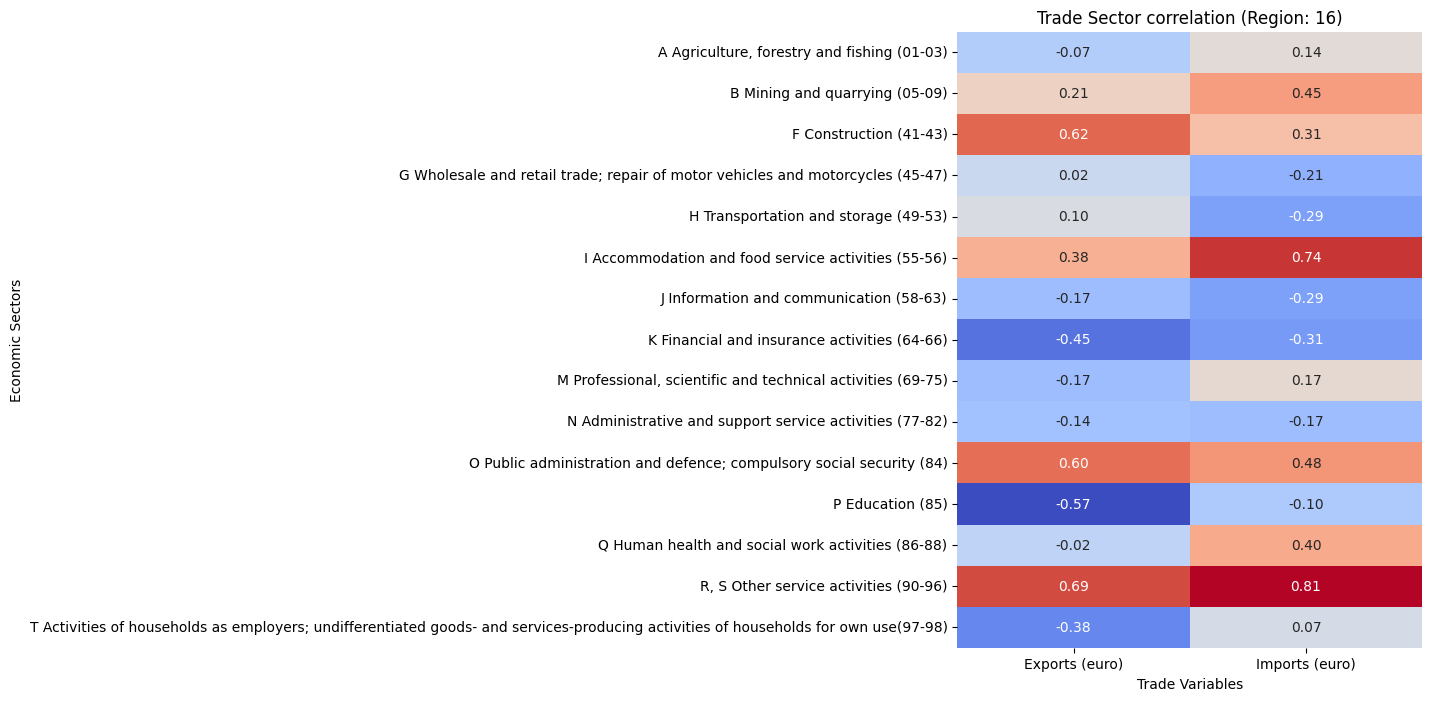


Region: 17
                                                    Exports (euro)  \
A Agriculture, forestry and fishing (01-03)                 -0.095   
B Mining and quarrying (05-09)                               0.143   
F Construction (41-43)                                       0.381   
G Wholesale and retail trade; repair of motor v...           0.476   
H Transportation and storage (49-53)                         0.976   
I Accommodation and food service activities (55...           0.786   
J Information and communication (58-63)                      0.595   
K Financial and insurance activities (64-66)                 0.143   
M Professional, scientific and technical activi...          -0.143   
N Administrative and support service activities...           0.738   
O Public administration and defence; compulsory...          -0.143   
P Education (85)                                             0.000   
Q Human health and social work activities (86-88)            0.167   
R, S Oth

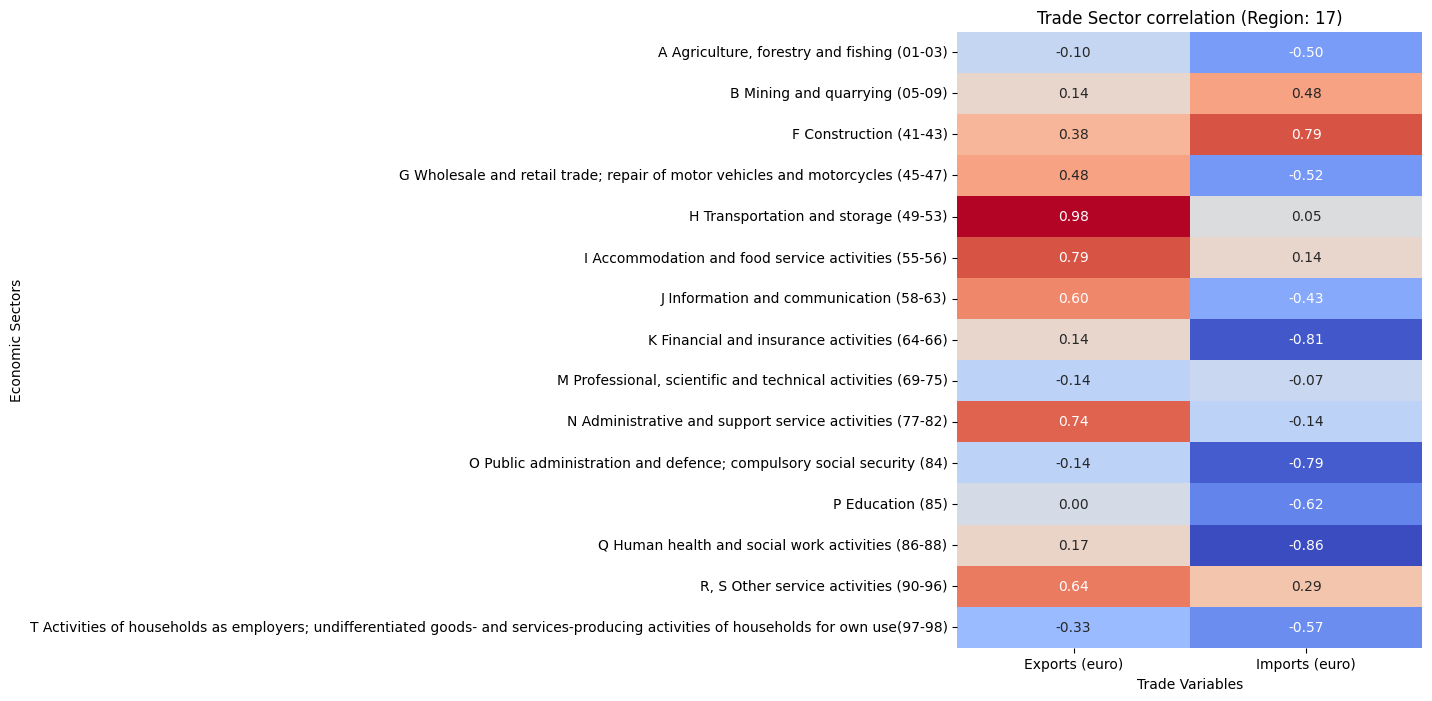


Region: 18
                                                    Exports (euro)  \
A Agriculture, forestry and fishing (01-03)                 -0.357   
B Mining and quarrying (05-09)                               0.333   
F Construction (41-43)                                      -0.262   
G Wholesale and retail trade; repair of motor v...           0.071   
H Transportation and storage (49-53)                        -0.262   
I Accommodation and food service activities (55...           0.667   
J Information and communication (58-63)                      0.643   
K Financial and insurance activities (64-66)                 0.619   
M Professional, scientific and technical activi...          -0.690   
N Administrative and support service activities...          -0.333   
O Public administration and defence; compulsory...           0.810   
P Education (85)                                             0.262   
Q Human health and social work activities (86-88)            0.786   
R, S Oth

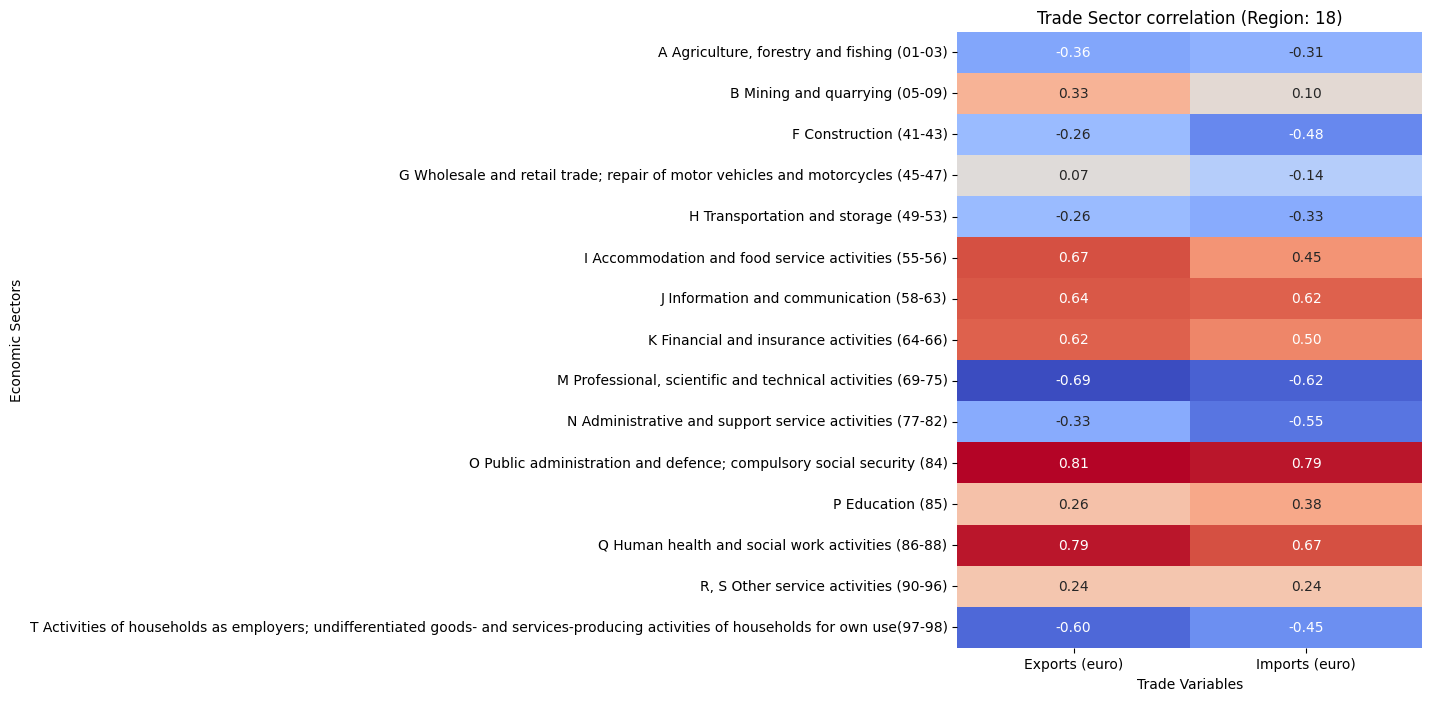


Region: 19
                                                    Exports (euro)  \
A Agriculture, forestry and fishing (01-03)                  0.119   
B Mining and quarrying (05-09)                               0.238   
F Construction (41-43)                                       0.262   
G Wholesale and retail trade; repair of motor v...           0.905   
H Transportation and storage (49-53)                         0.643   
I Accommodation and food service activities (55...           0.214   
J Information and communication (58-63)                     -0.238   
K Financial and insurance activities (64-66)                 0.643   
M Professional, scientific and technical activi...           0.524   
N Administrative and support service activities...           0.310   
O Public administration and defence; compulsory...           0.667   
P Education (85)                                             0.643   
Q Human health and social work activities (86-88)            0.524   
R, S Oth

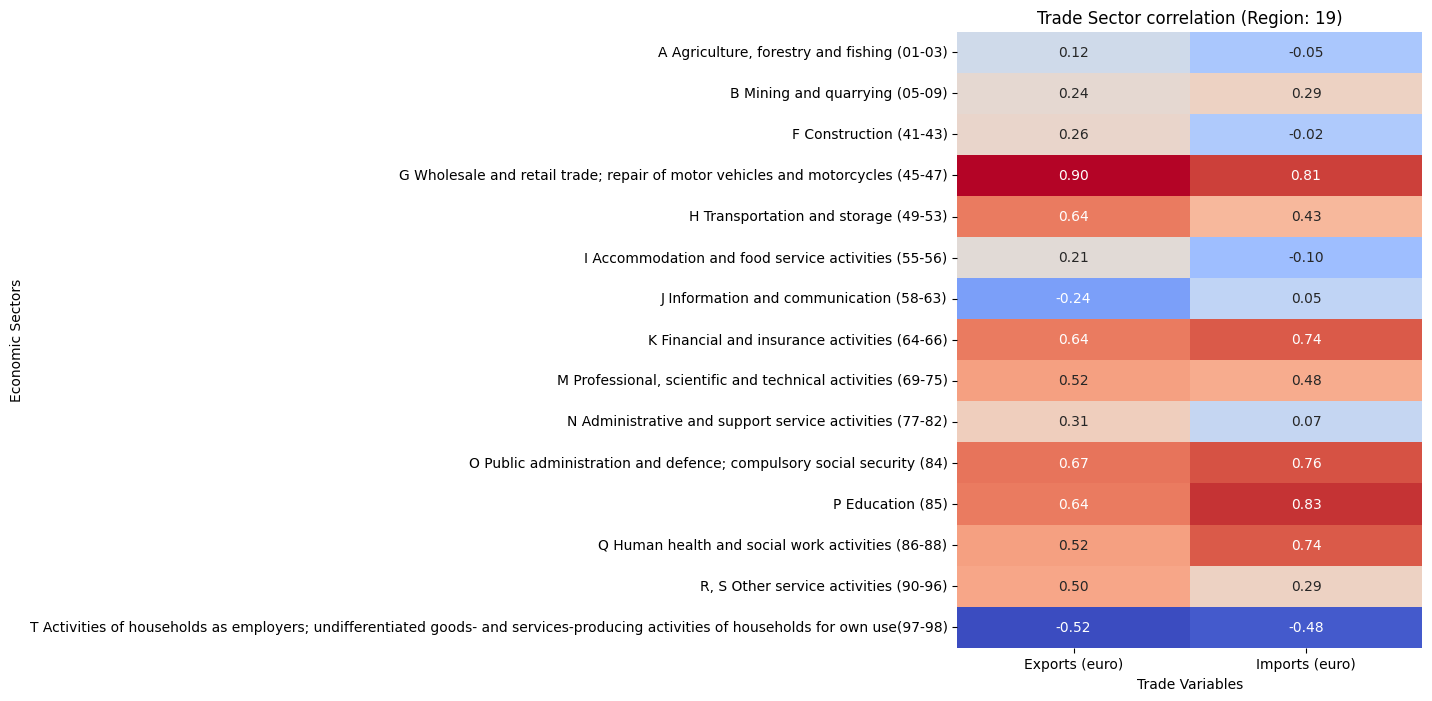


Region: 21
                                                    Exports (euro)  \
A Agriculture, forestry and fishing (01-03)                 -0.452   
B Mining and quarrying (05-09)                              -0.238   
F Construction (41-43)                                      -0.476   
G Wholesale and retail trade; repair of motor v...           0.738   
H Transportation and storage (49-53)                         0.643   
I Accommodation and food service activities (55...           0.595   
J Information and communication (58-63)                     -0.333   
K Financial and insurance activities (64-66)                 0.476   
M Professional, scientific and technical activi...          -0.548   
N Administrative and support service activities...           0.476   
O Public administration and defence; compulsory...           0.405   
P Education (85)                                             0.690   
Q Human health and social work activities (86-88)            0.524   
R, S Oth

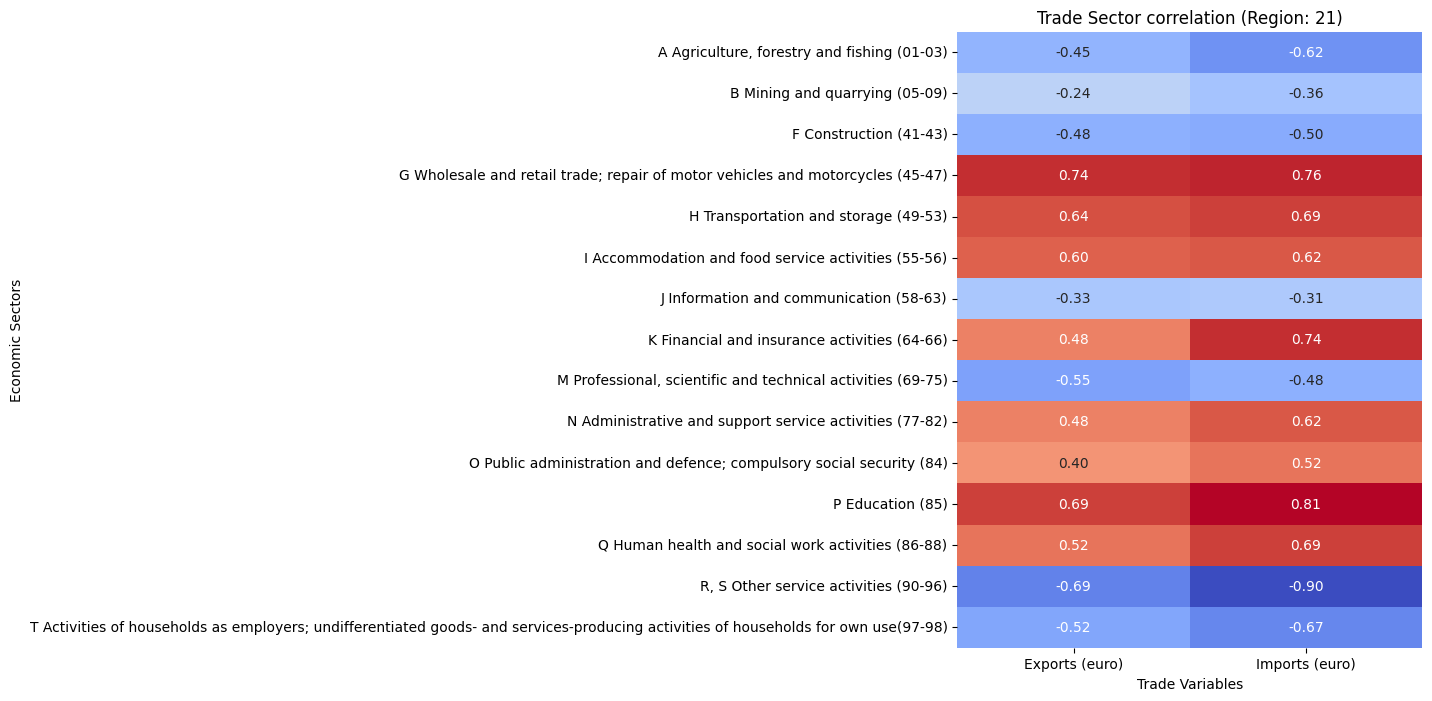

In [7]:
#trade sector correlations
print("\nTrade Sector correlations per region\n")

df_impexp = df_total[(df_total["Year"] >= 2015) & (df_total["Year"] <= 2022)]
region_corrs = {}

for region in regions:
    df_region = df_impexp[df_impexp["Region"] == region]
    df_region = df_region[["Year"] + trade_cols + sector_cols].dropna()

    #skip if too few observations
    if len(df_region) < 4:
        continue

    df_region_detrended = detrend_dataframe(df_region)
    corr = df_region_detrended[trade_cols + sector_cols].corr(method='spearman')
    trade_corr = corr.loc[sector_cols, trade_cols]

    trade_corr = trade_corr.reindex(index=sector_cols, columns=trade_cols)
    region_corrs[region] = trade_corr.values.flatten()

    print(f"\nRegion: {region}")
    print(trade_corr.round(3))

    plt.figure(figsize=(6, 8))
    sns.heatmap(trade_corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=False)
    plt.title(f"Trade Sector correlation (Region: {region})")
    plt.xlabel("Trade Variables")
    plt.ylabel("Economic Sectors")
    plt.tight_layout()
    plt.show()

### Sector to Sector correlations per region (2000–2022)


Sector to Sector correlations per region (2000–2022)



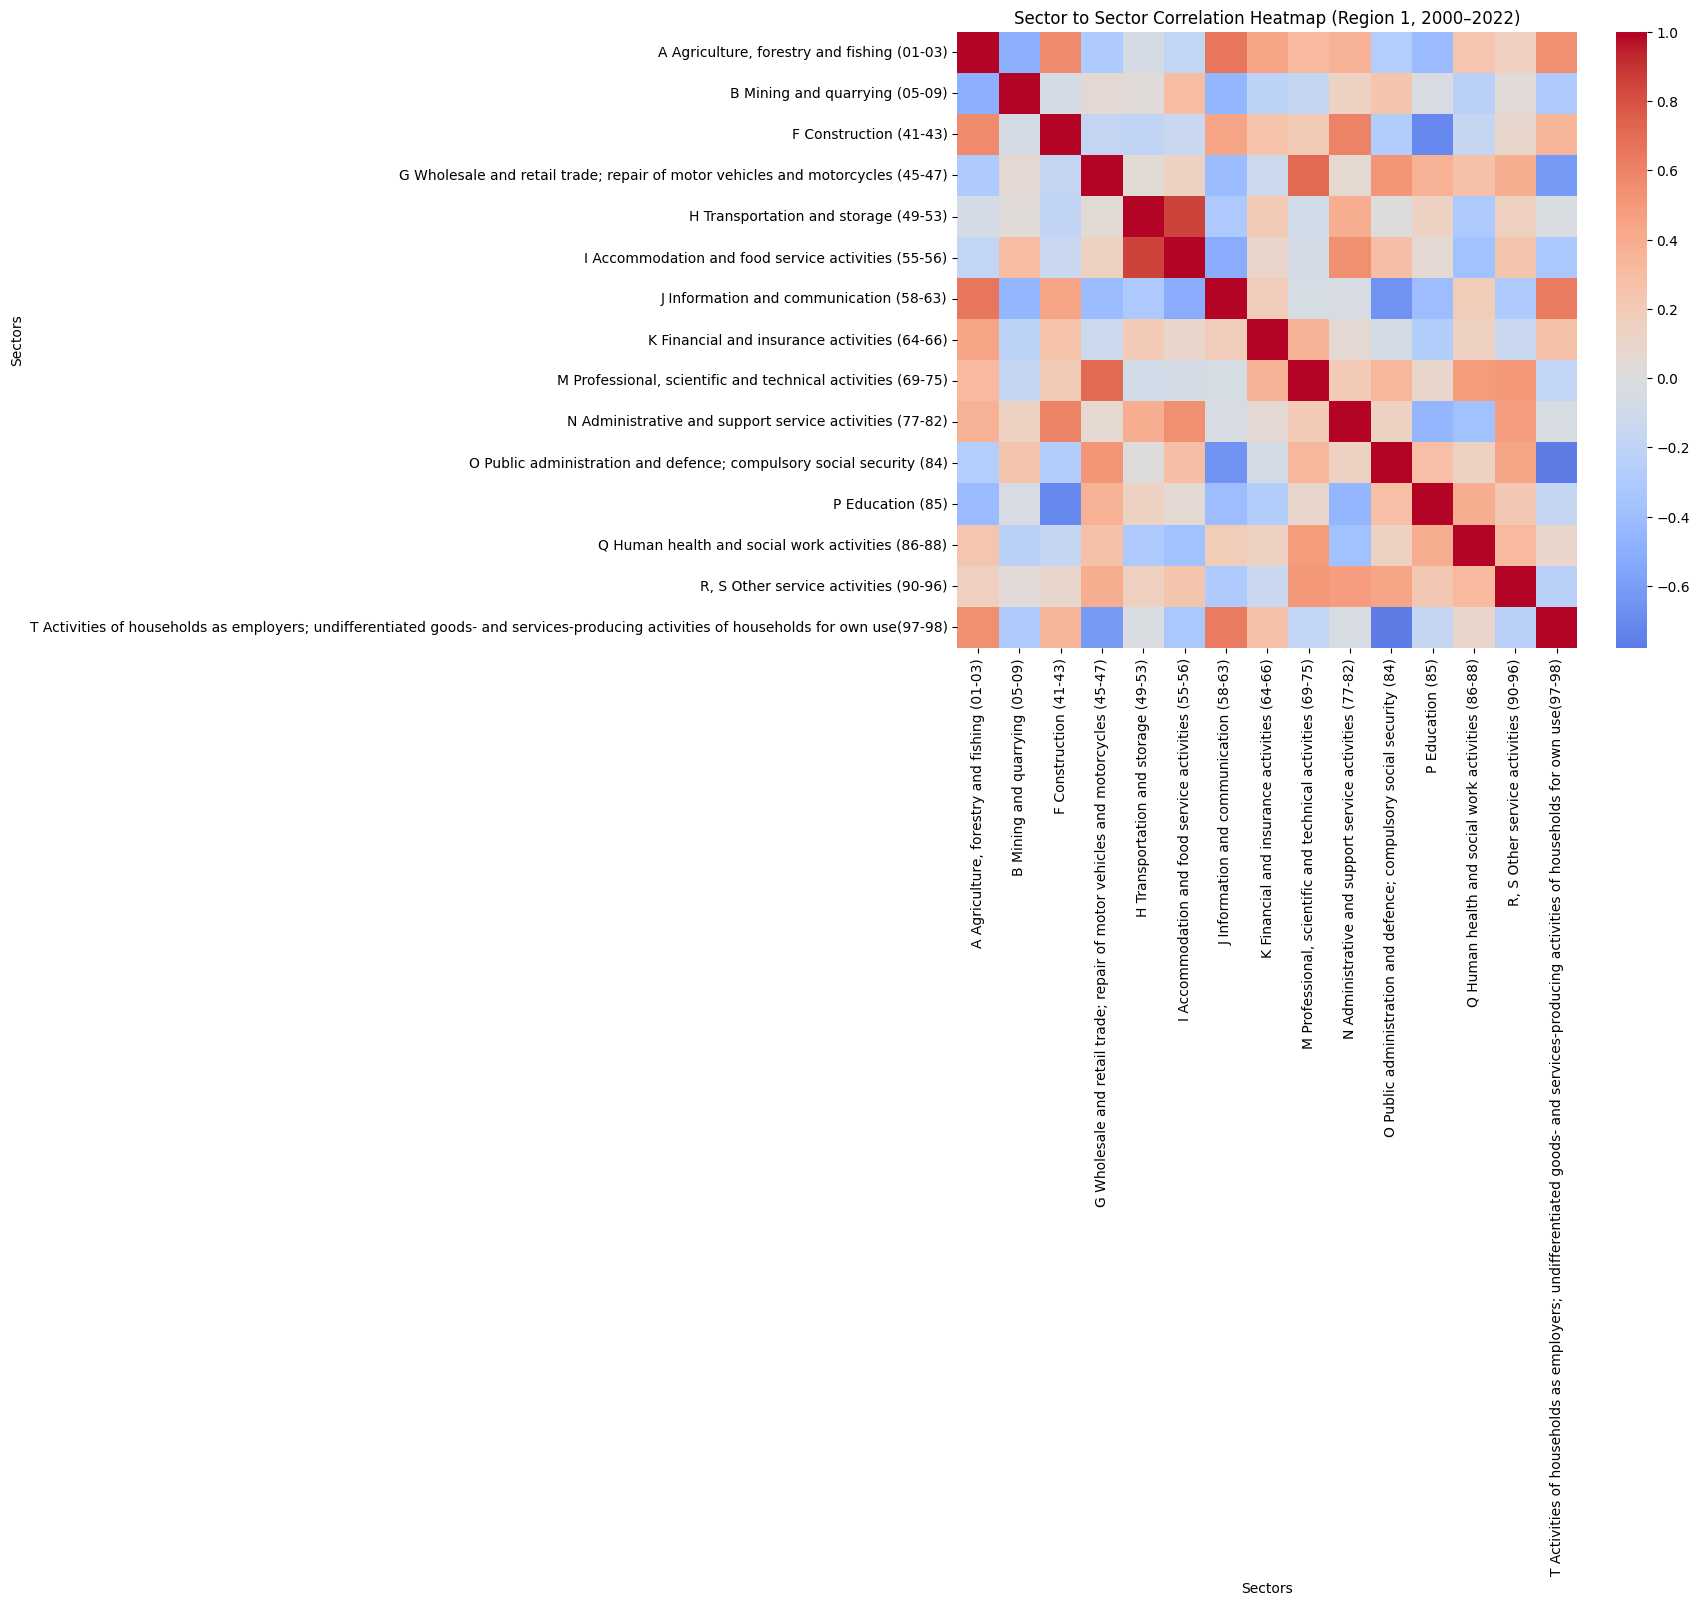

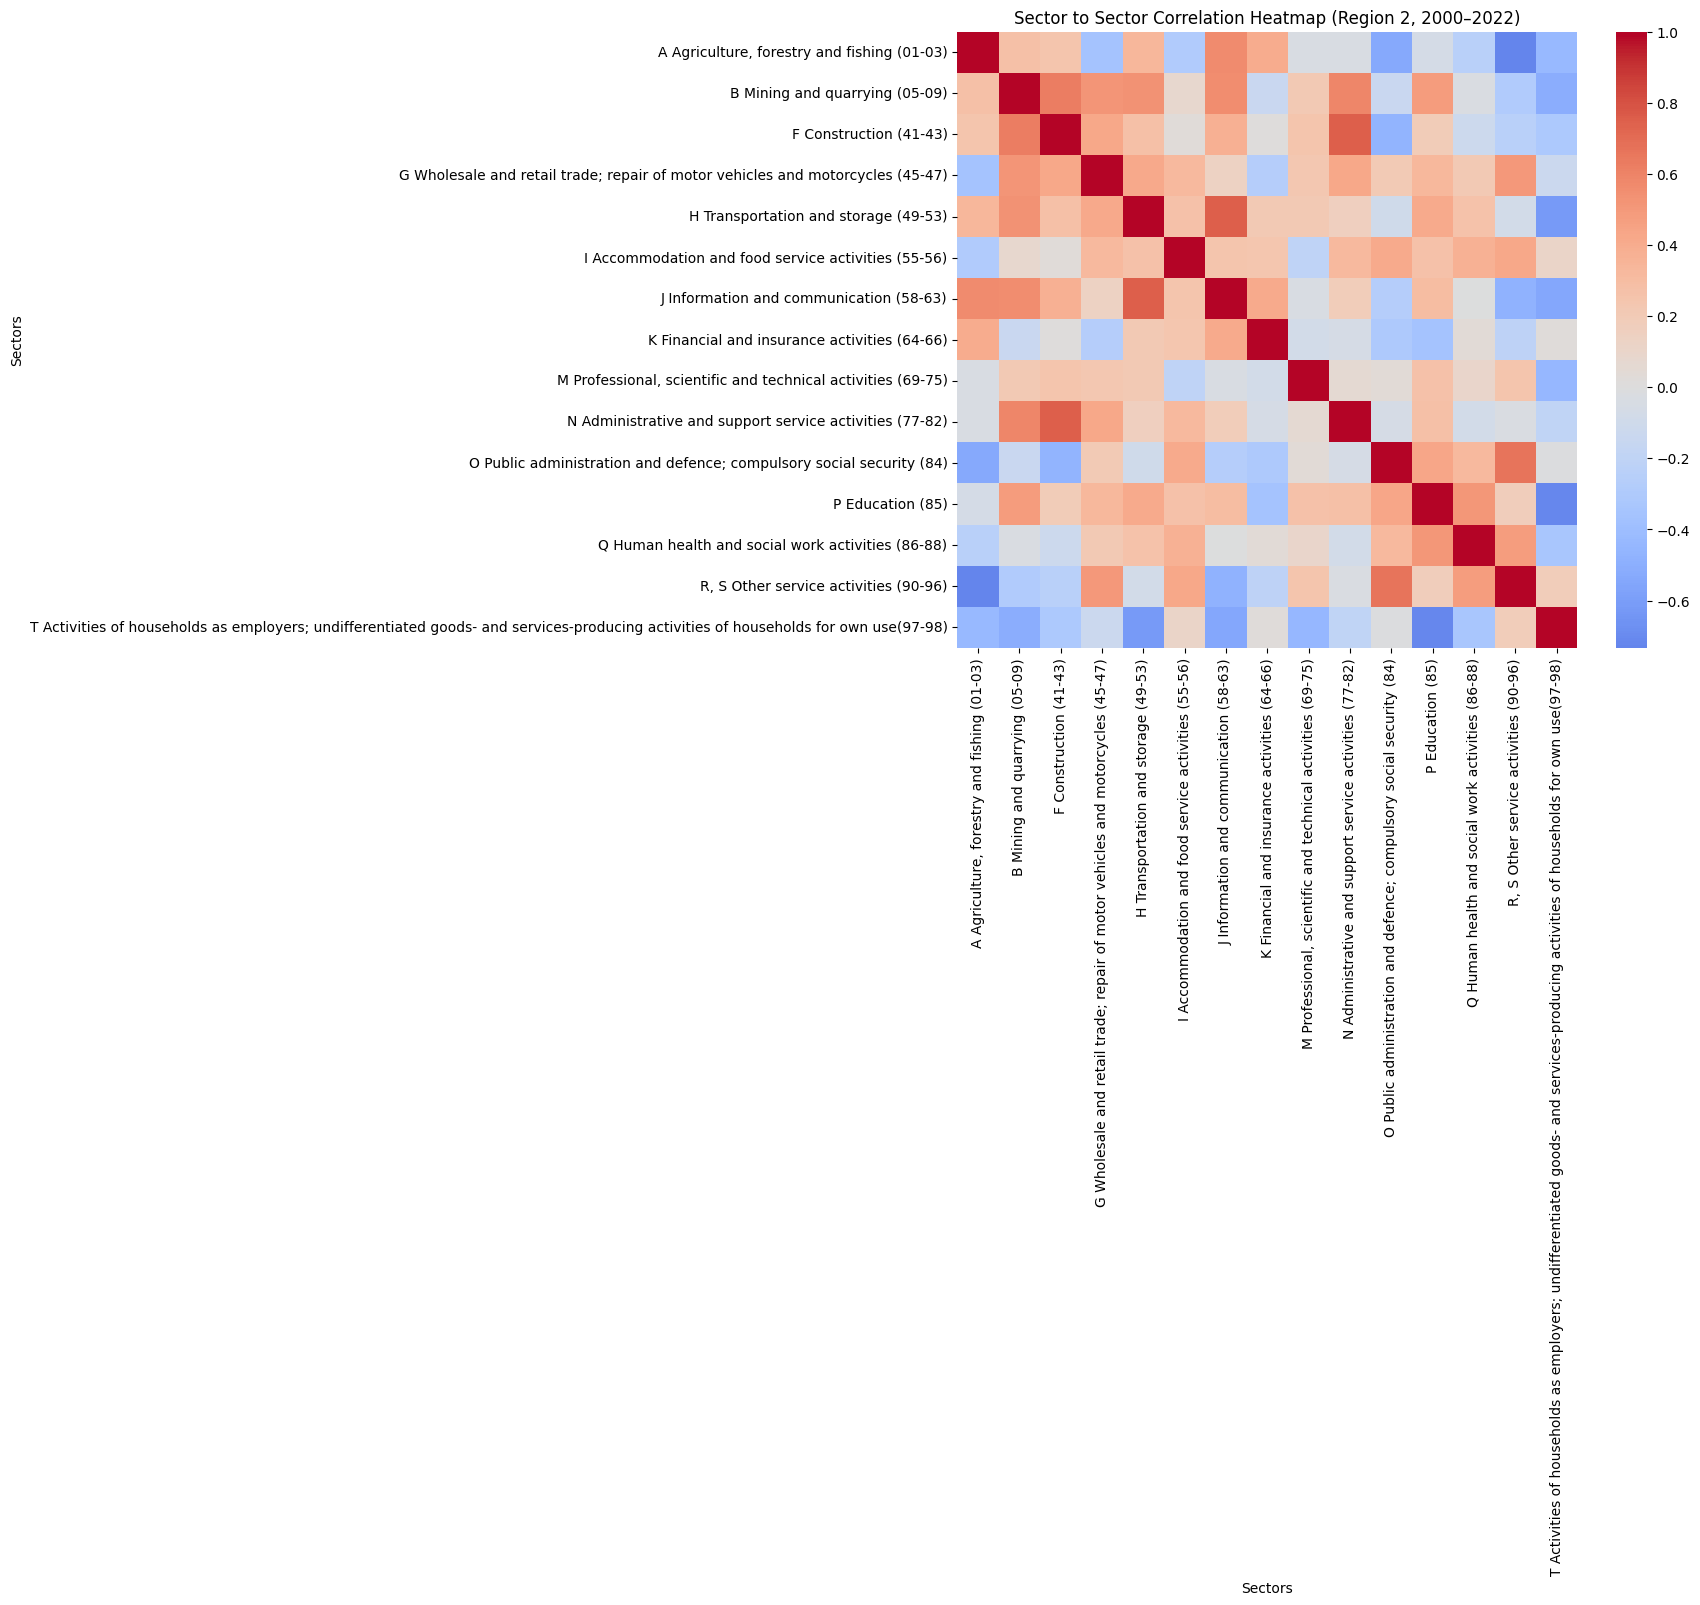

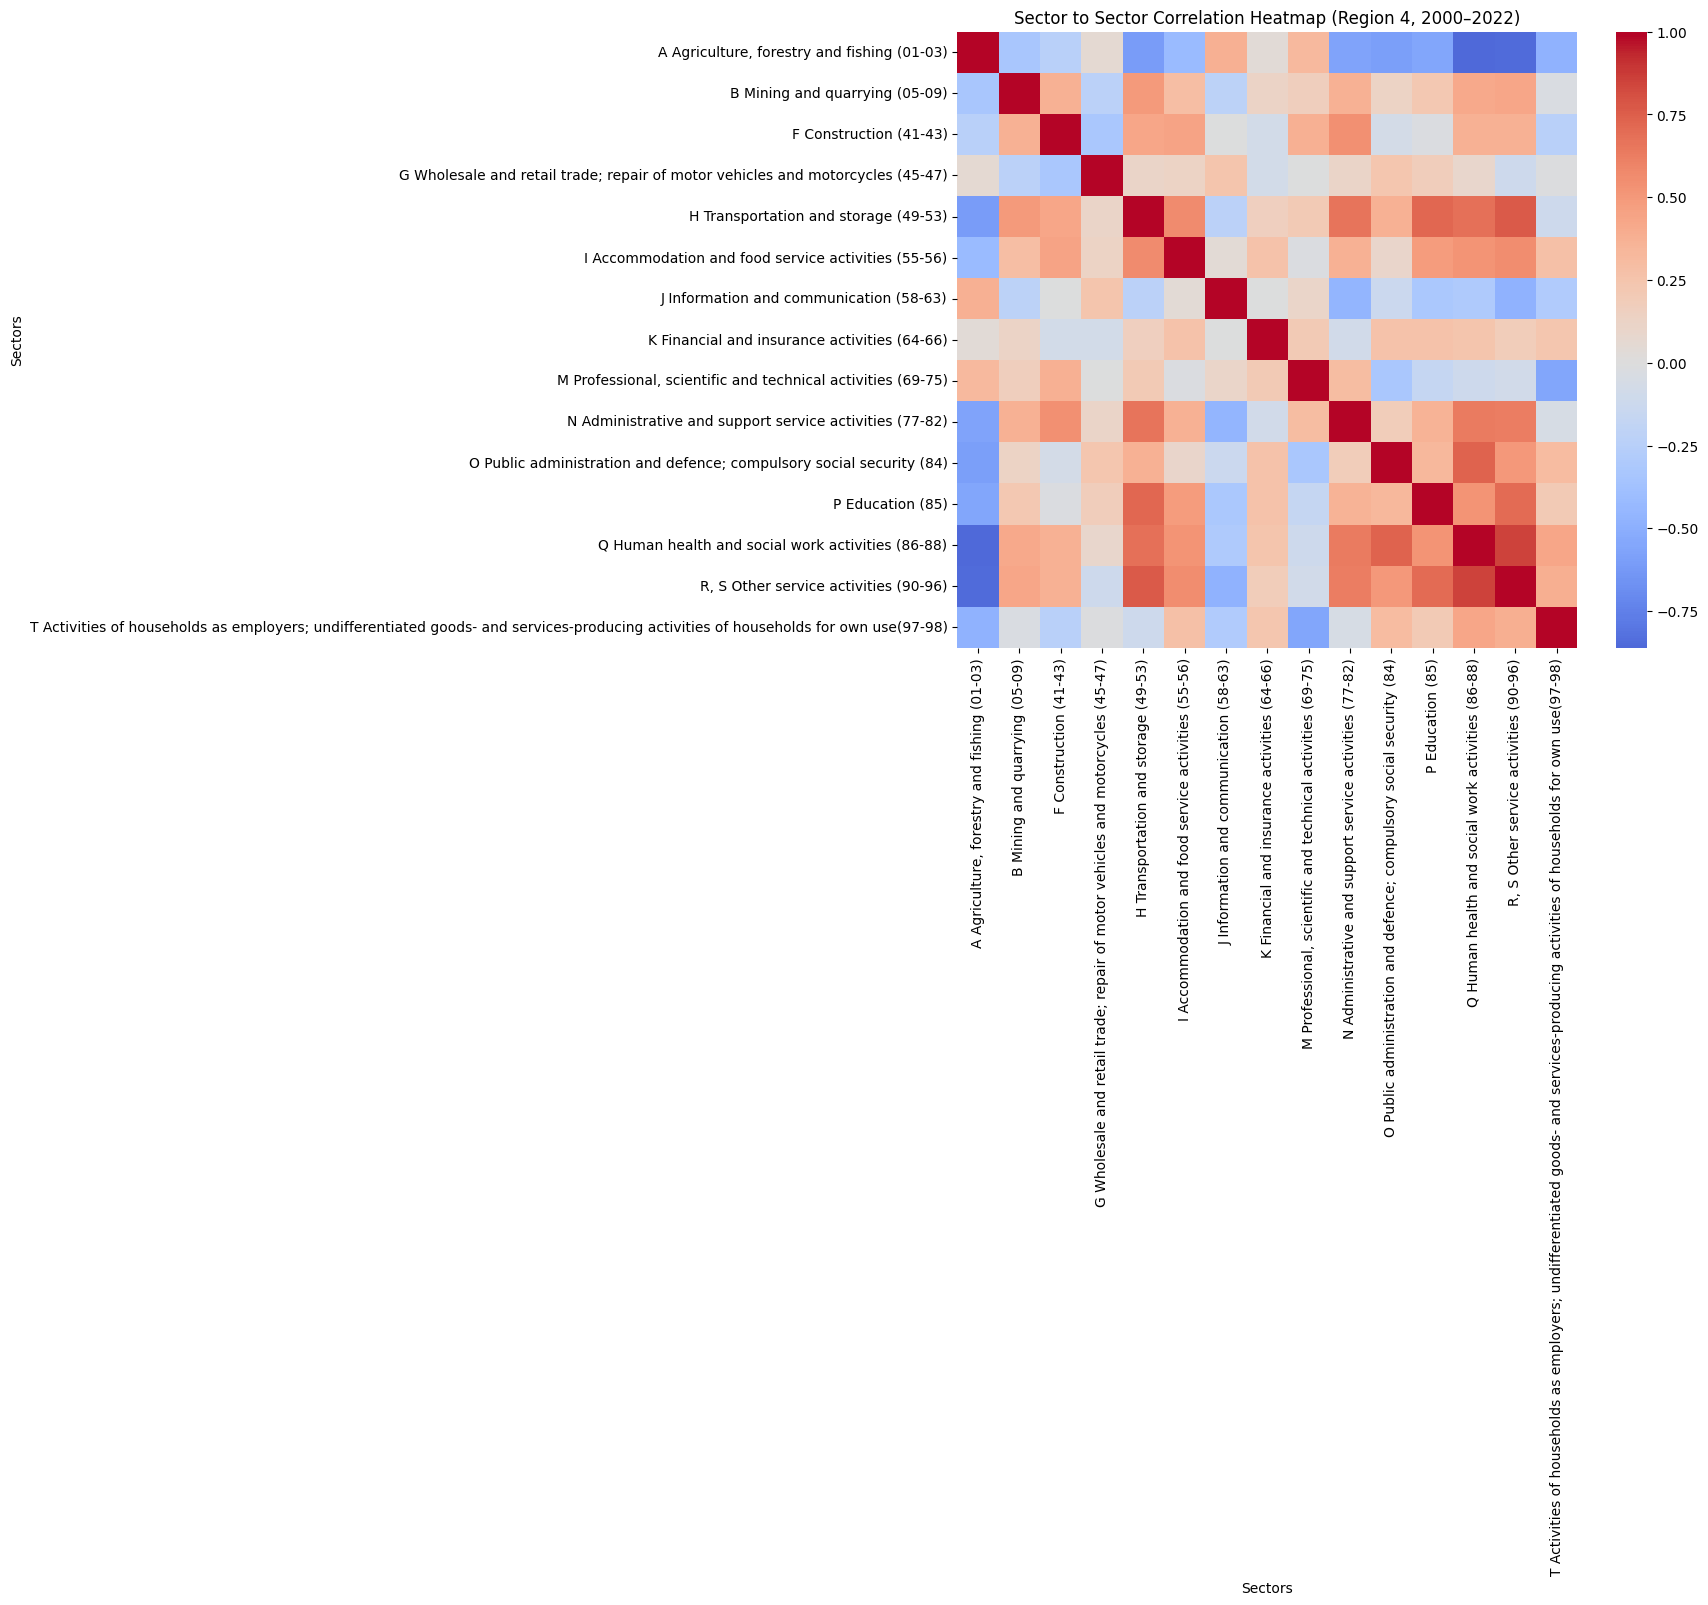

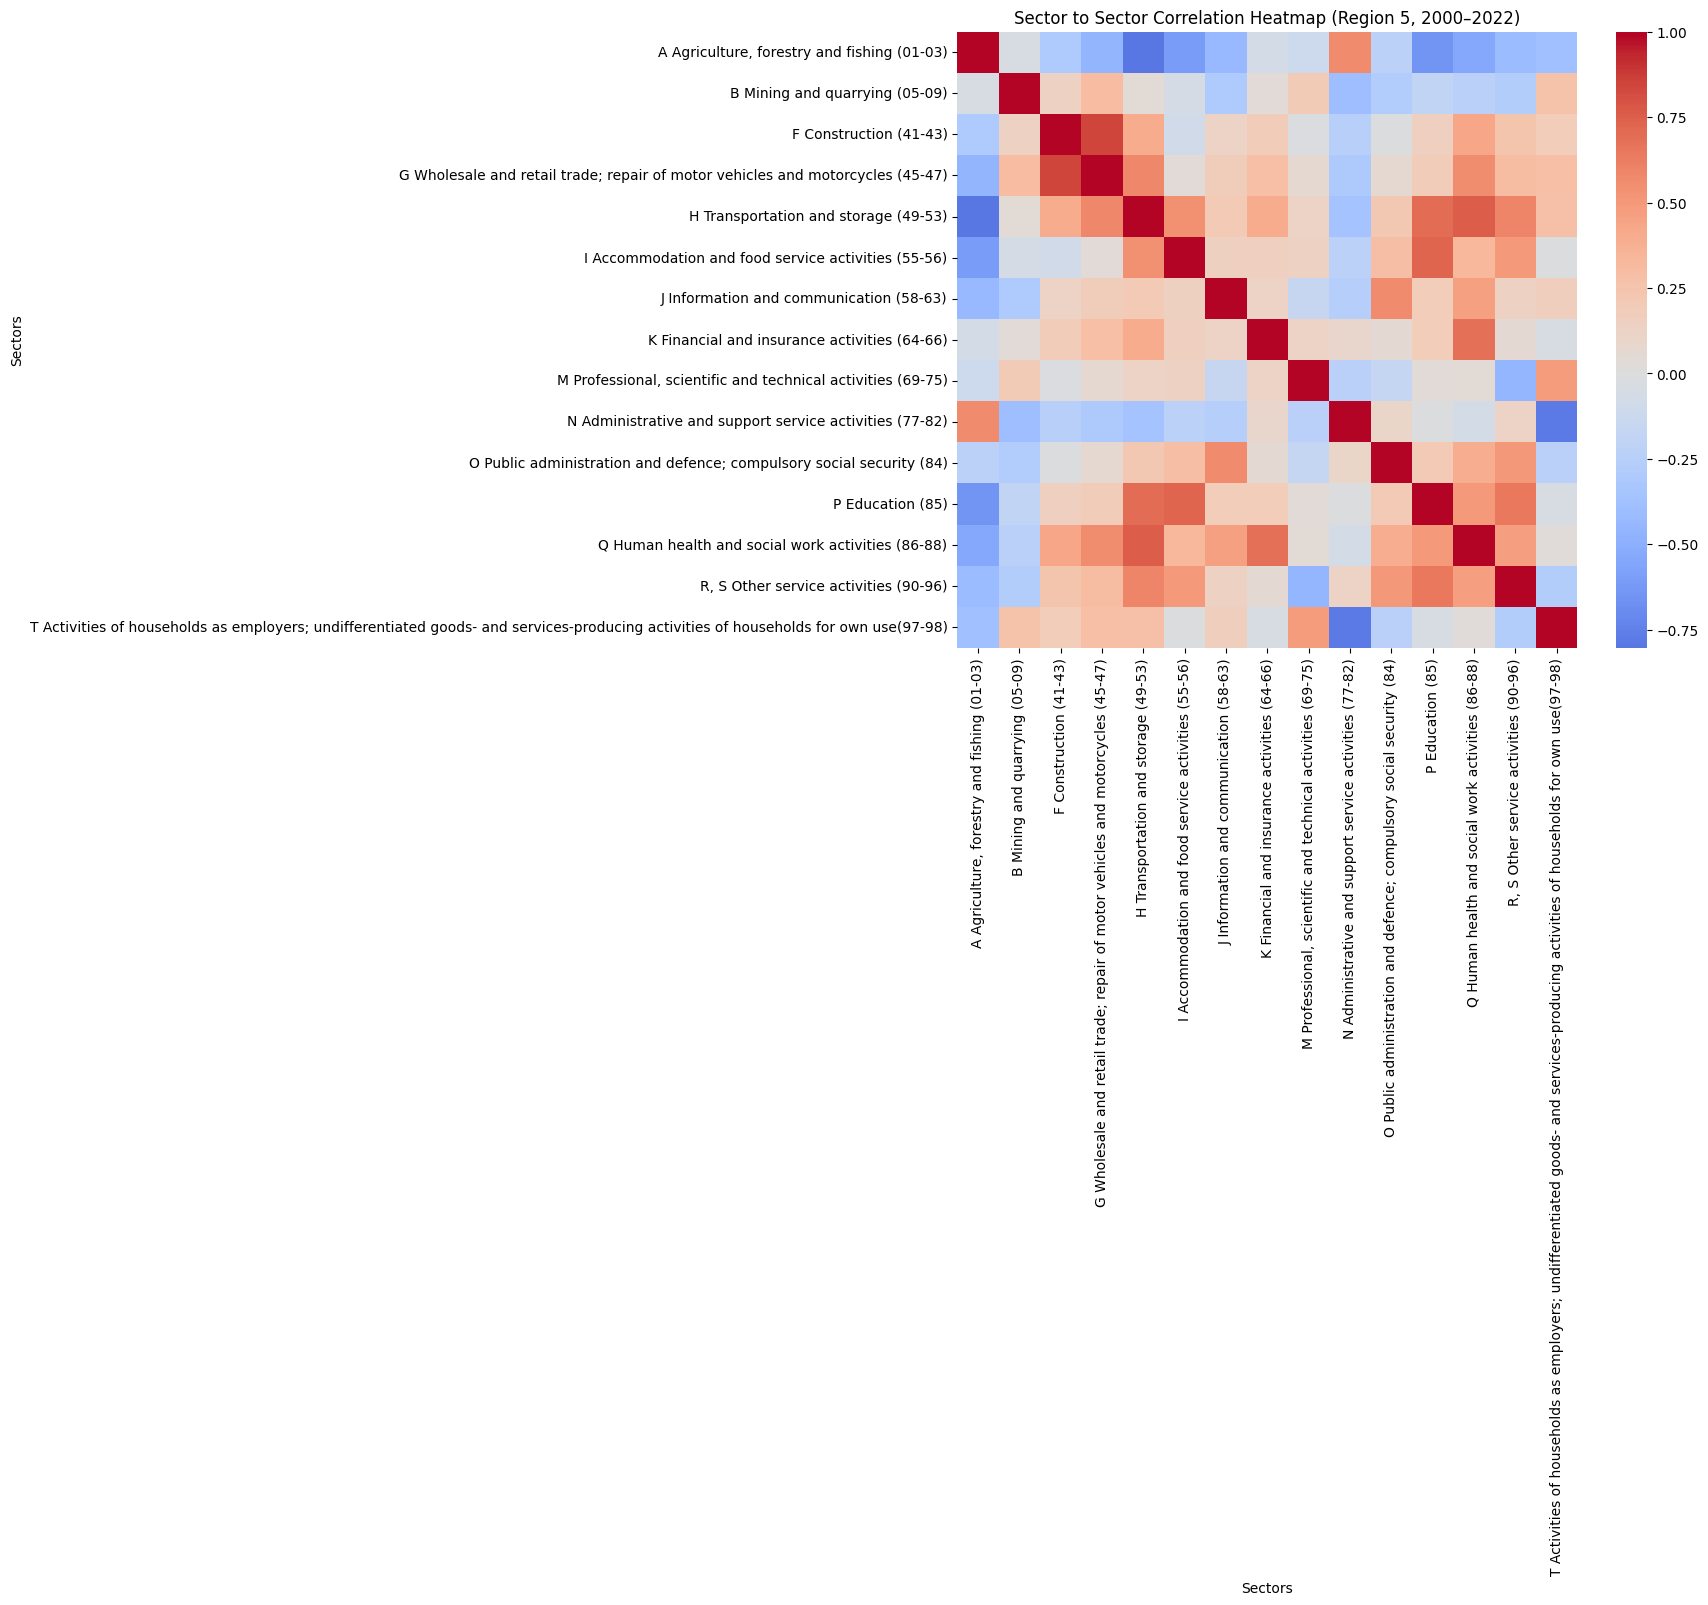

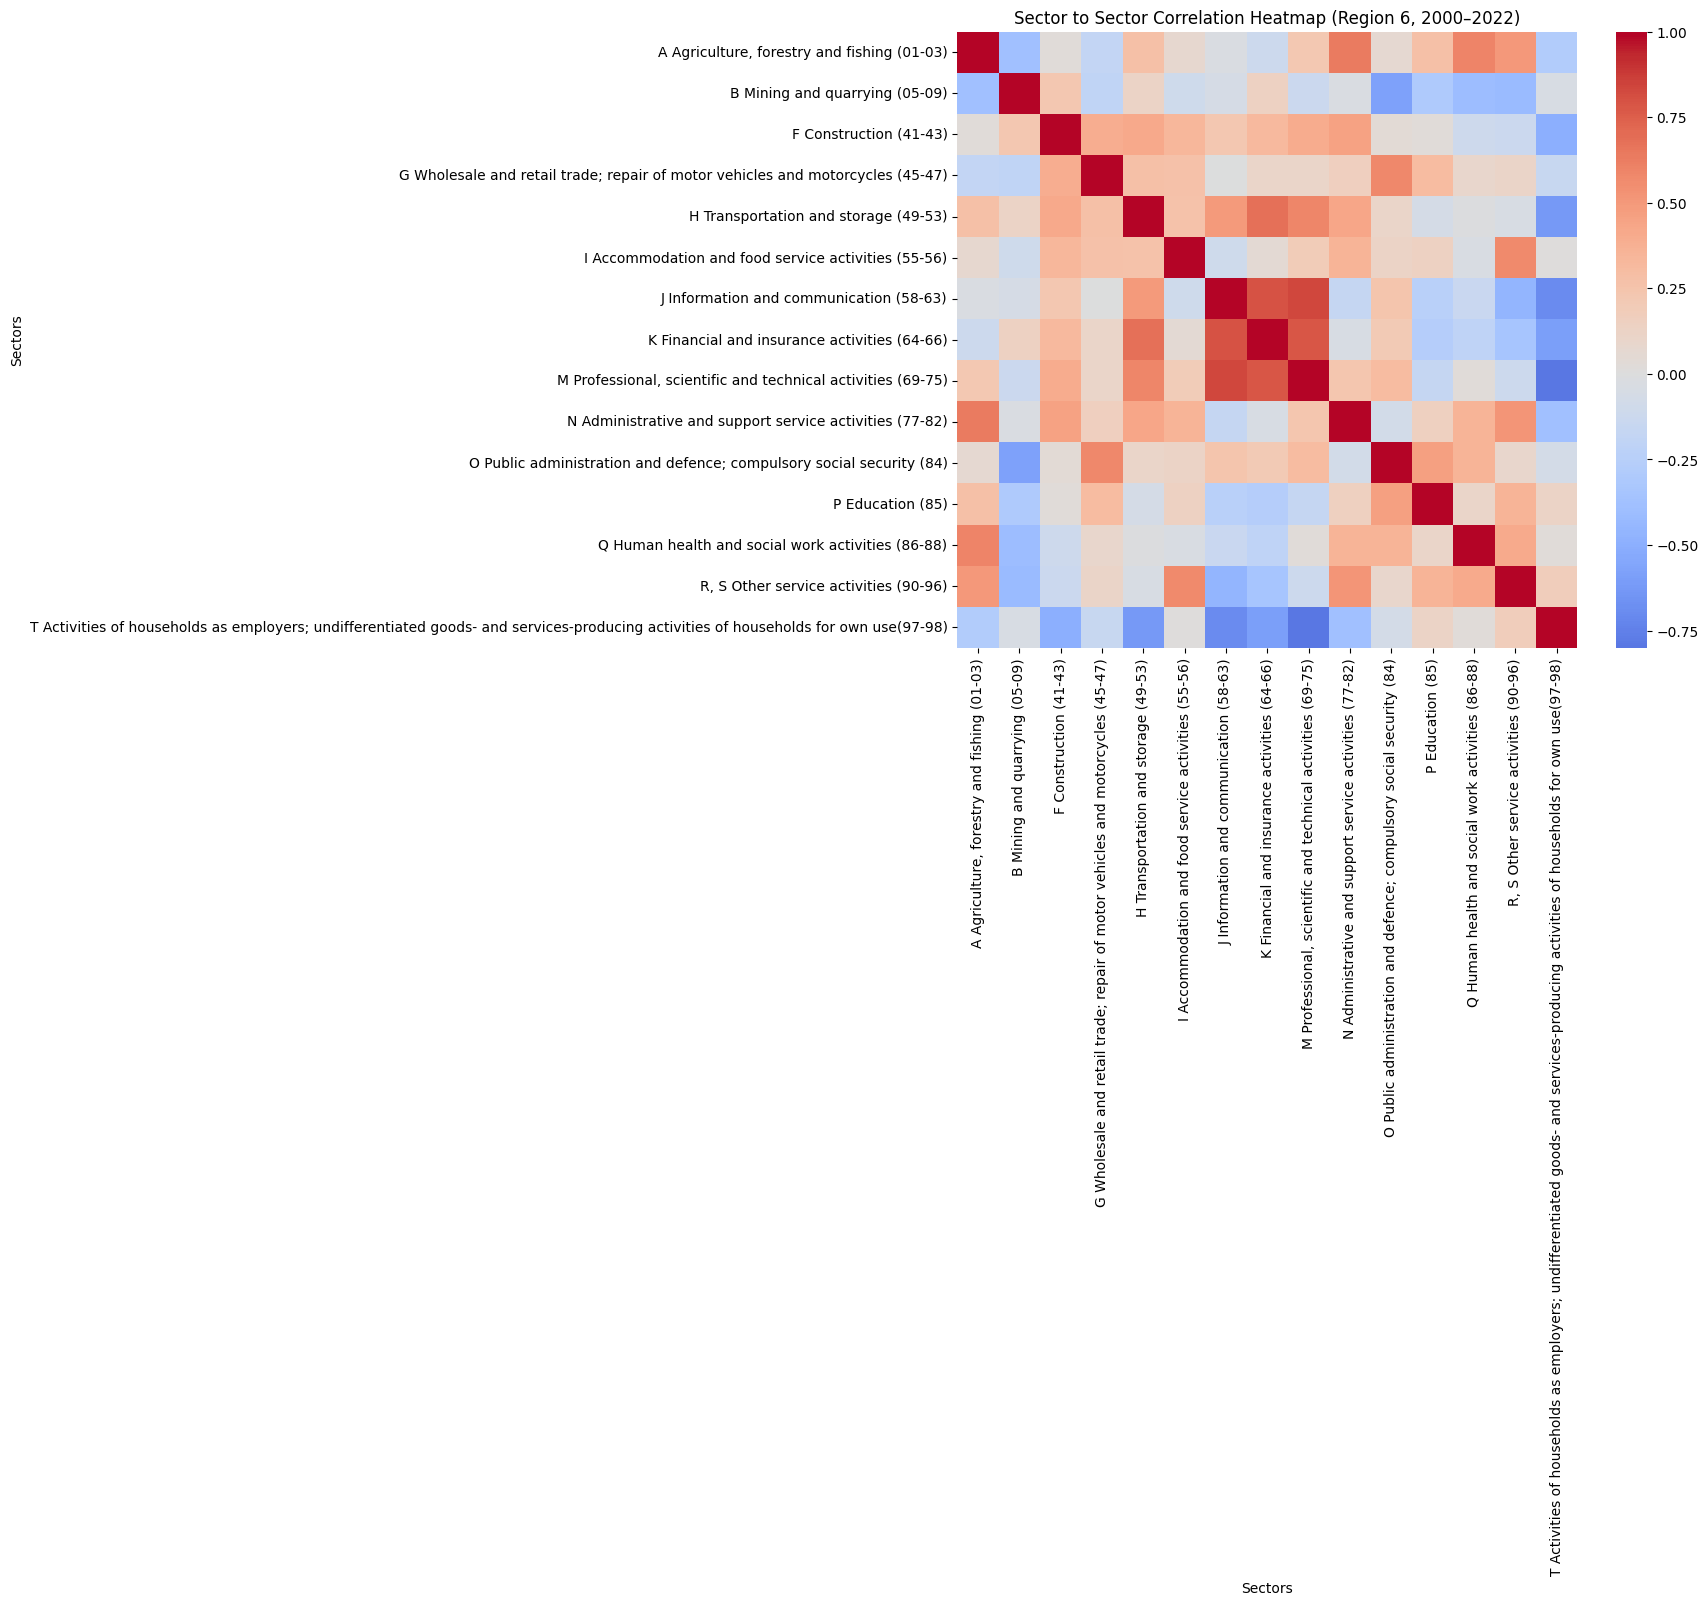

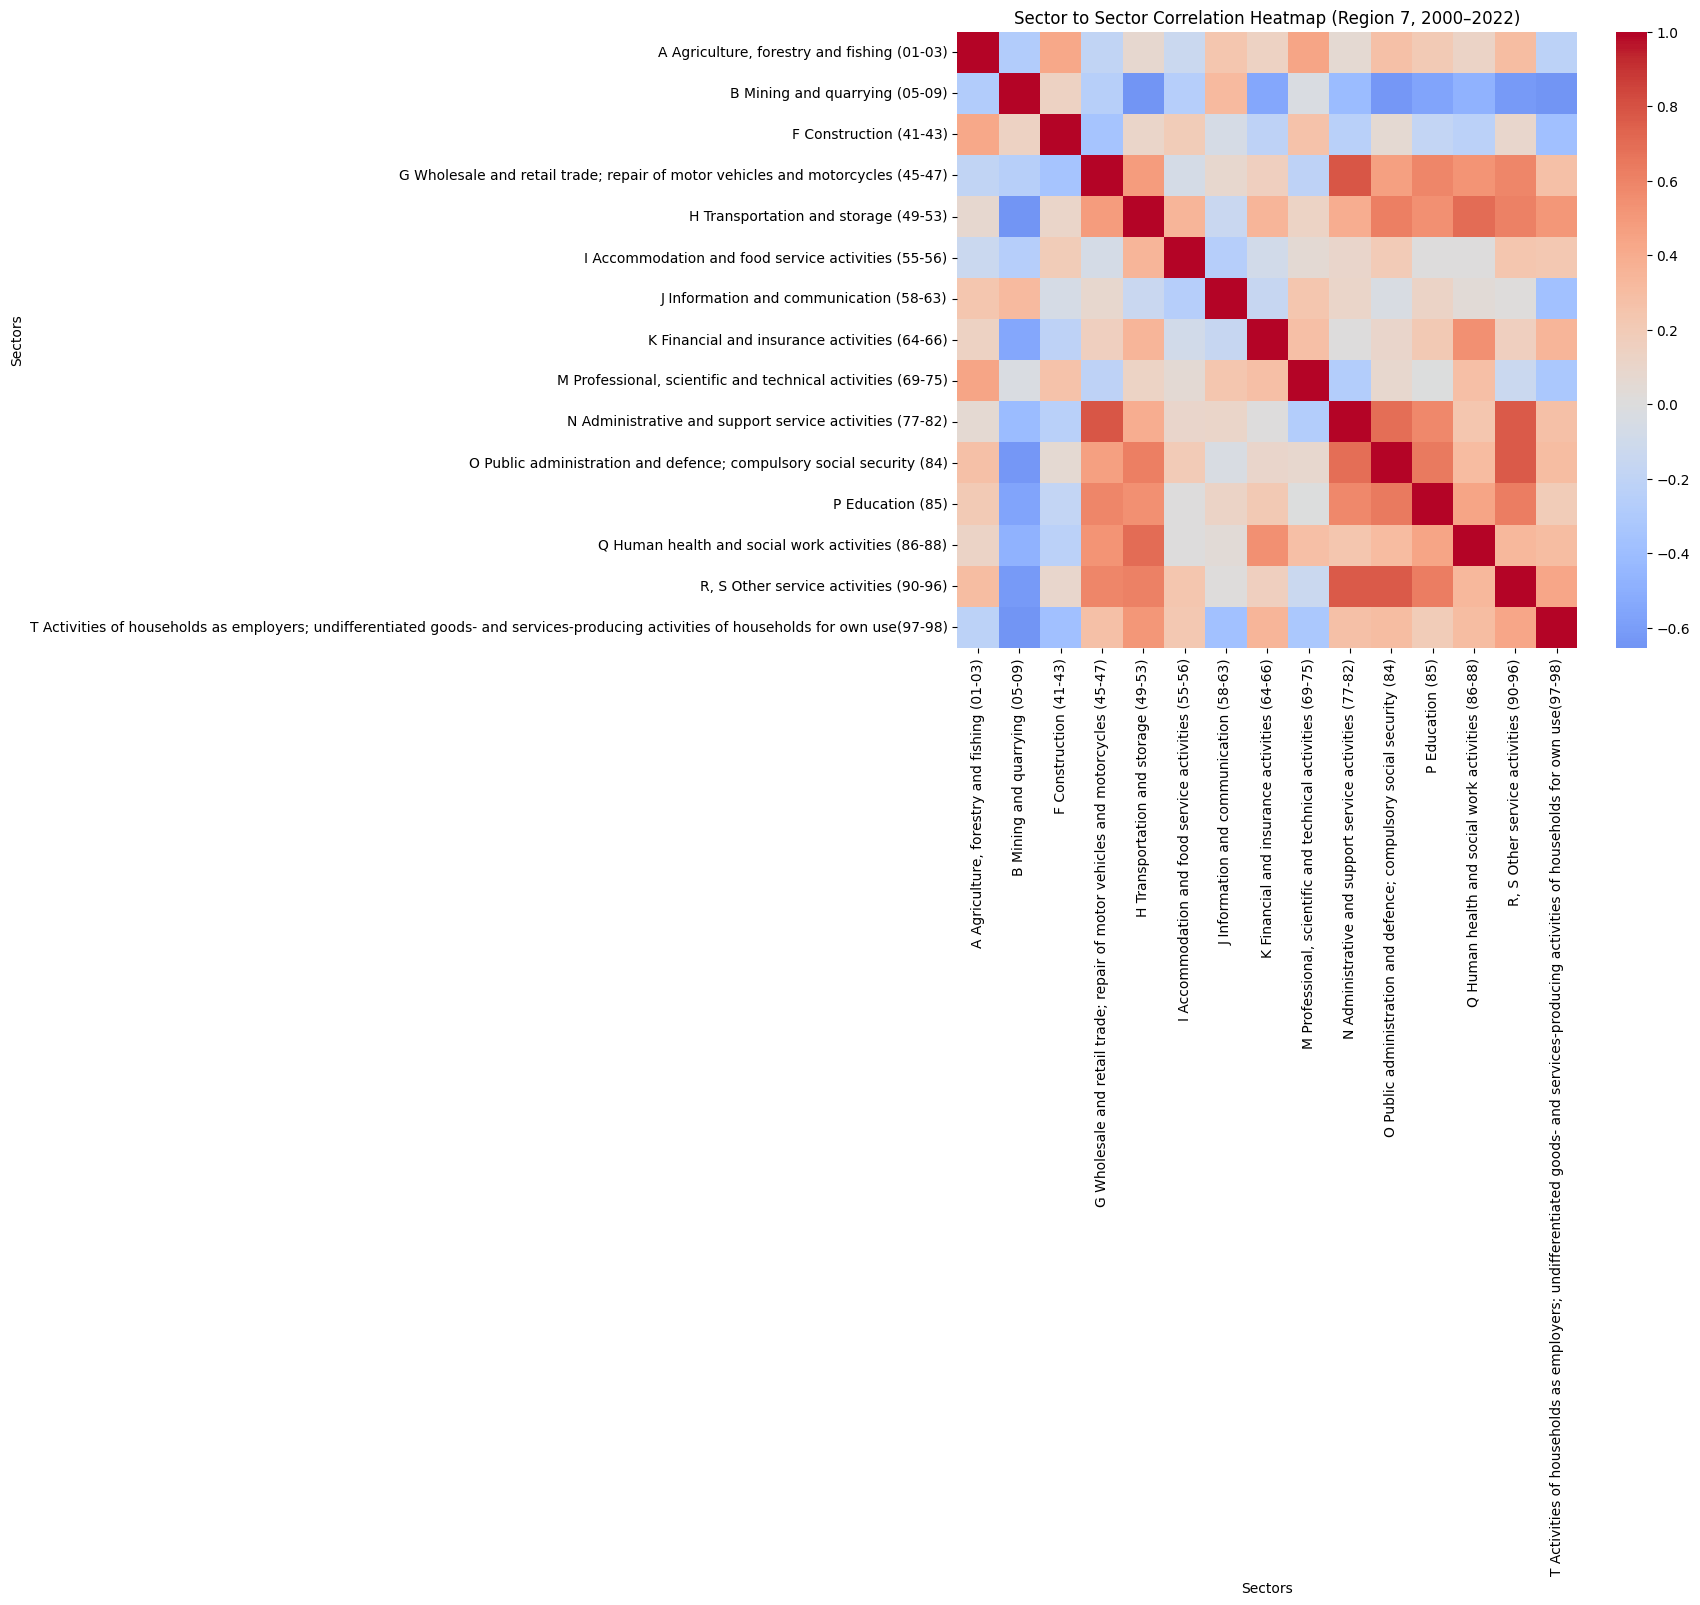

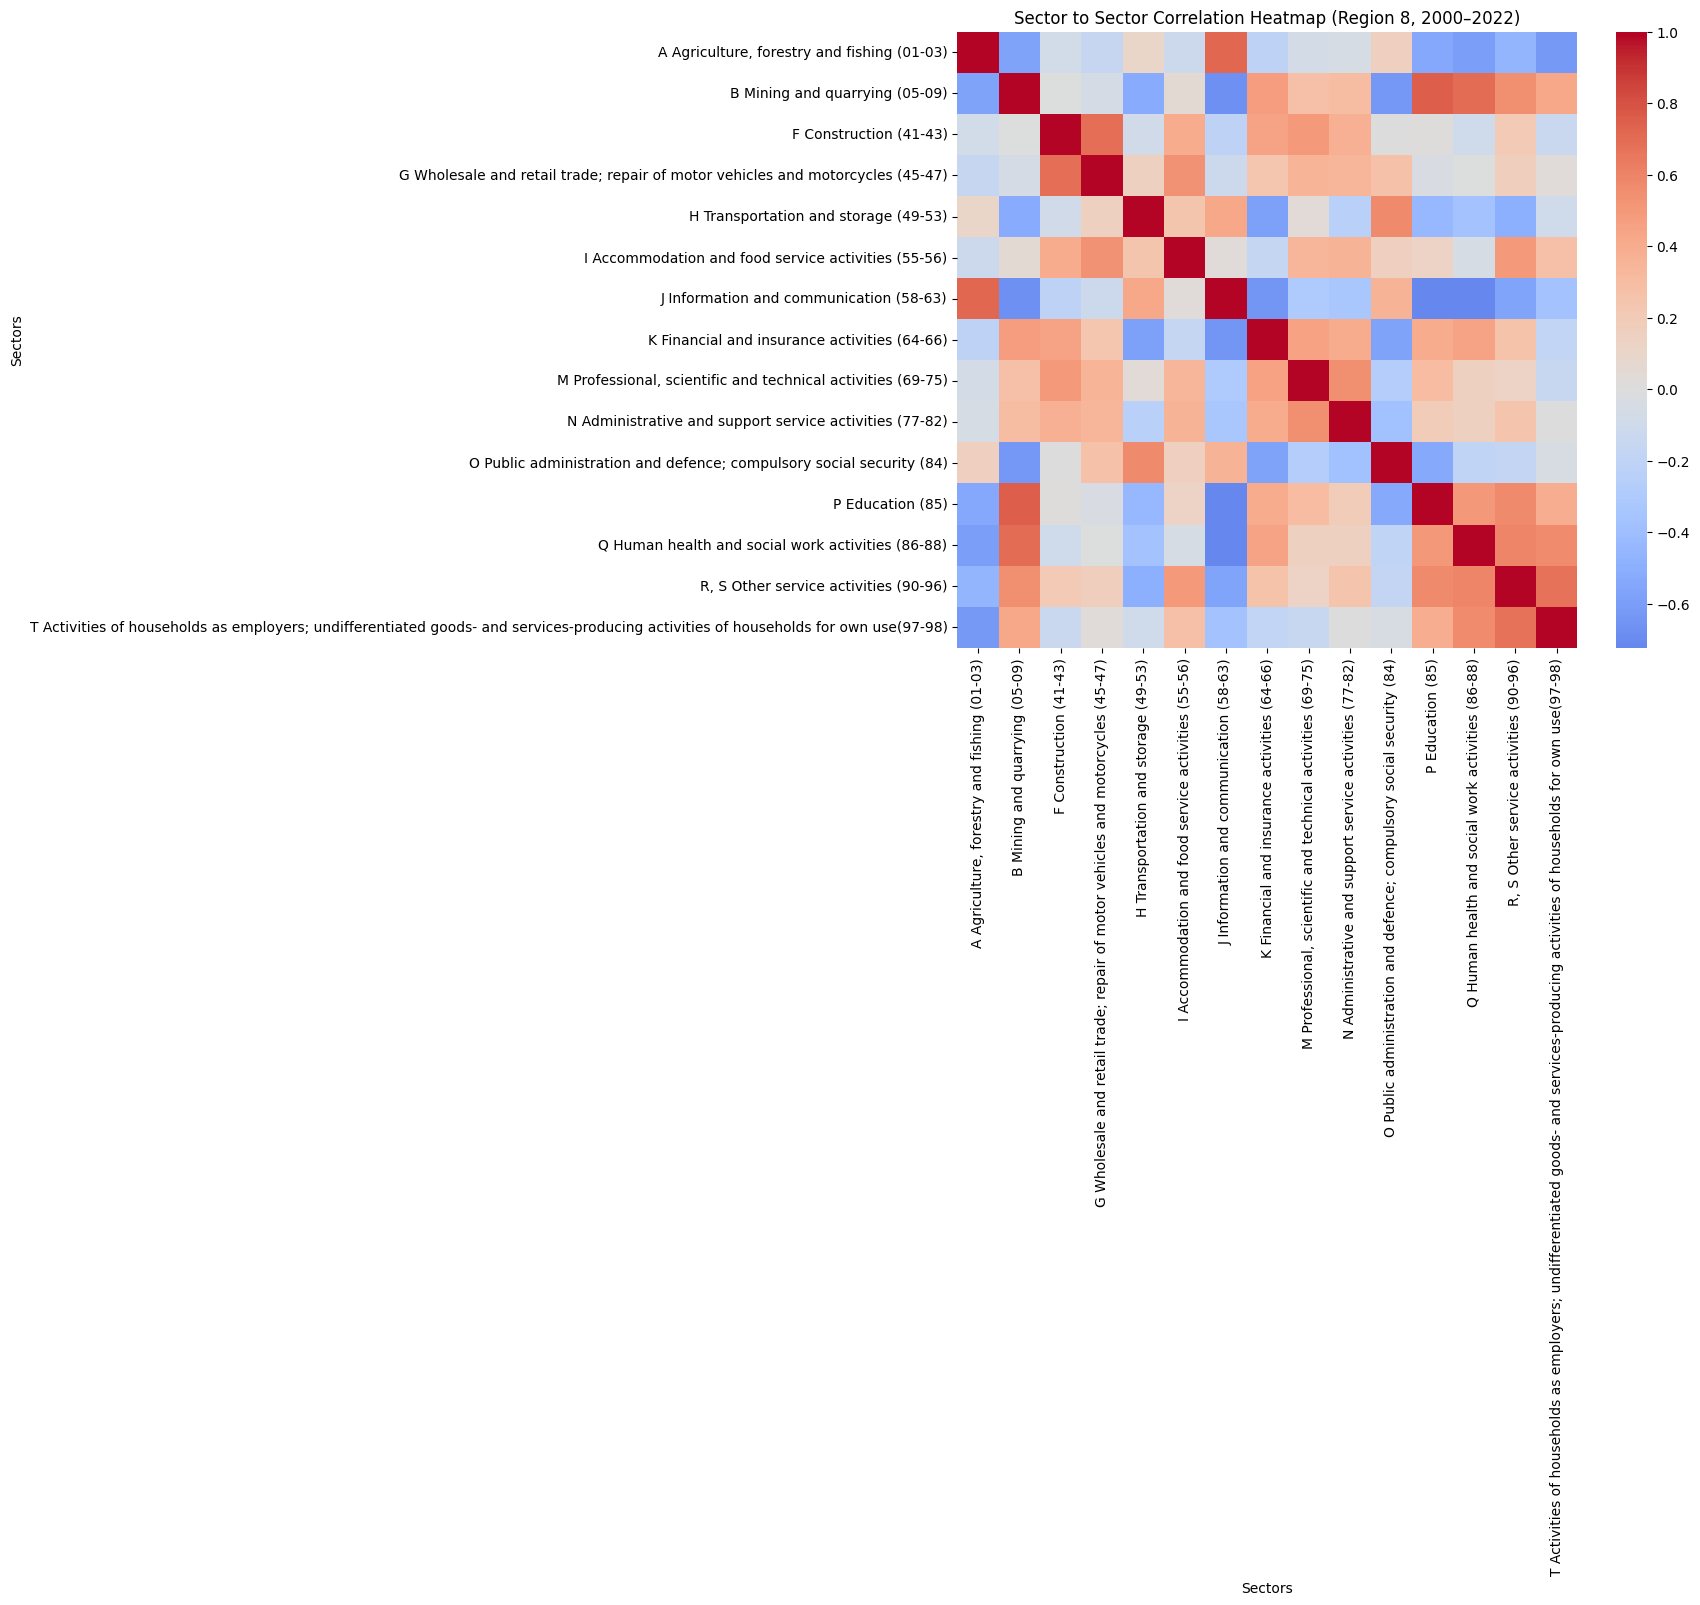

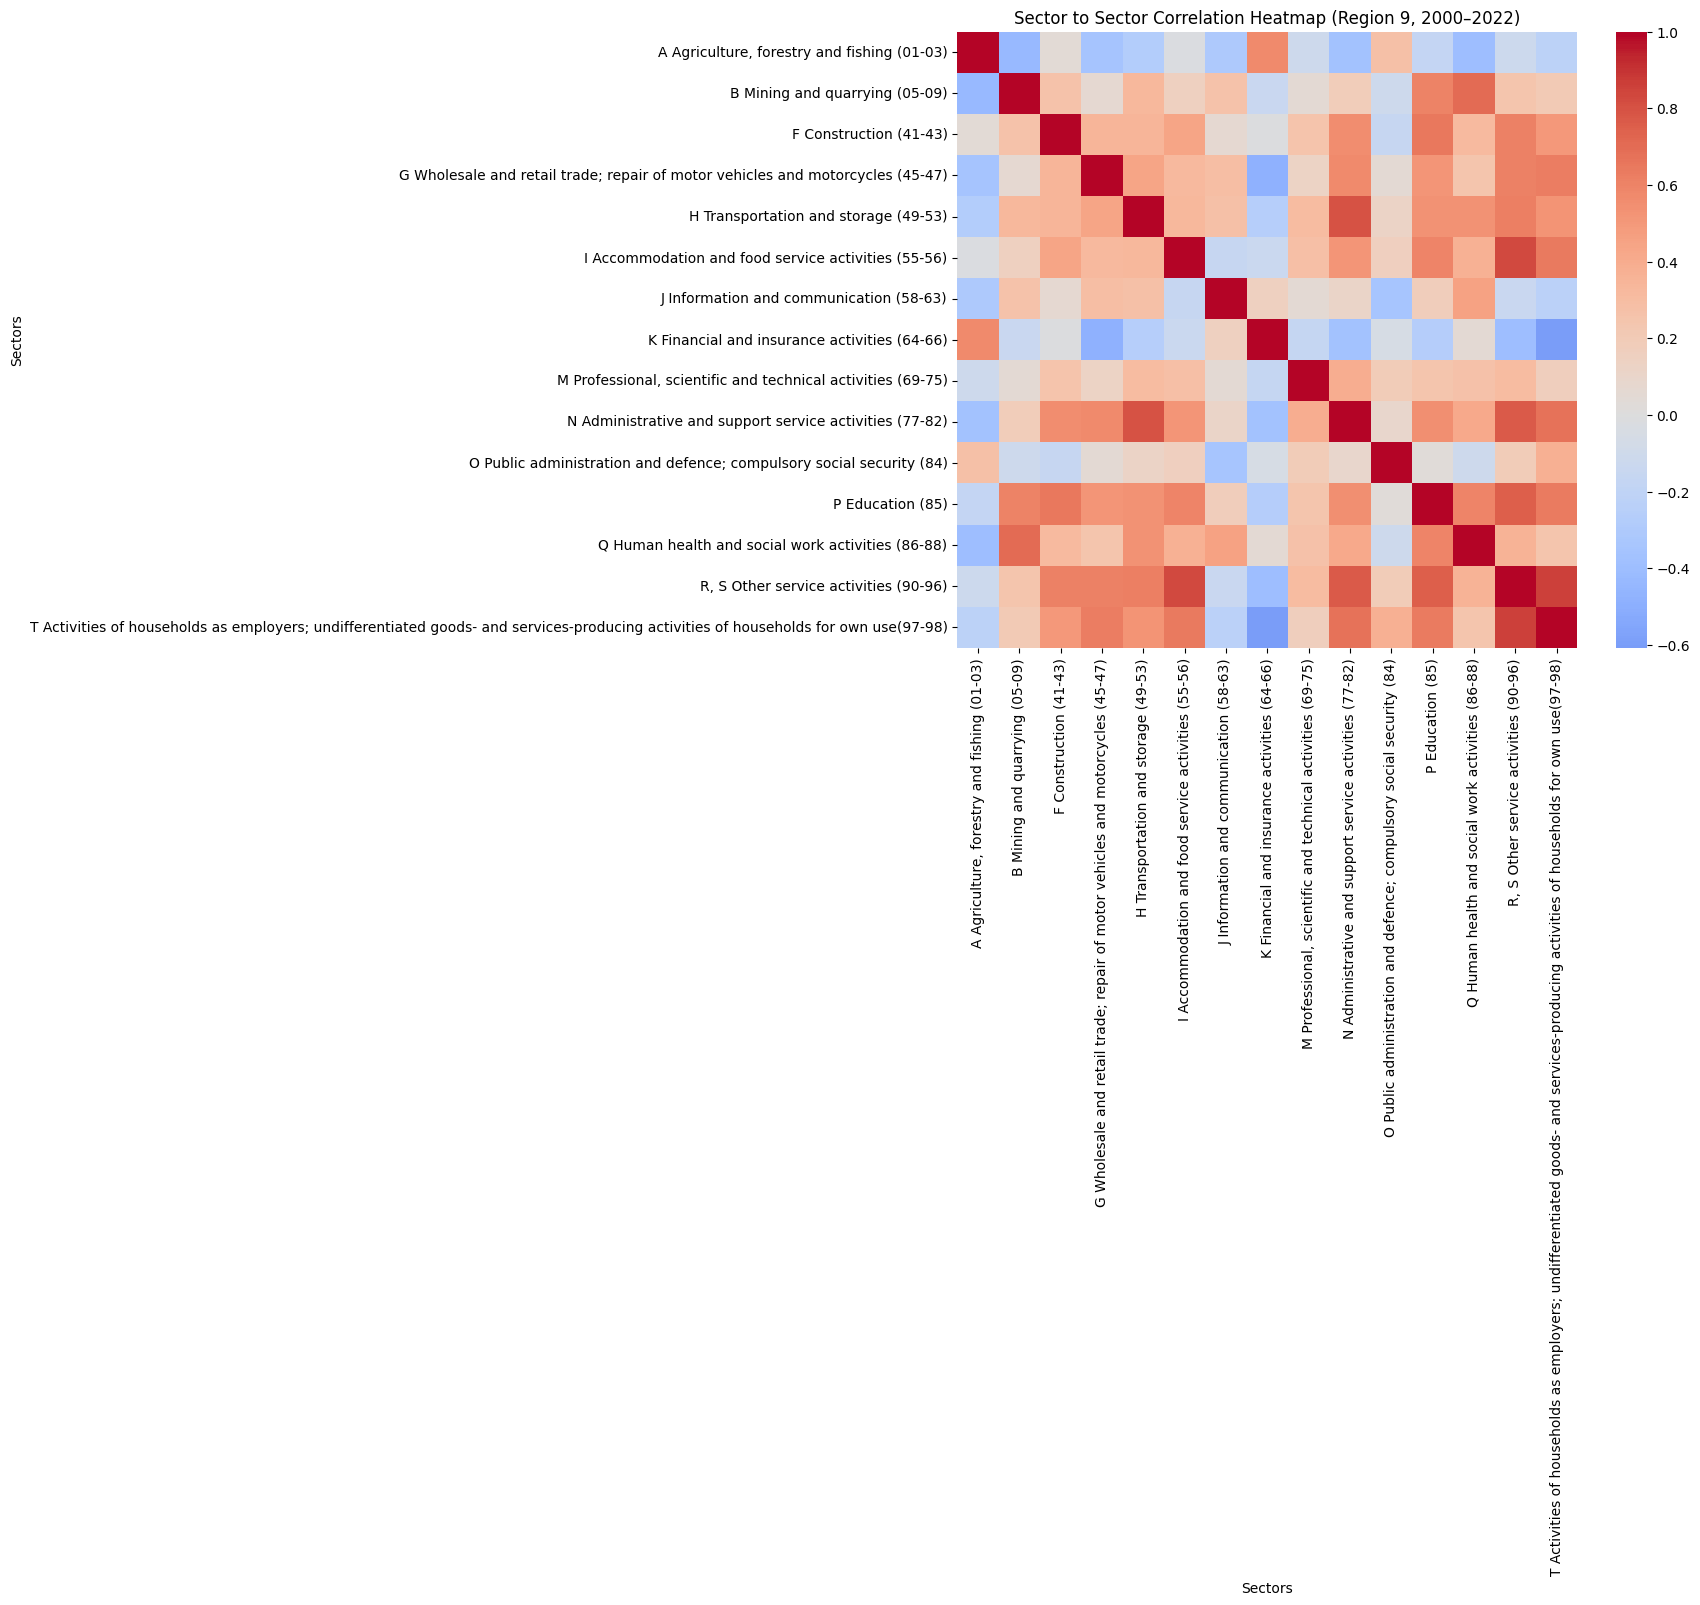

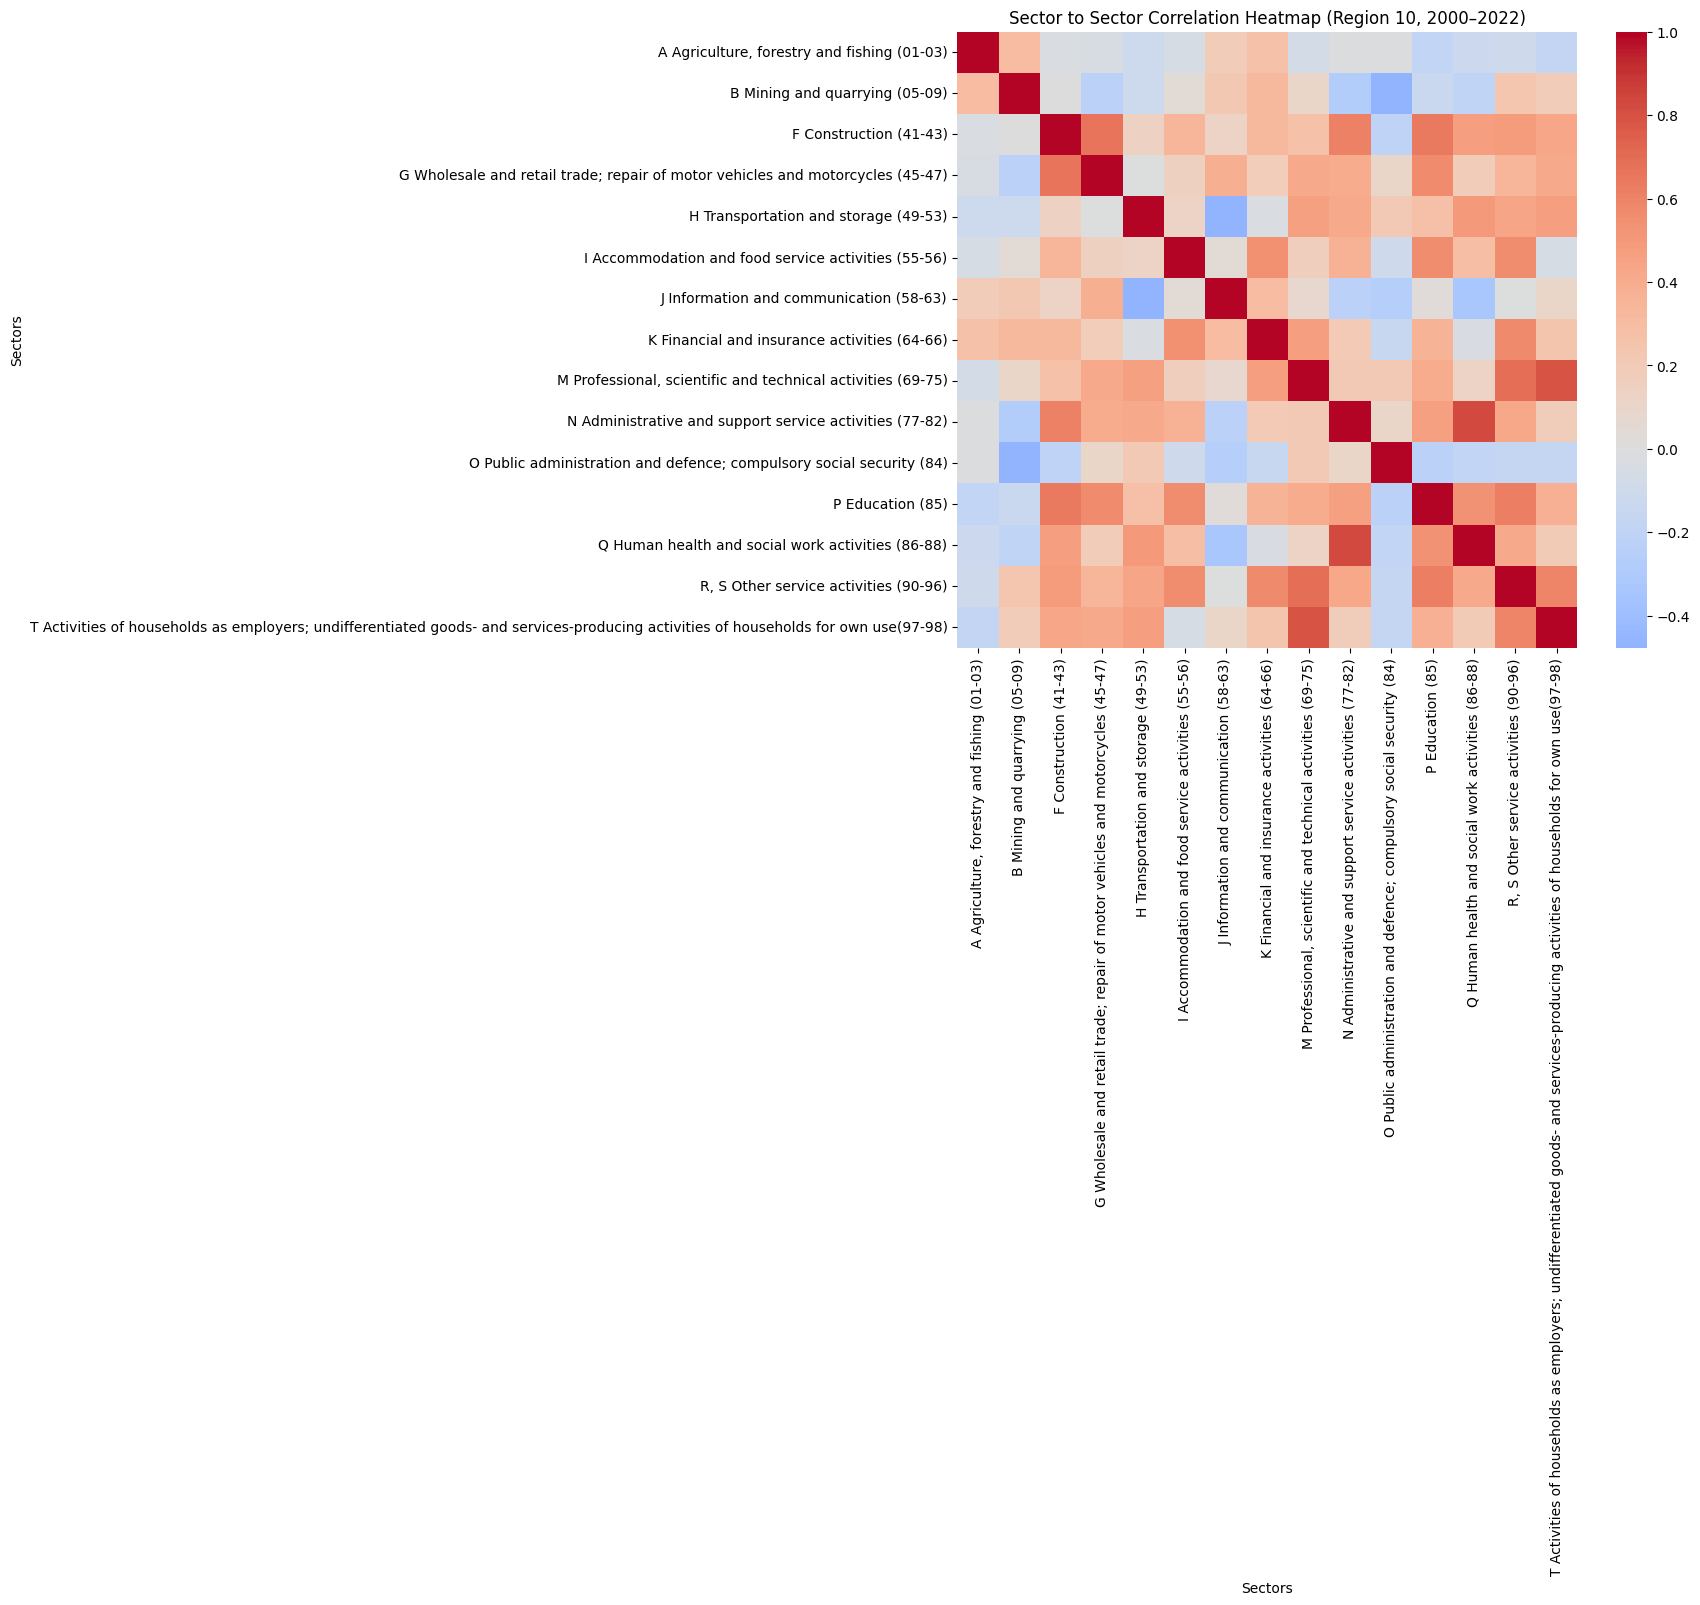

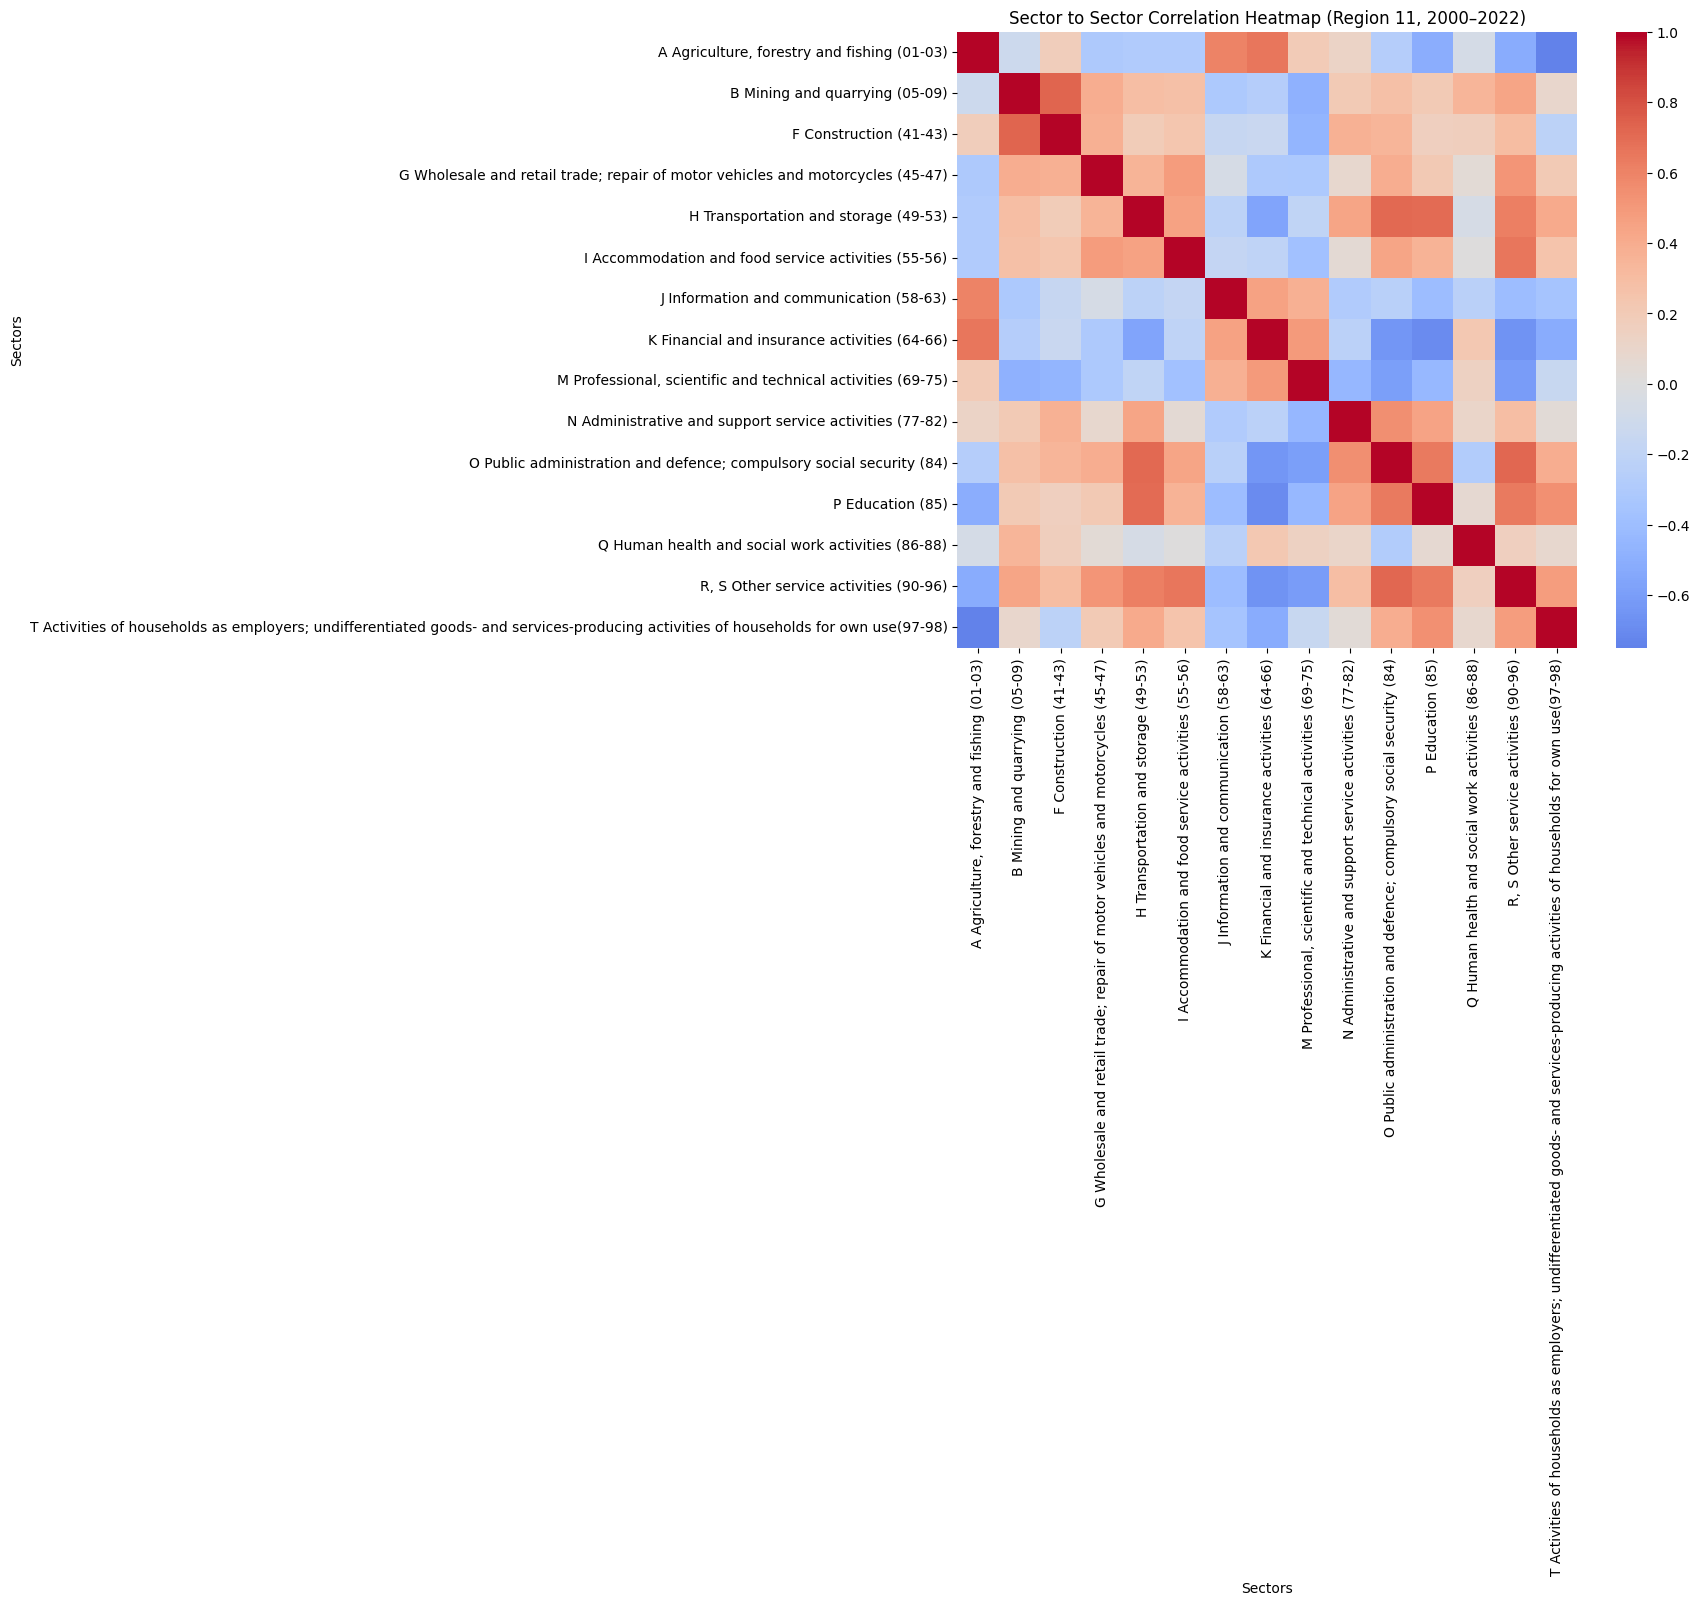

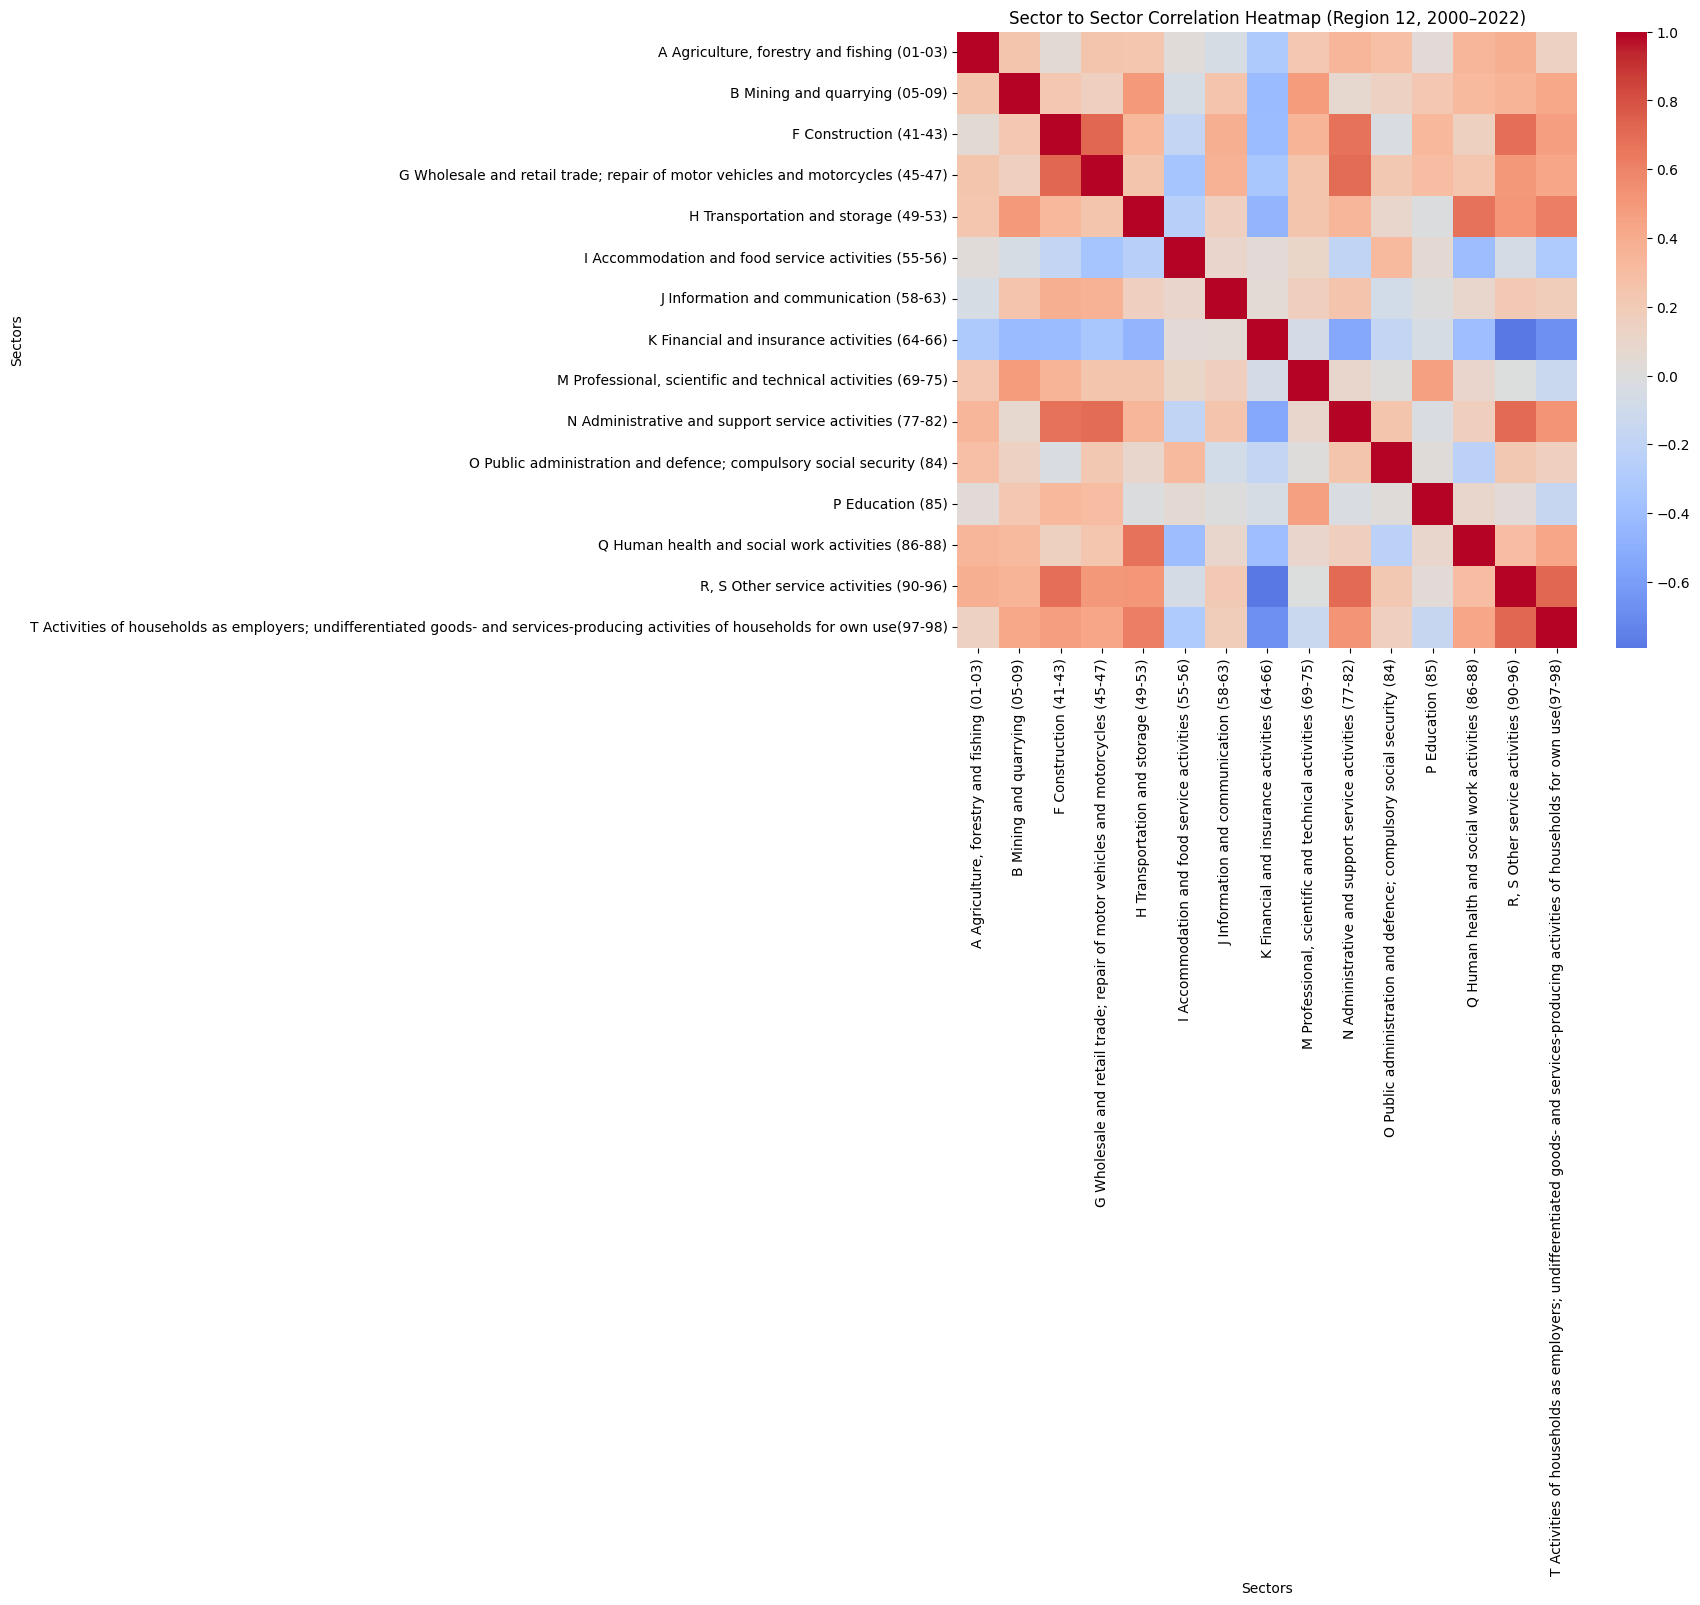

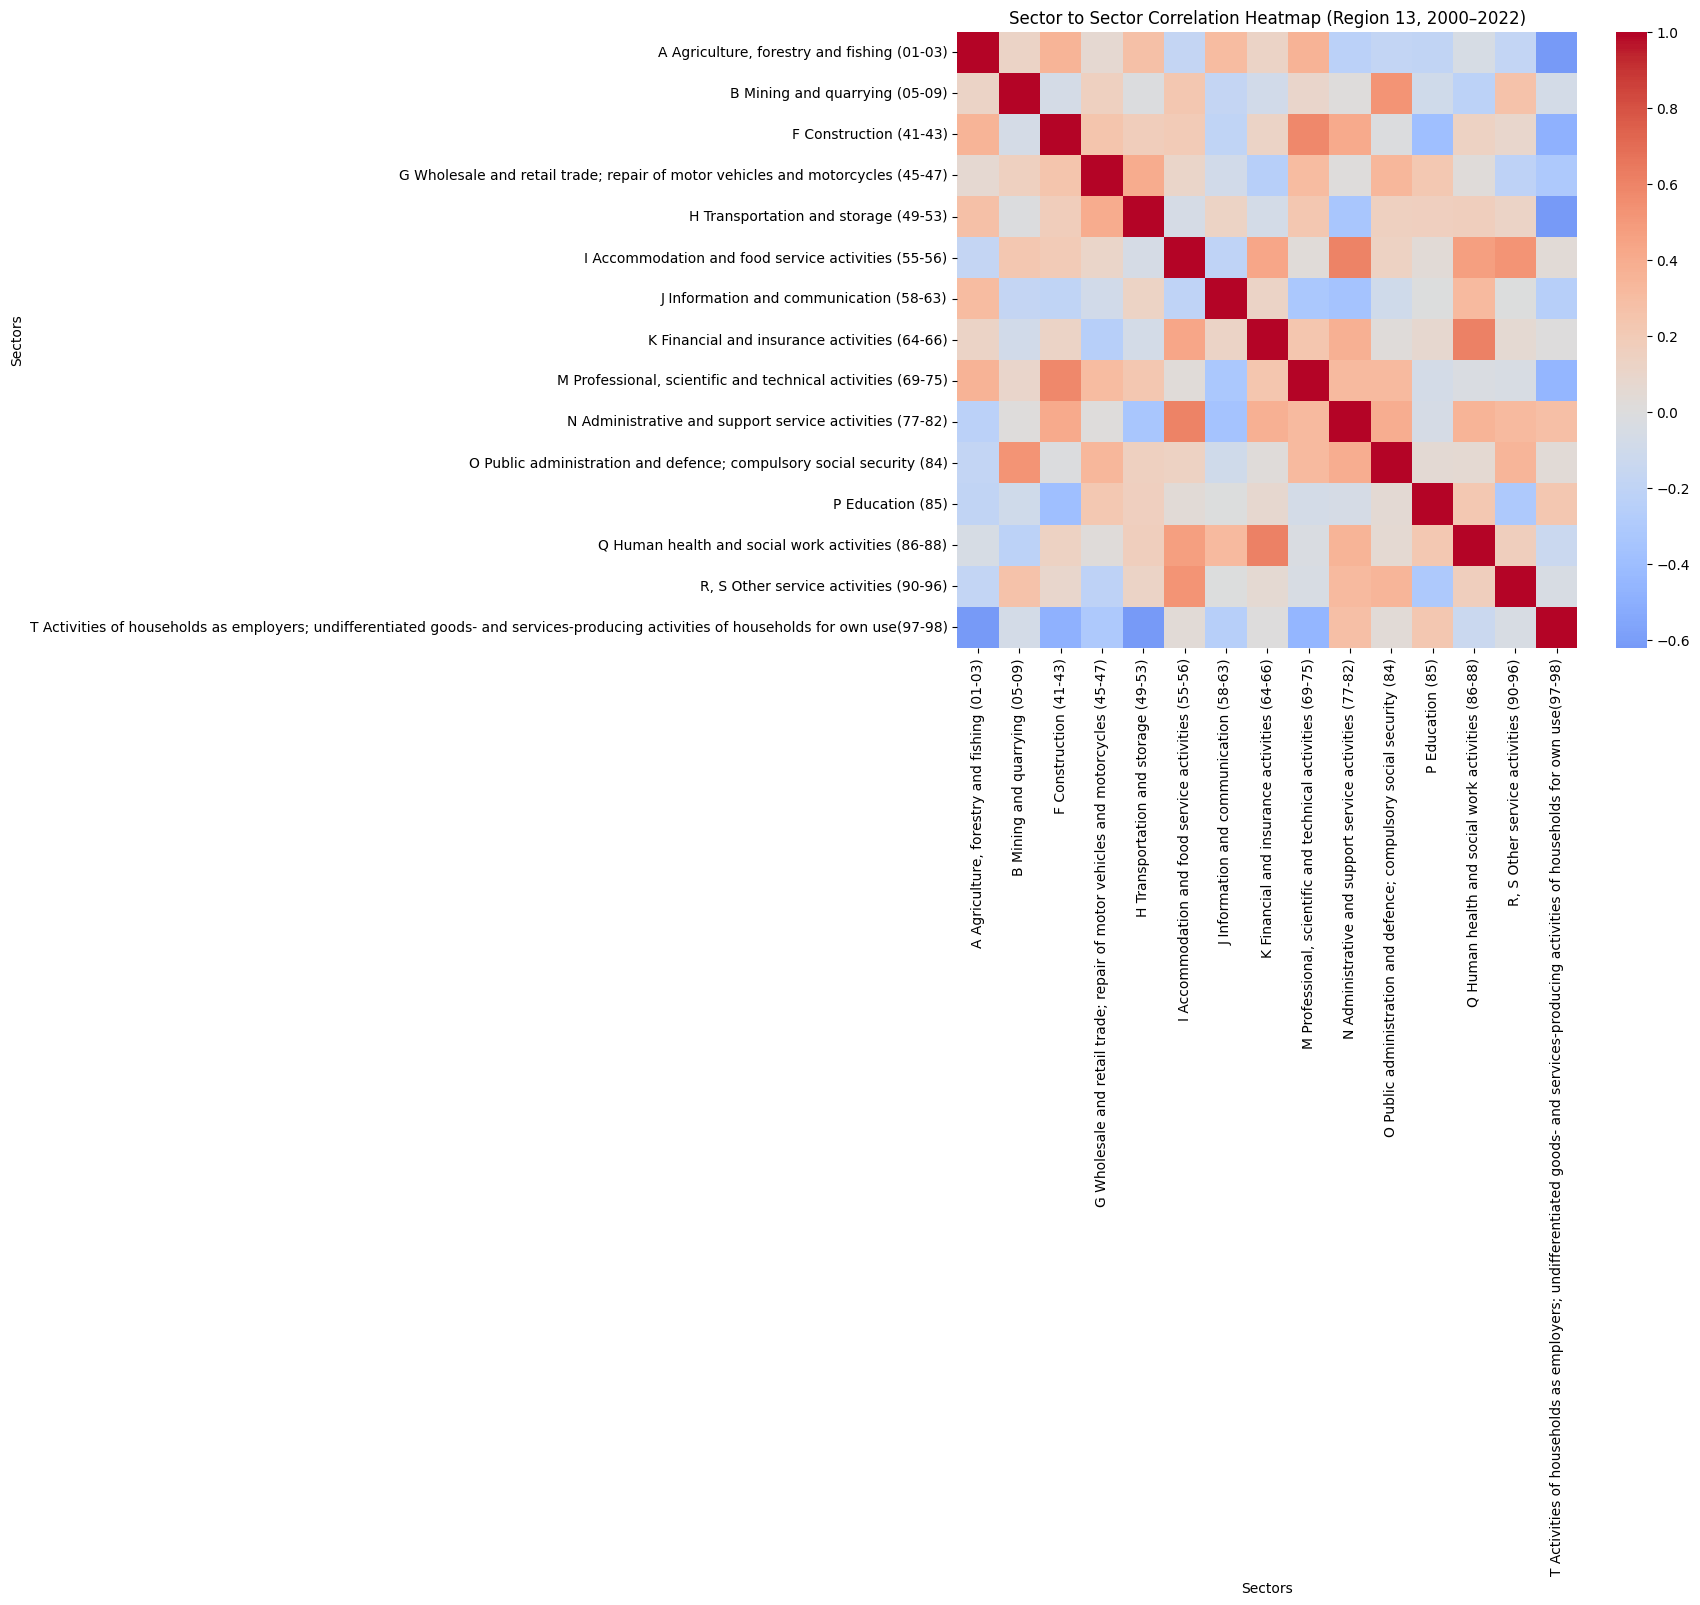

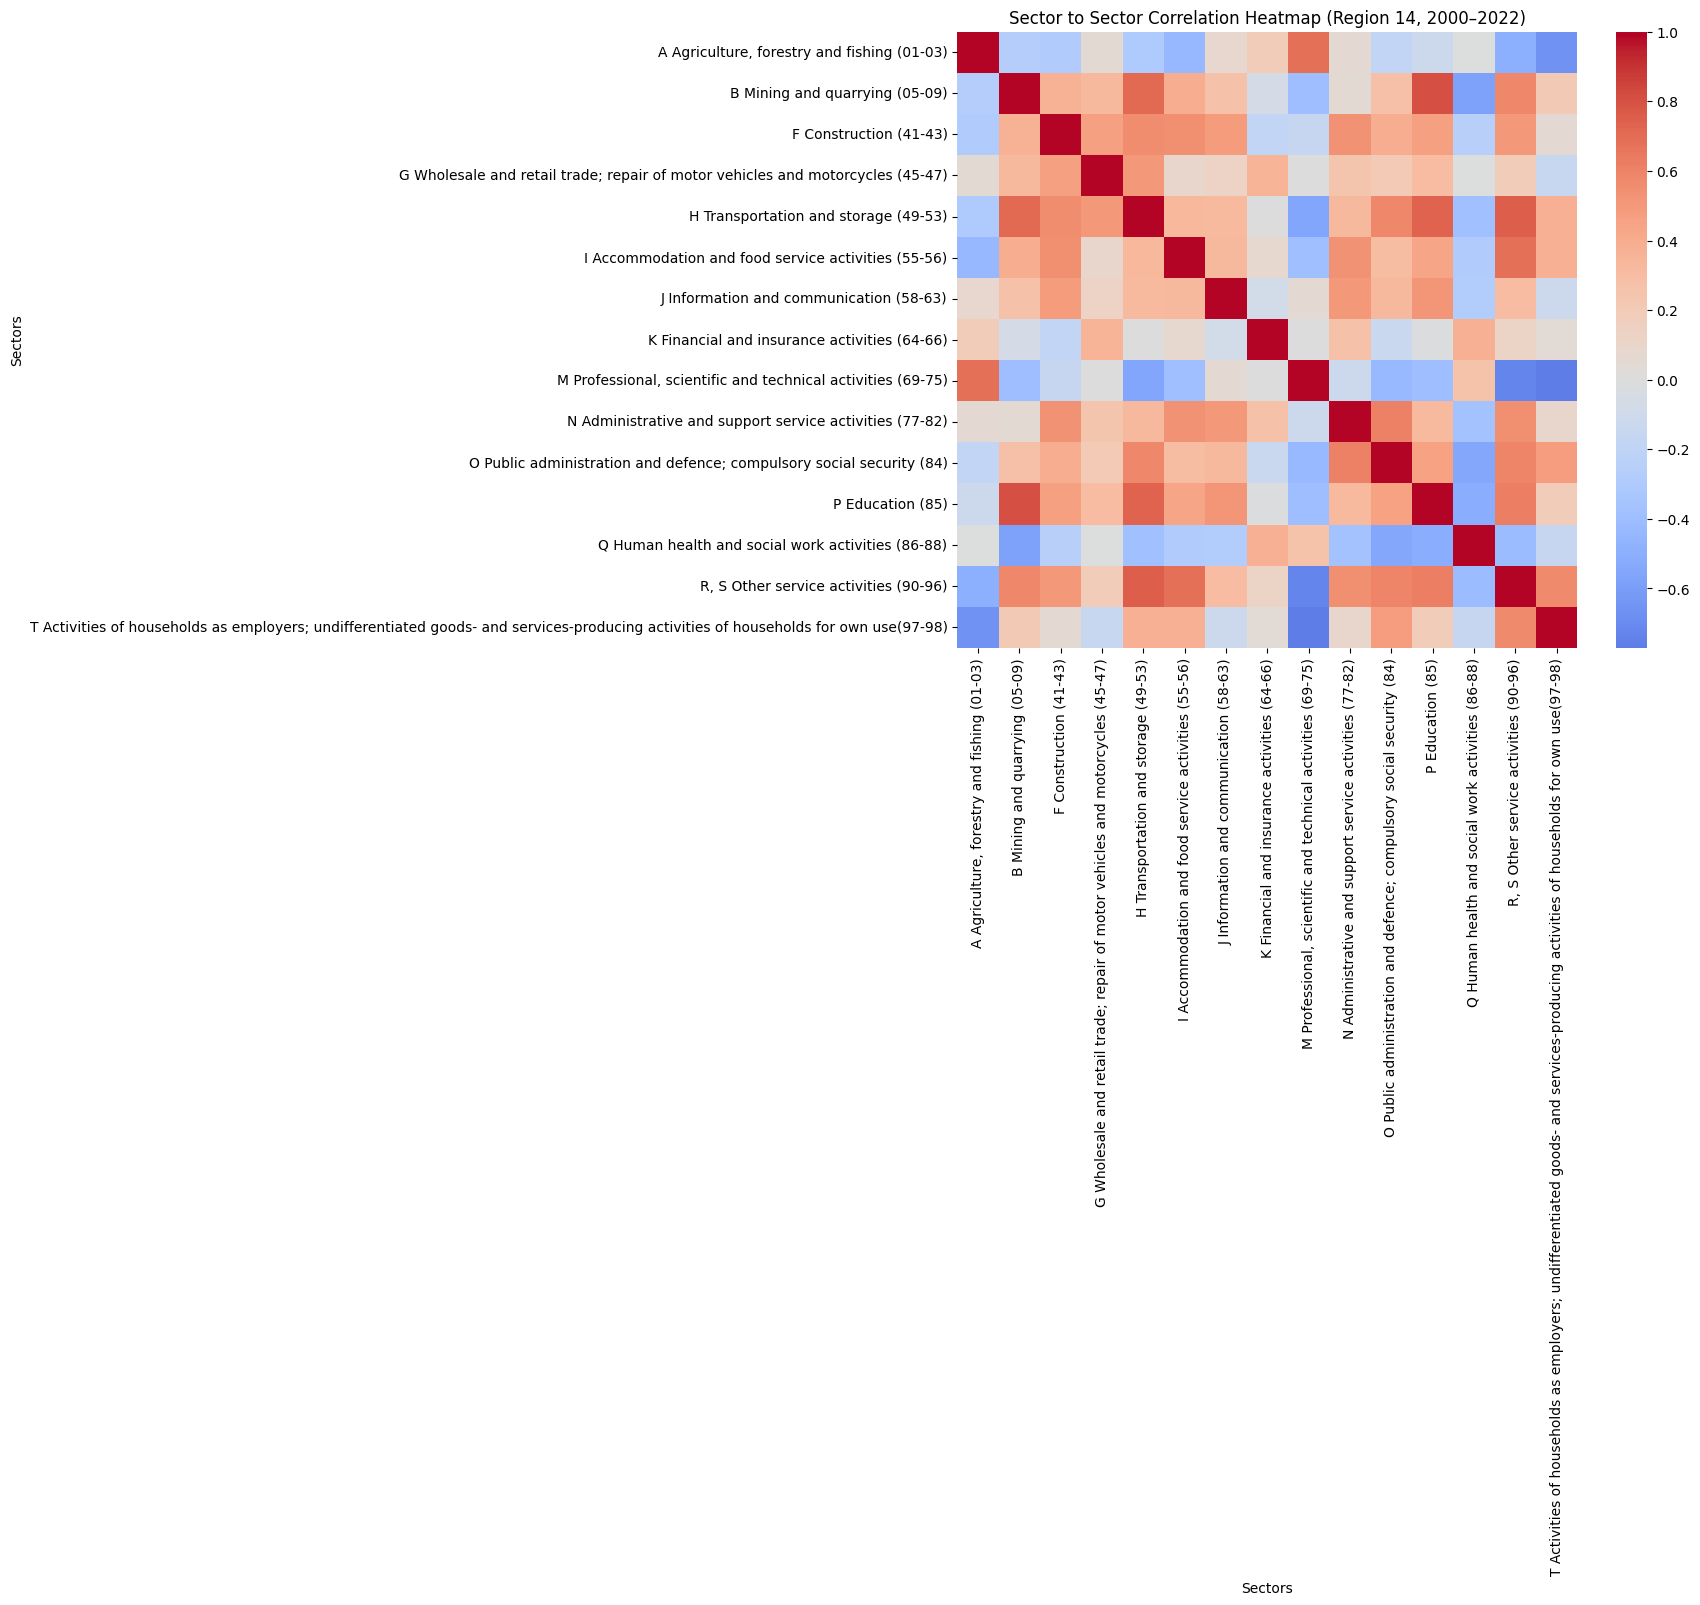

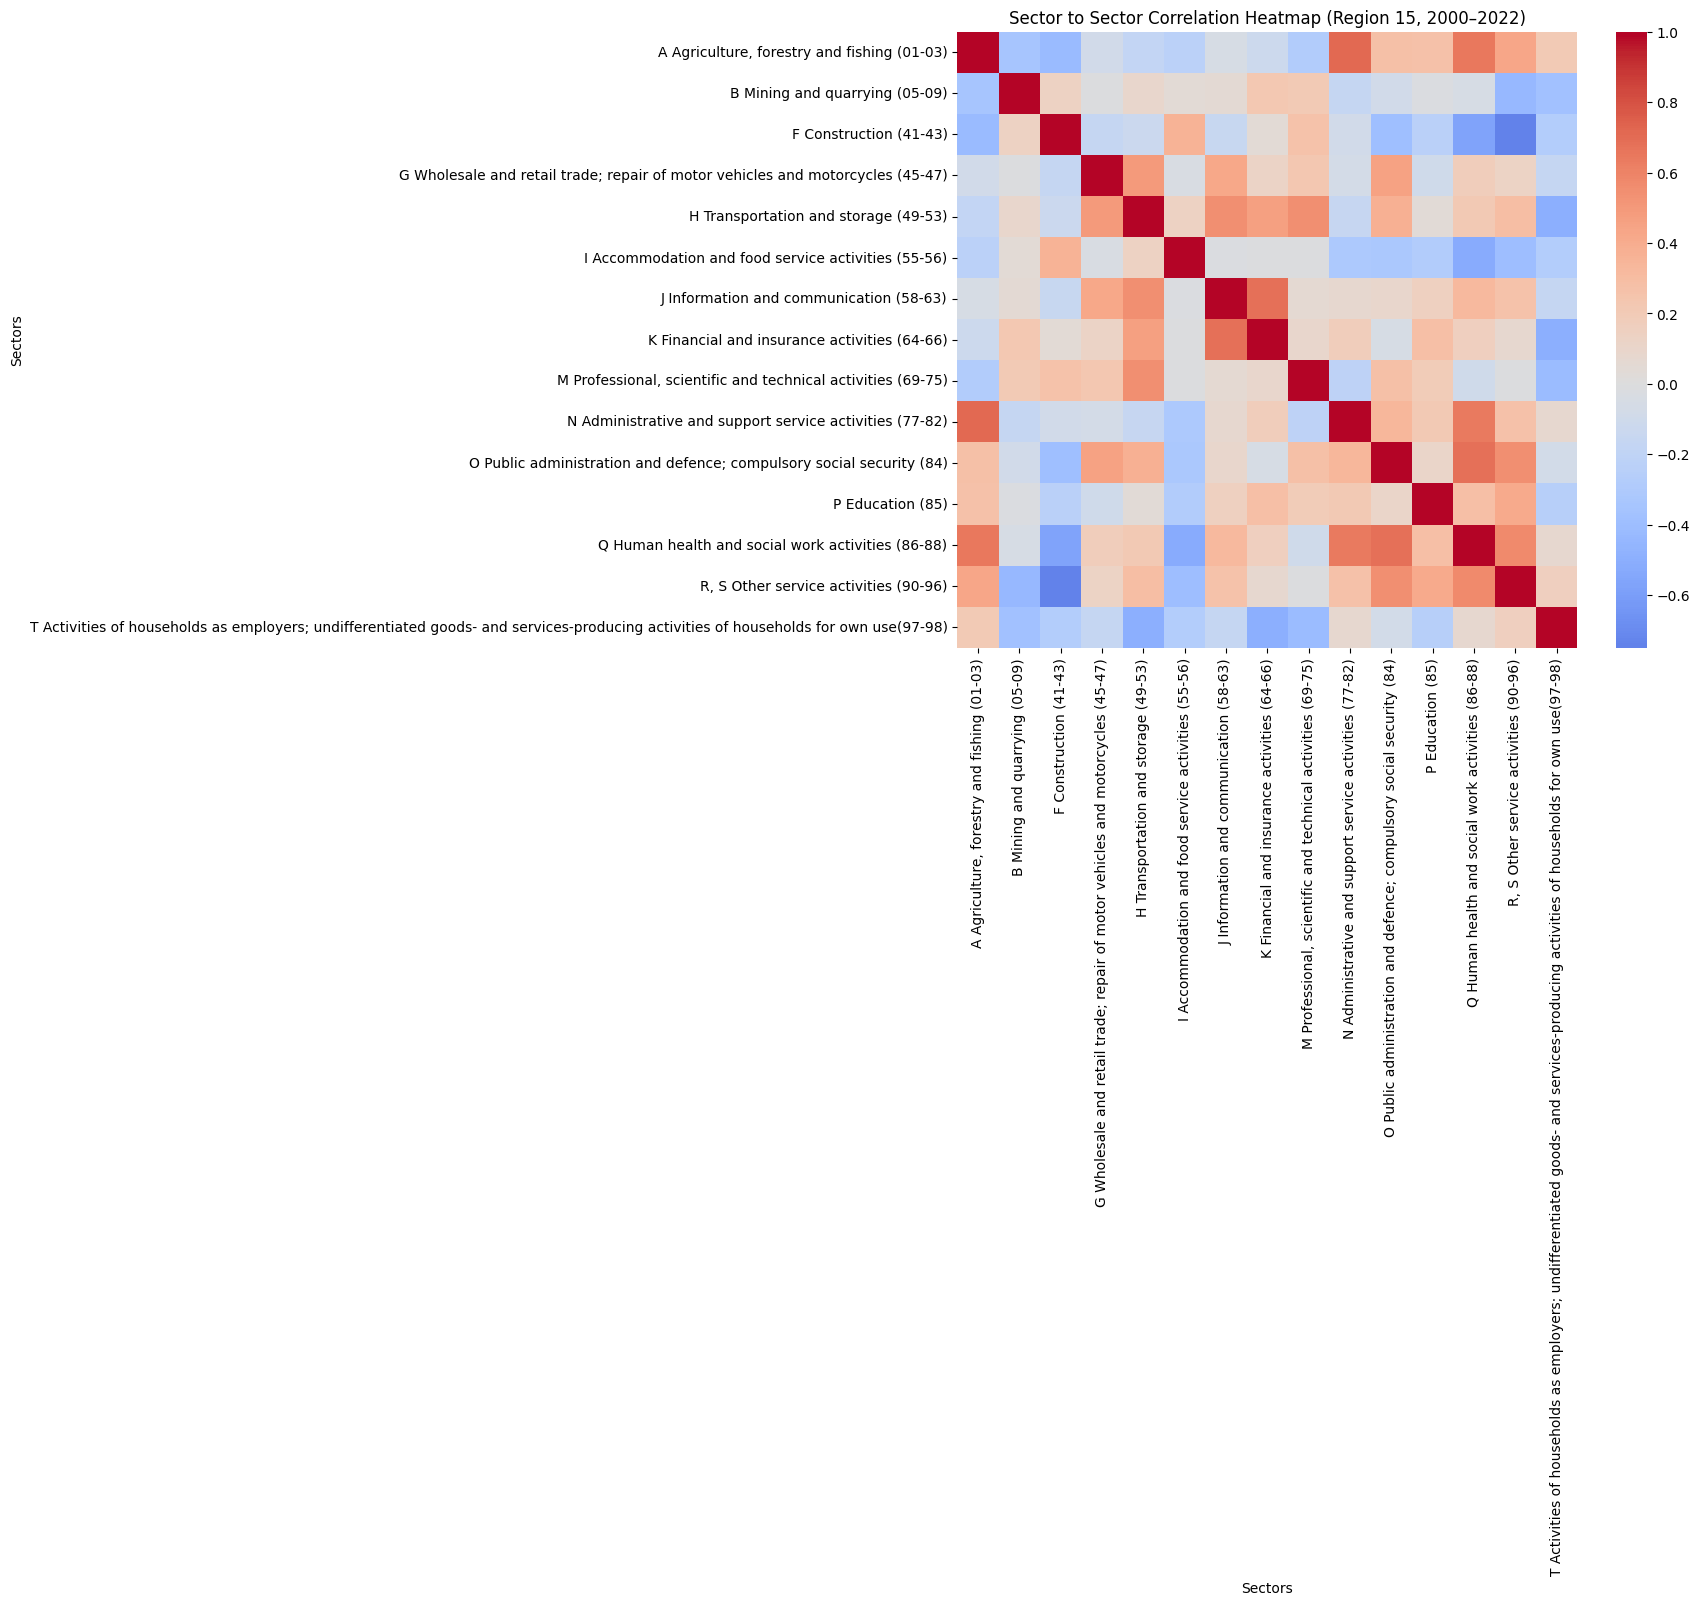

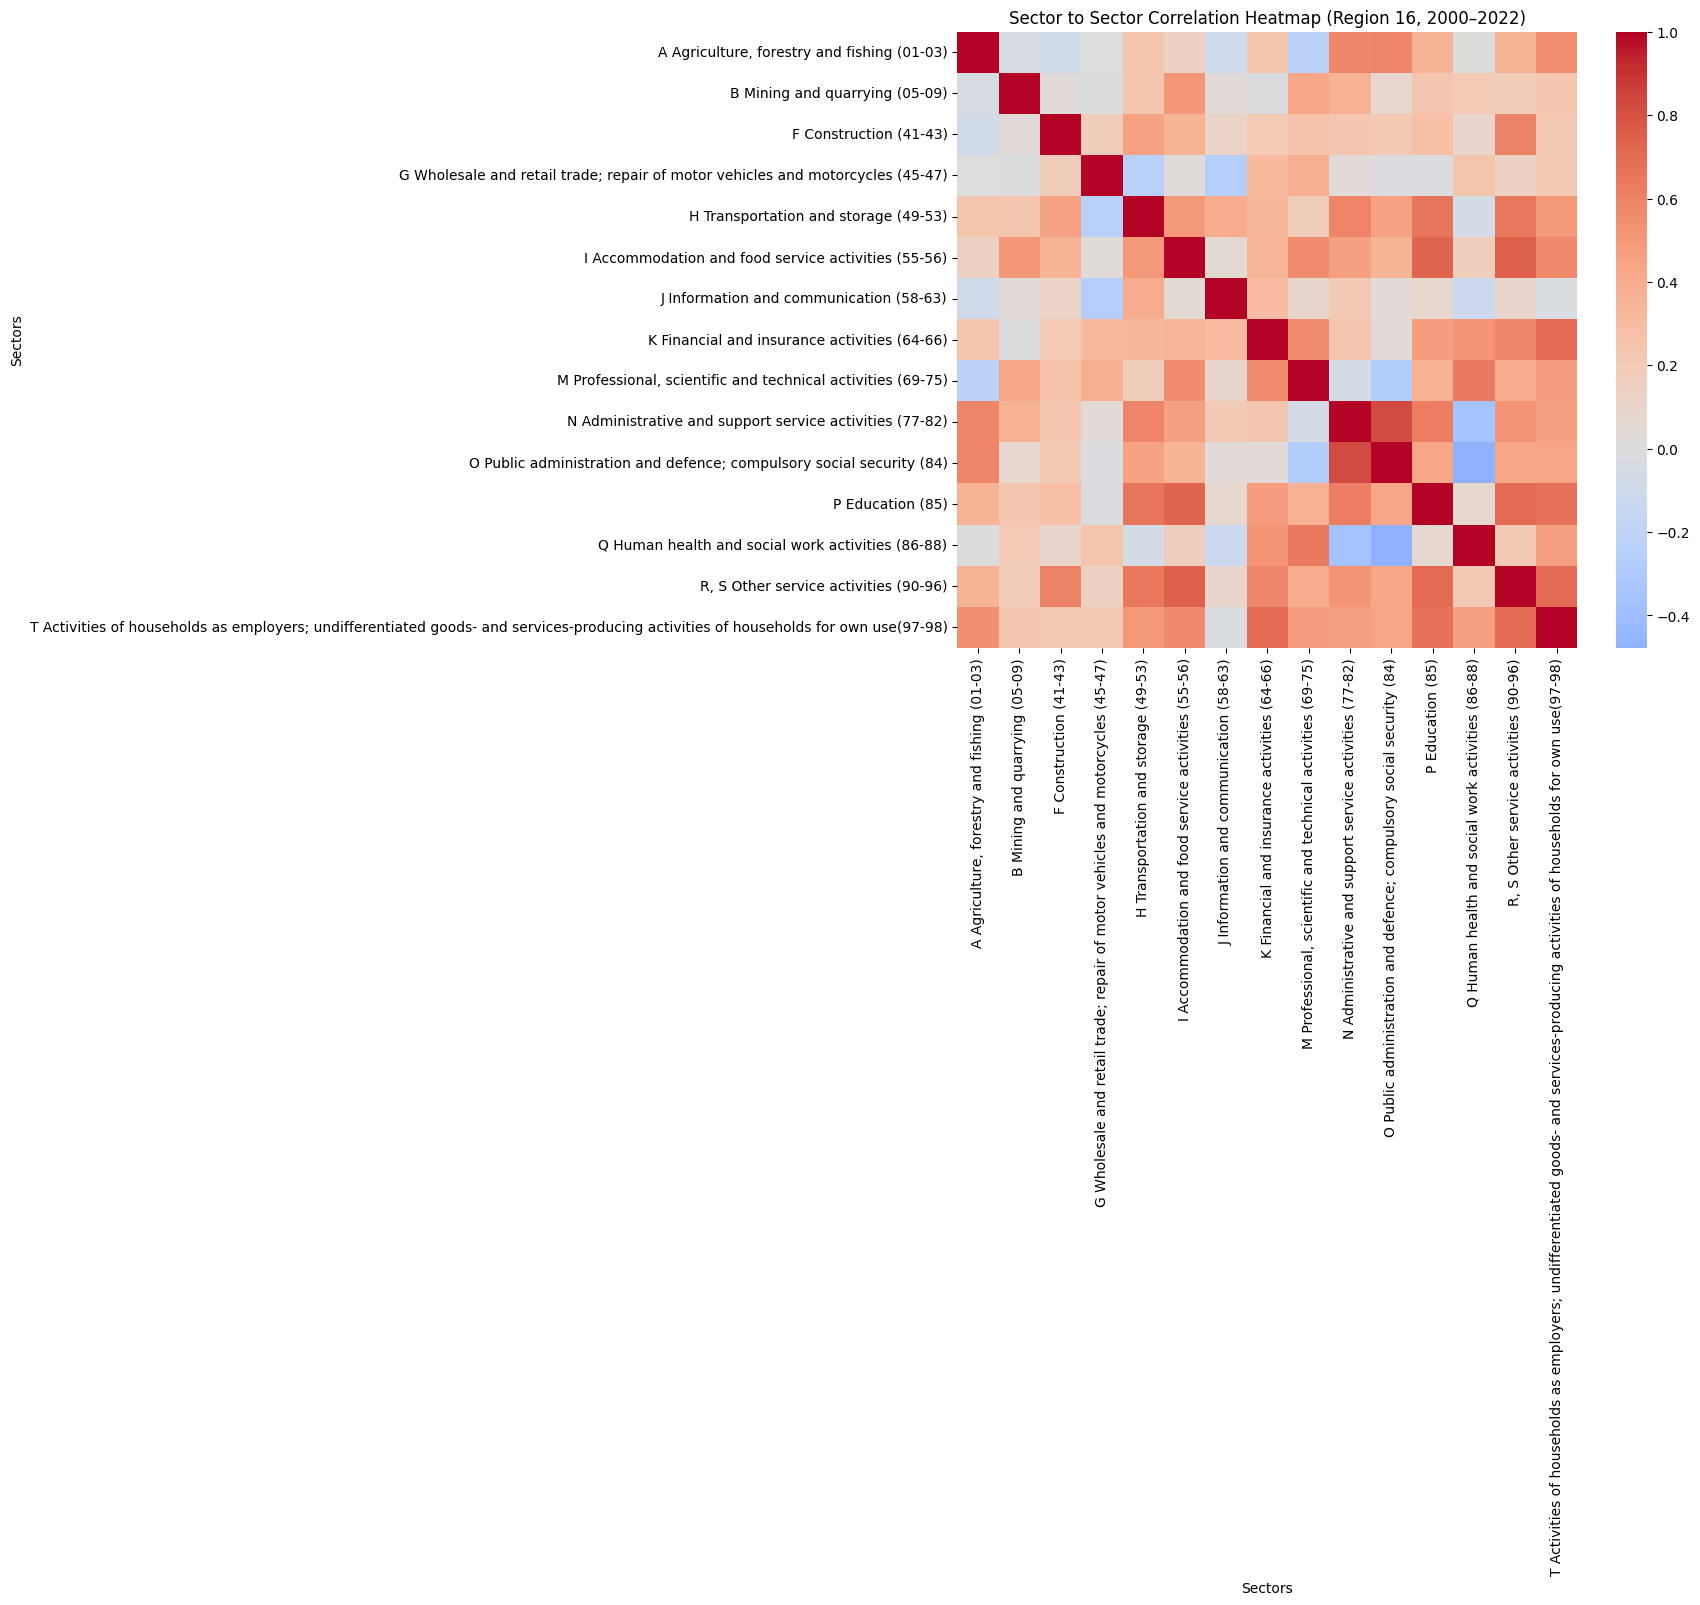

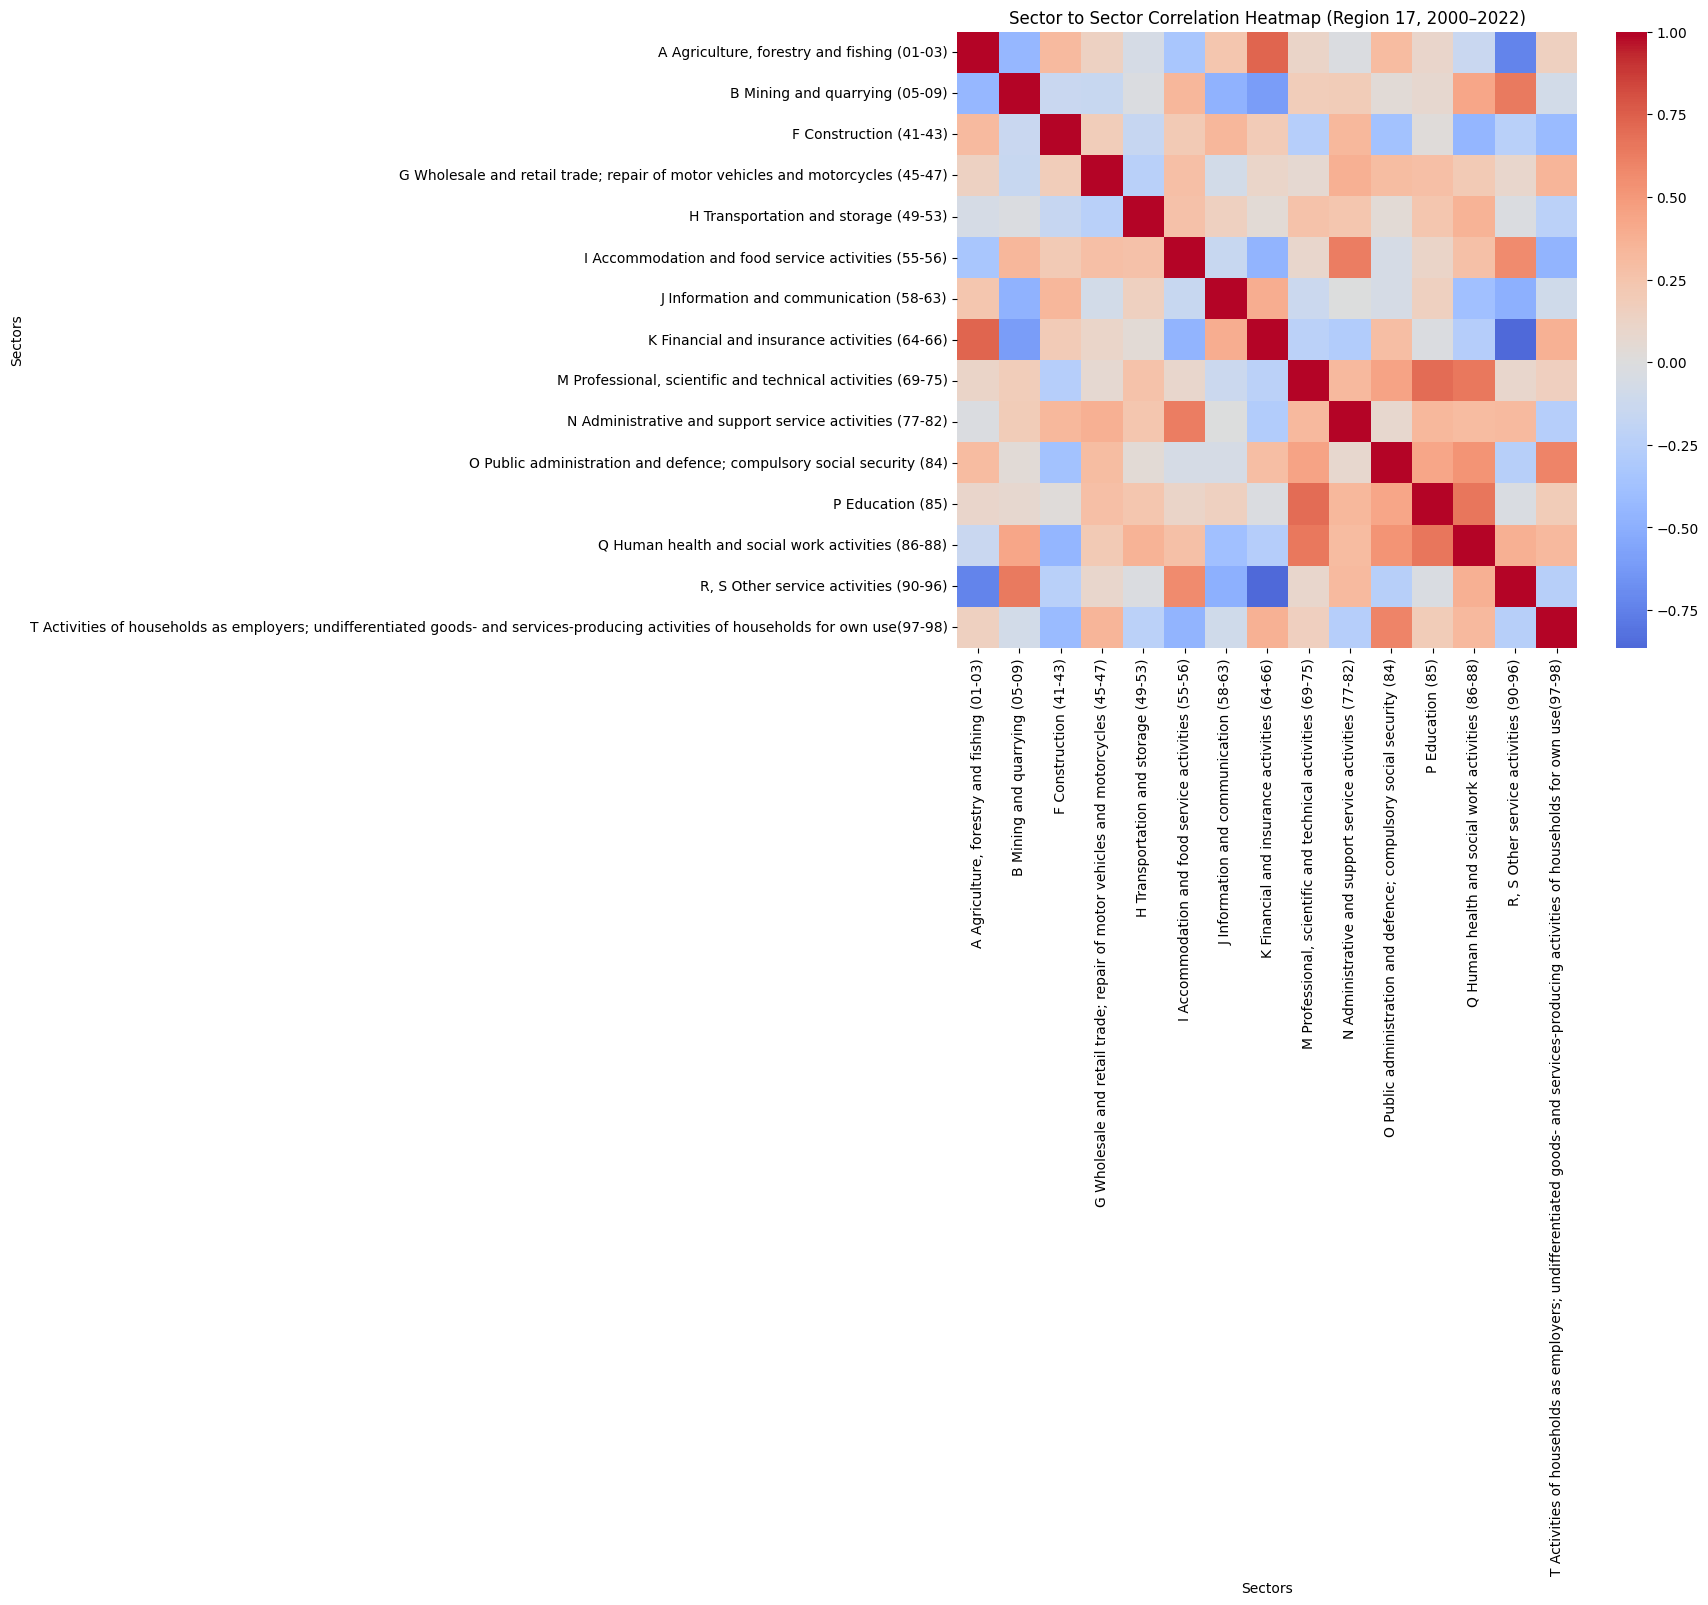

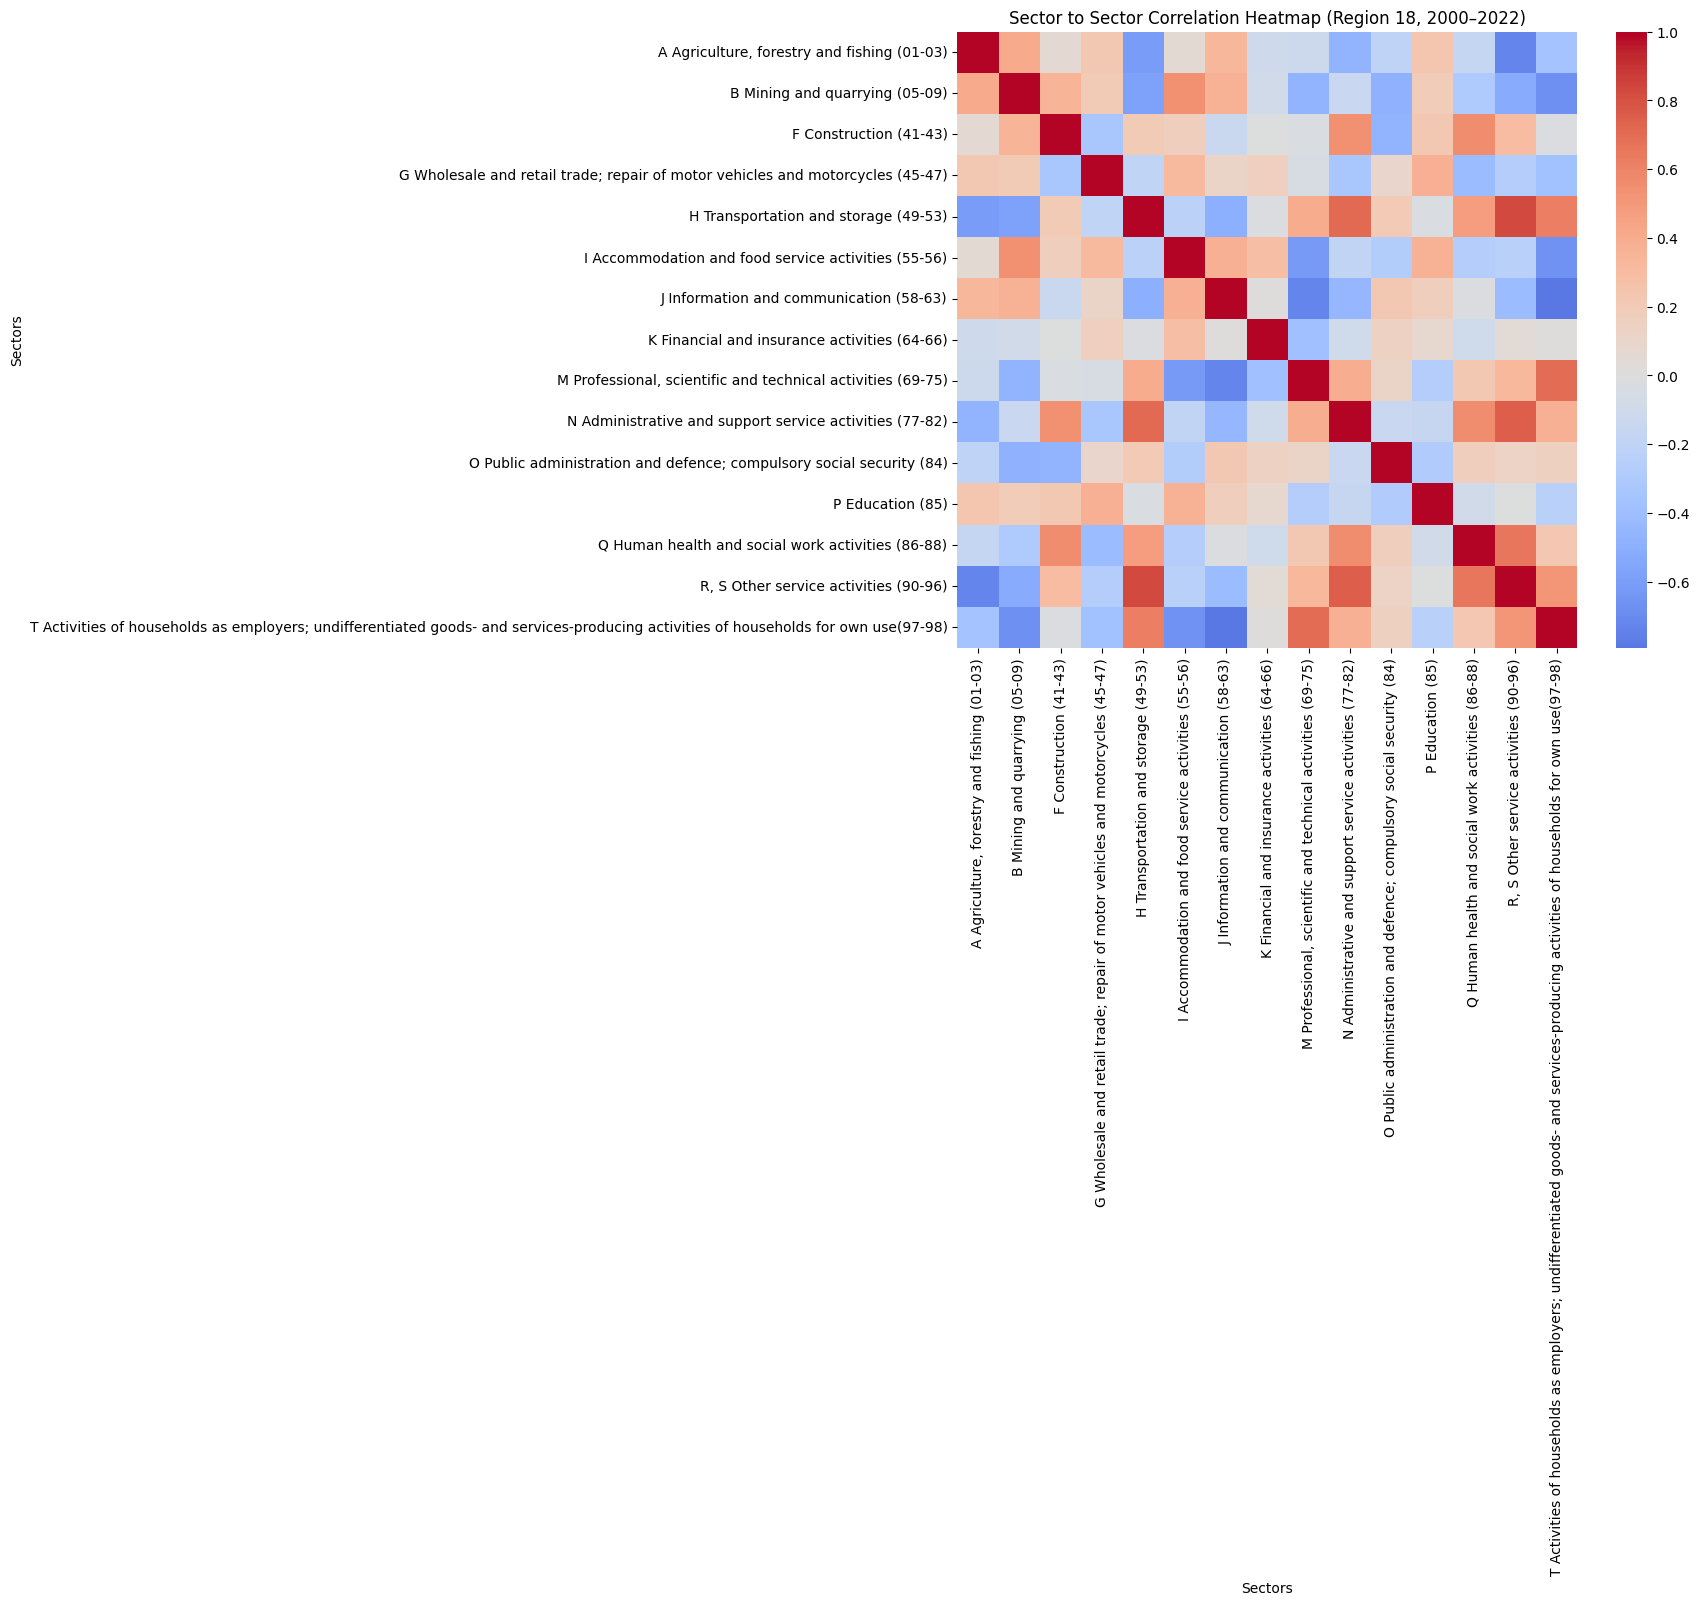

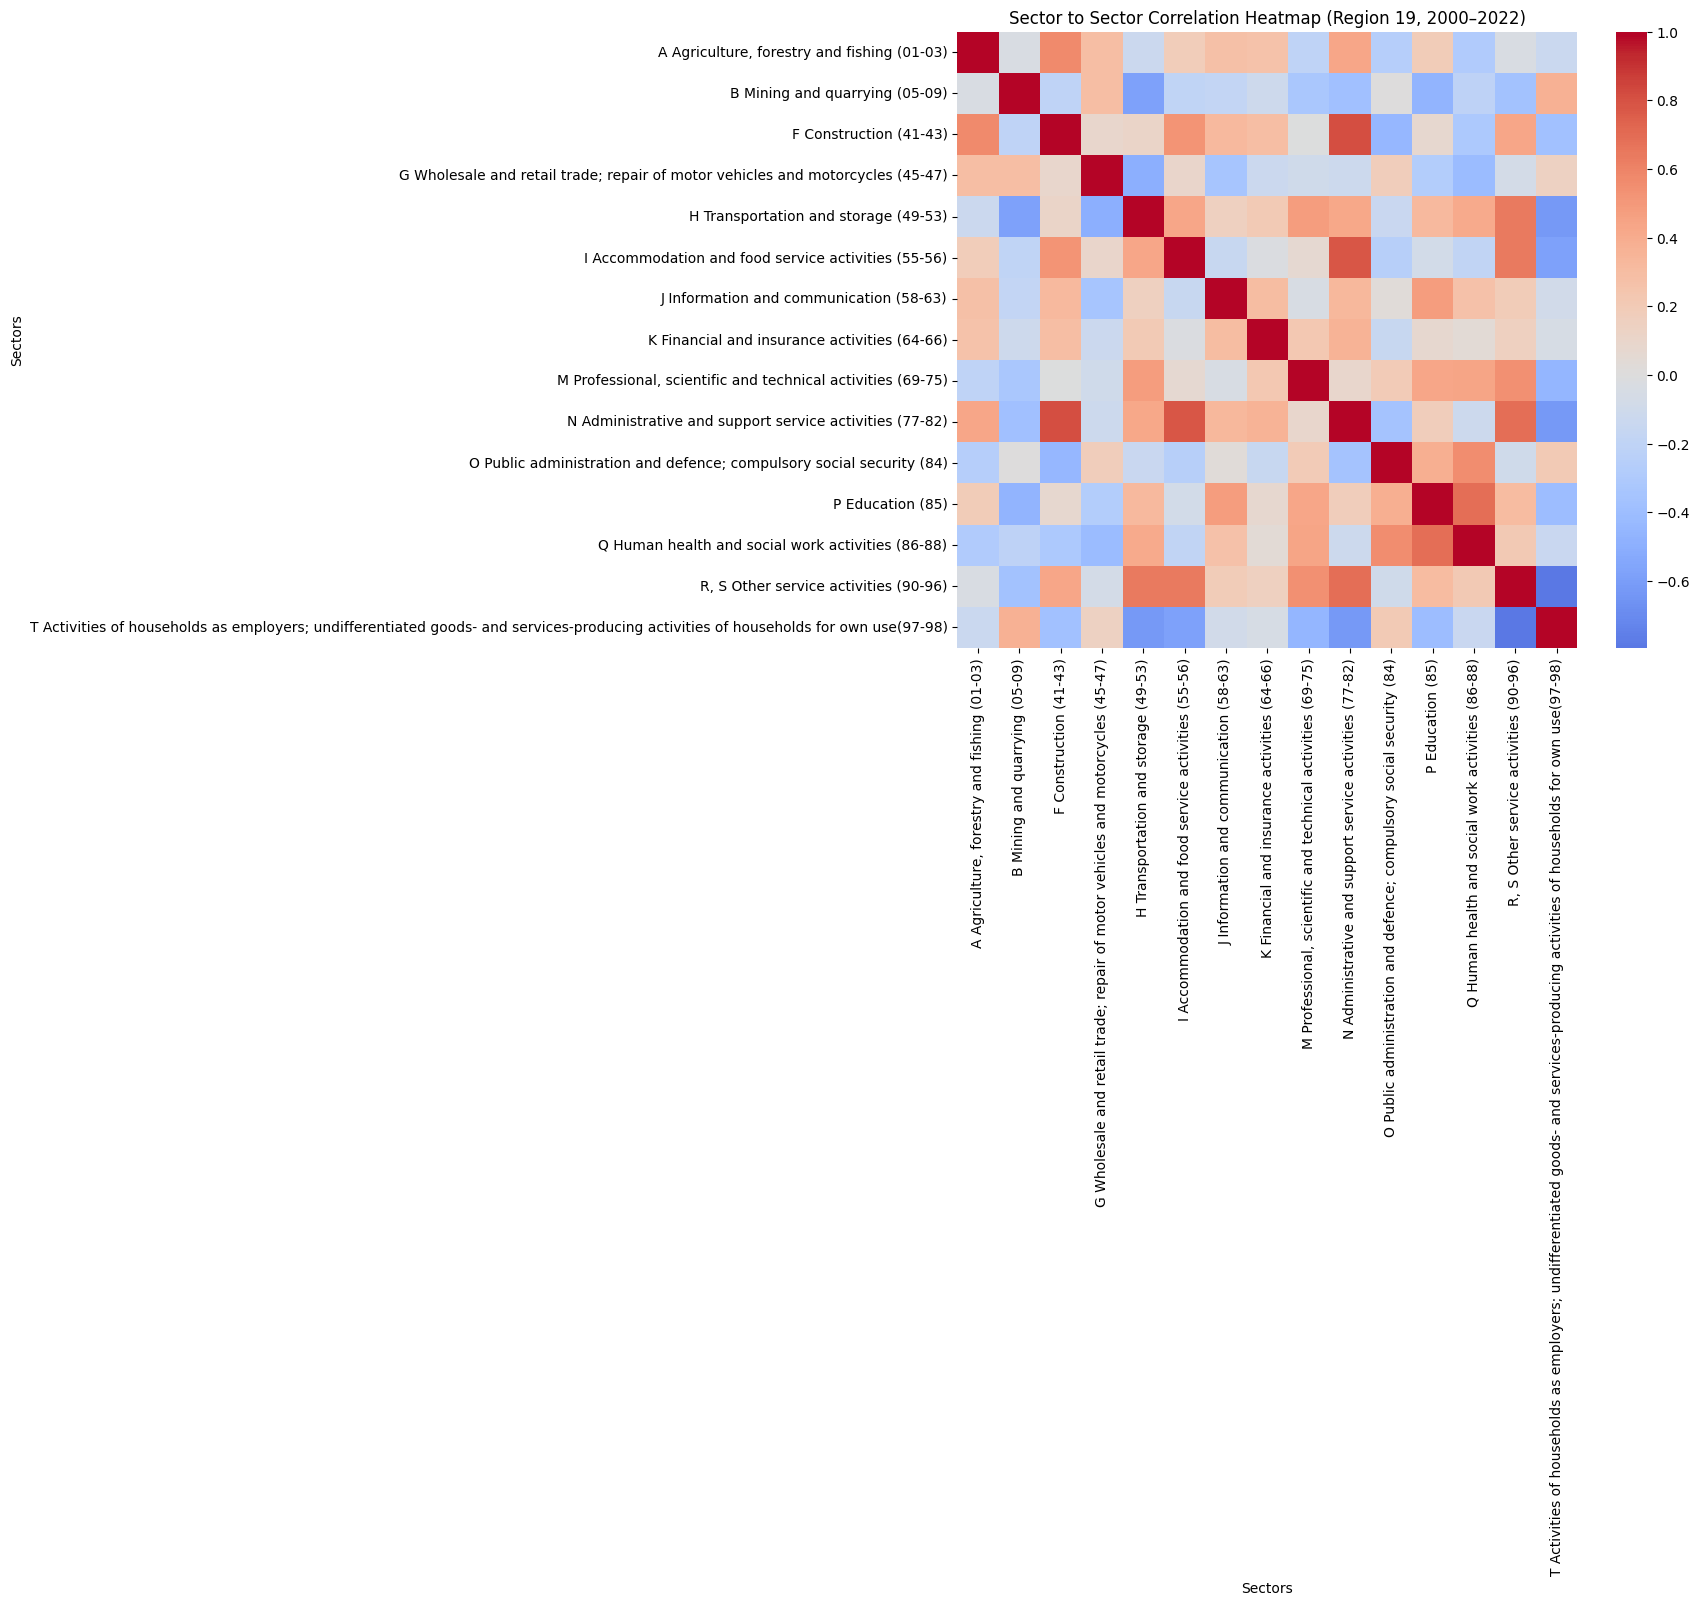

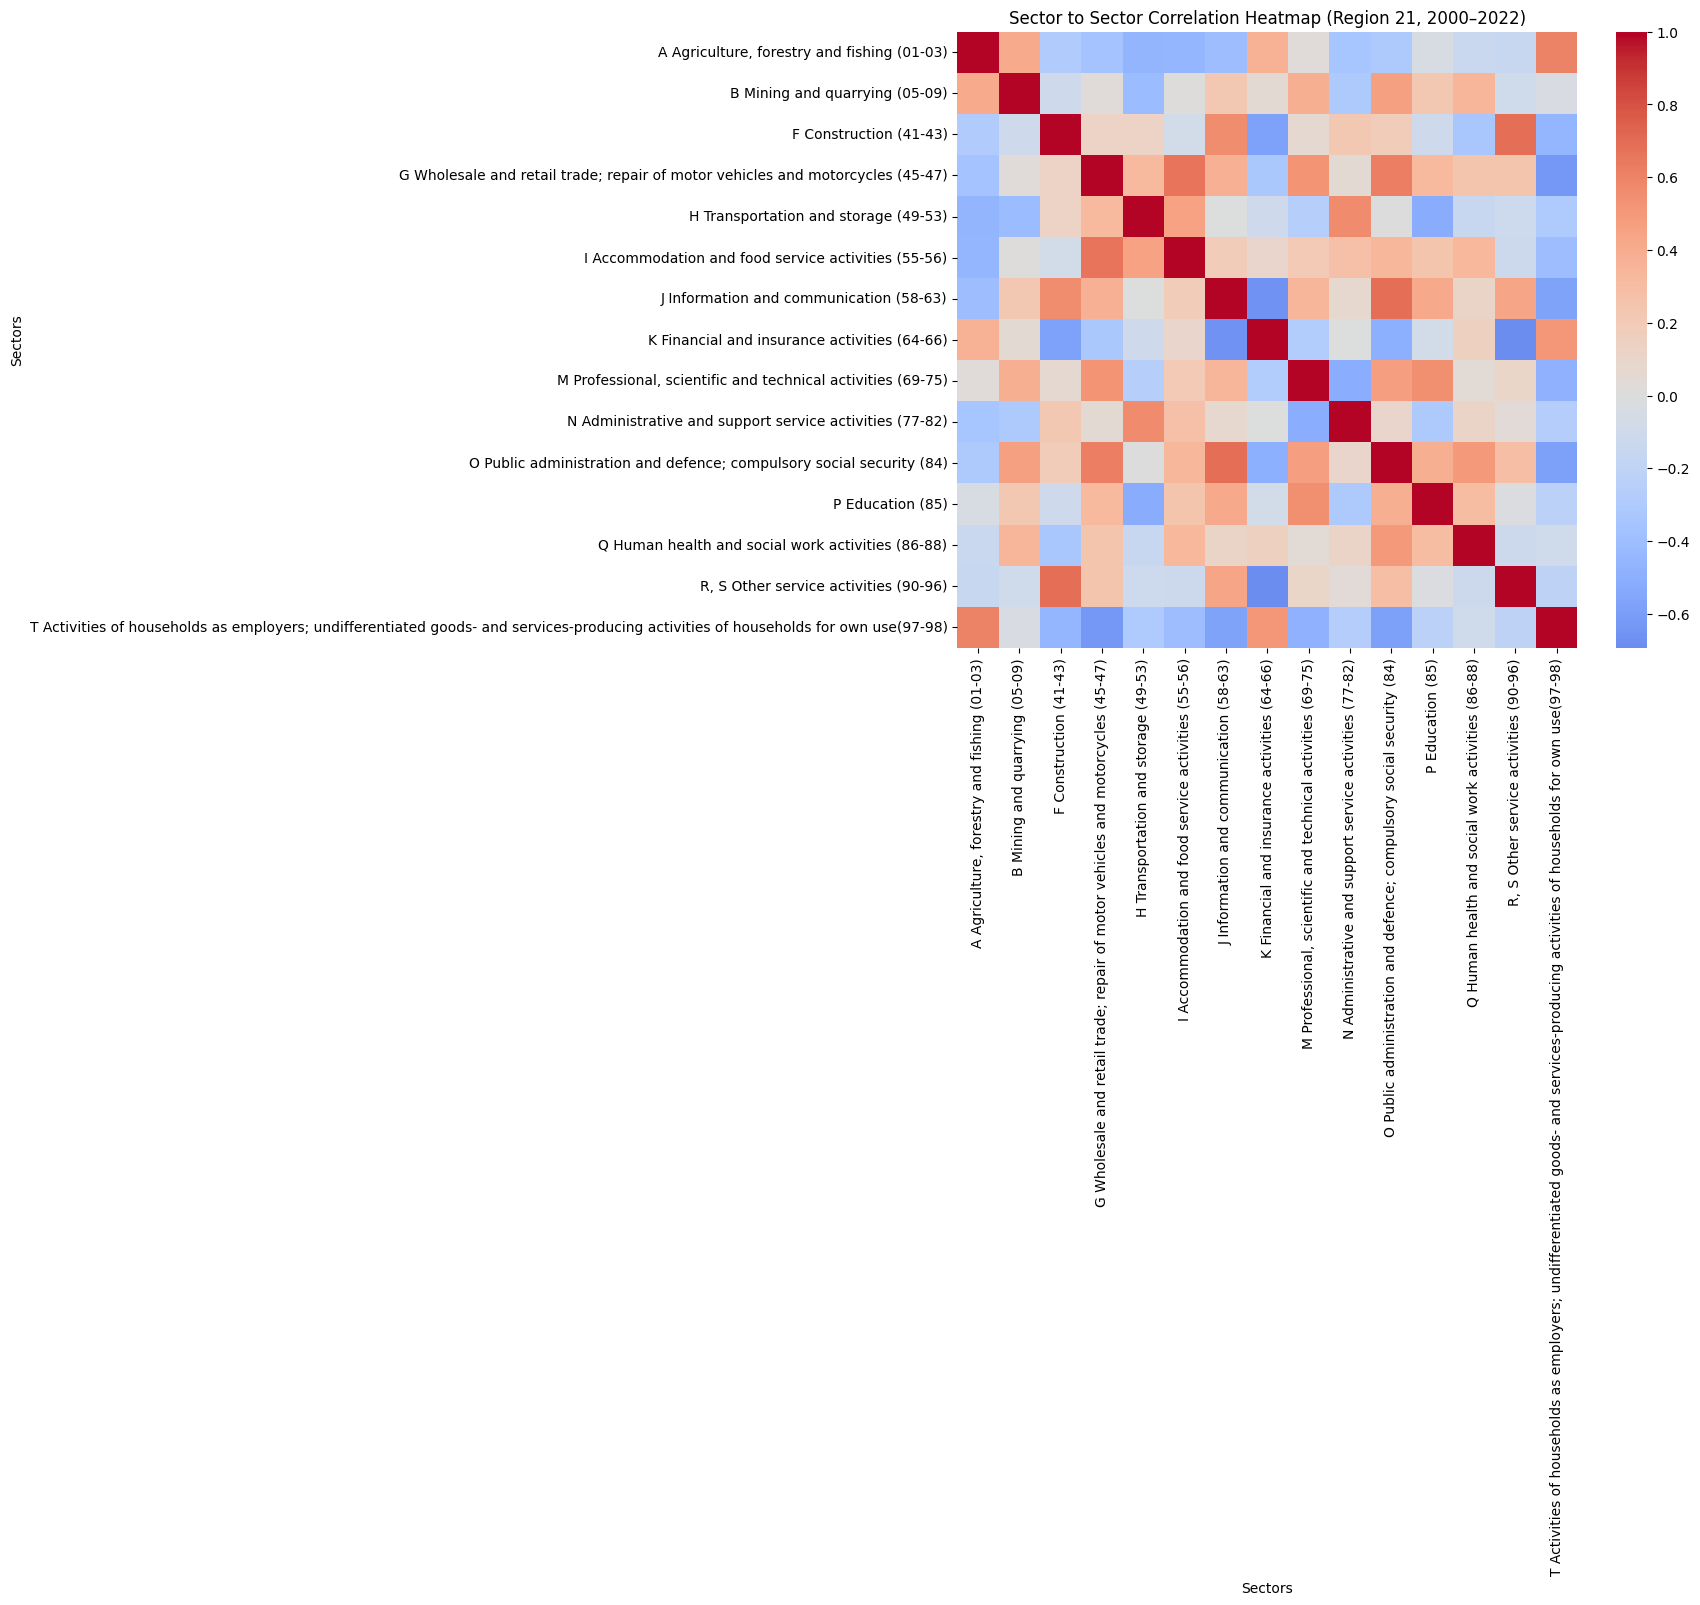

In [8]:
print("\nSector to Sector correlations per region (2000–2022)\n")

for region in regions:
    df_region = df_sector[df_sector["Region"] == region]
    df_region = df_region[["Year"] + sector_cols].dropna()

    #skip if too few observations
    if len(df_region) < 4:
        continue

    df_region_detrended = detrend_dataframe(df_region)
    corr_matrix = df_region_detrended.corr()

    #print(f"\nRegion: {region}")
    #print(corr_matrix.round(2))

    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", center=0)
    plt.title(f"Sector to Sector Correlation Heatmap (Region {region}, 2000–2022)")
    plt.xlabel("Sectors")
    plt.ylabel("Sectors")
    plt.tight_layout()
    plt.show()


### Similarity Matrices to compare regions


Similarity of 'Exports (euro)' correlation patterns between regions:

       1      2      4      5      6      7      8      9      10     11  \
1   1.000  0.021  0.555  0.556  0.577  0.231  0.277  0.366  0.357  0.475   
2   0.021  1.000  0.317  0.646  0.255  0.392 -0.199  0.023  0.101  0.165   
4   0.555  0.317  1.000  0.579  0.649  0.537  0.121  0.407  0.218  0.487   
5   0.556  0.646  0.579  1.000  0.515  0.384 -0.064  0.307  0.364  0.238   
6   0.577  0.255  0.649  0.515  1.000  0.602  0.193  0.308  0.348  0.615   
7   0.231  0.392  0.537  0.384  0.602  1.000  0.215  0.487 -0.019  0.575   
8   0.277 -0.199  0.121 -0.064  0.193  0.215  1.000  0.076  0.130  0.322   
9   0.366  0.023  0.407  0.307  0.308  0.487  0.076  1.000  0.357  0.625   
10  0.357  0.101  0.218  0.364  0.348 -0.019  0.130  0.357  1.000  0.426   
11  0.475  0.165  0.487  0.238  0.615  0.575  0.322  0.625  0.426  1.000   
12  0.101  0.171  0.173 -0.007  0.491  0.531  0.468  0.226  0.193  0.313   
13  0.501  0.205 

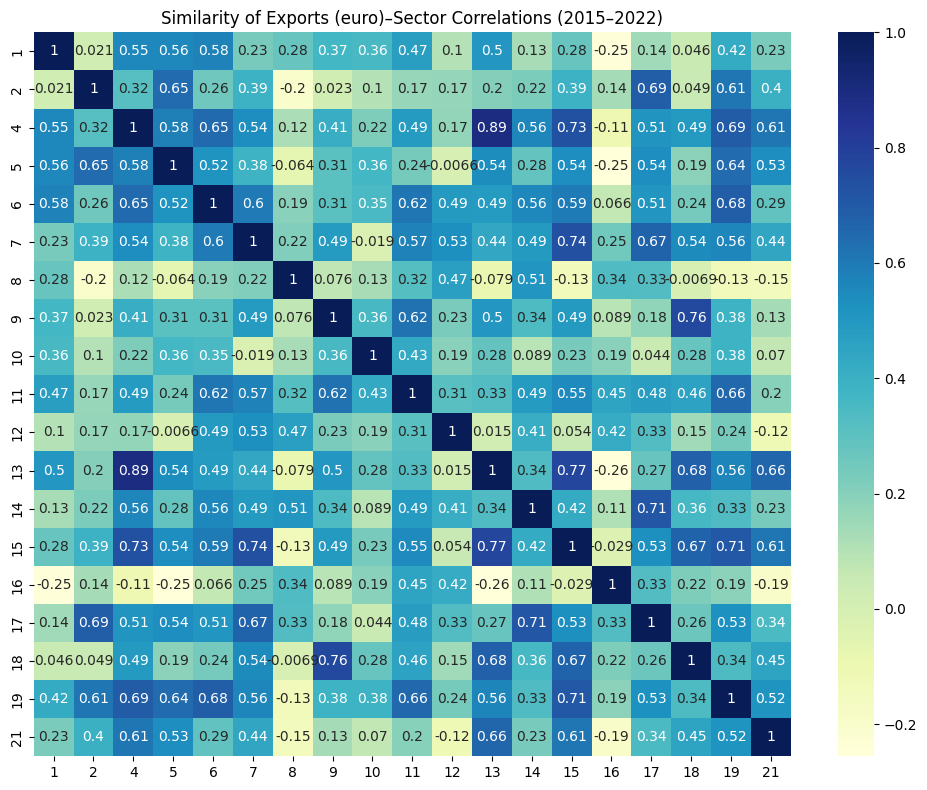


Similarity of 'Imports (euro)' correlation patterns between regions:

       1      2      4      5      6      7      8      9      10     11  \
1   1.000 -0.203 -0.278  0.407  0.569 -0.117  0.189  0.213  0.233  0.199   
2  -0.203  1.000  0.427 -0.014  0.239  0.579  0.243  0.560  0.098 -0.549   
4  -0.278  0.427  1.000  0.102 -0.054  0.061  0.090  0.002  0.340 -0.336   
5   0.407 -0.014  0.102  1.000  0.551 -0.138  0.494  0.103  0.818 -0.025   
6   0.569  0.239 -0.054  0.551  1.000  0.267  0.730  0.430  0.302 -0.007   
7  -0.117  0.579  0.061 -0.138  0.267  1.000  0.100  0.486 -0.121 -0.023   
8   0.189  0.243  0.090  0.494  0.730  0.100  1.000  0.282  0.422 -0.075   
9   0.213  0.560  0.002  0.103  0.430  0.486  0.282  1.000  0.007 -0.143   
10  0.233  0.098  0.340  0.818  0.302 -0.121  0.422  0.007  1.000  0.022   
11  0.199 -0.549 -0.336 -0.025 -0.007 -0.023 -0.075 -0.143  0.022  1.000   
12  0.496 -0.286 -0.287  0.158 -0.108 -0.403 -0.145 -0.156  0.274  0.262   
13  0.392 -0.246 

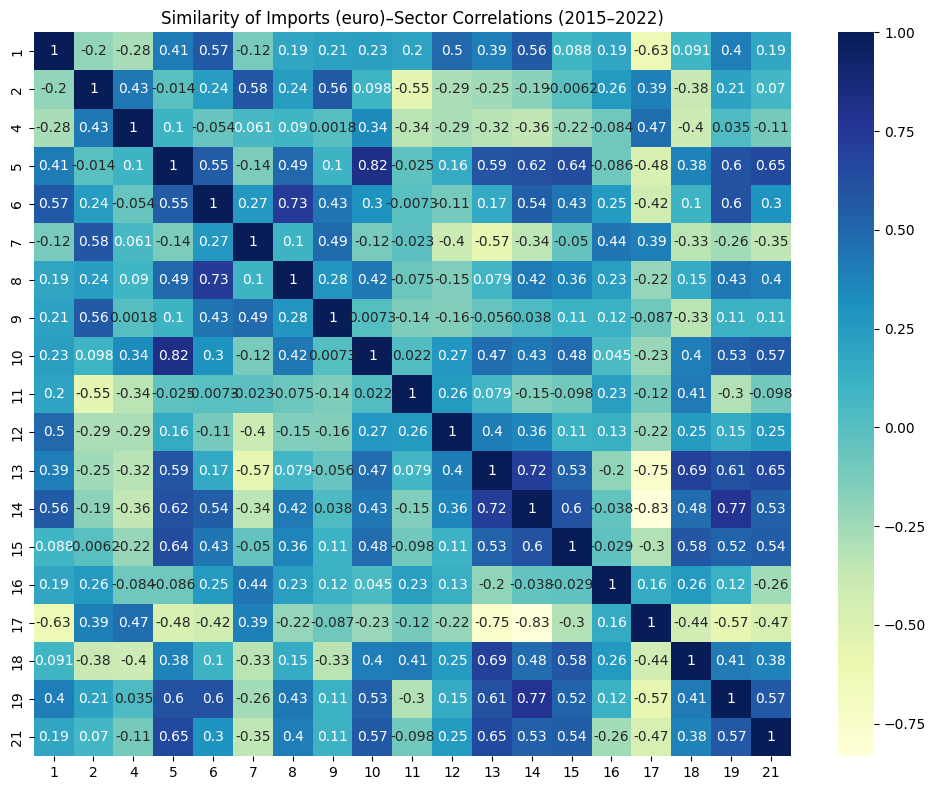

In [9]:
#store correlations per trade variable
trade_similarity = {}

for trade_var in trade_cols:
    trade_vectors = {}

    for region in regions:
        df_region = df_impexp[df_impexp["Region"] == region]
        df_region = df_region[["Year"] + trade_cols + sector_cols].dropna()
        if len(df_region) < 4:
            continue

        df_region_detrended = detrend_dataframe(df_region)
        corr = df_region_detrended[trade_cols + sector_cols].corr(method='spearman')
        #extract correlations between sectors and chosen trade variable
        trade_vector = corr.loc[sector_cols, trade_var]
        trade_vectors[region] = trade_vector.values

    #convert to DataFrame (rows = regions, columns = sectors)
    trade_df = pd.DataFrame(trade_vectors).T

    #compute pairwise cosine similarity between regions
    sim_matrix = cosine_similarity(trade_df)
    sim_df = pd.DataFrame(sim_matrix, index=trade_df.index, columns=trade_df.index)

    print(f"\nSimilarity of '{trade_var}' correlation patterns between regions:\n")
    print(sim_df.round(3))

    plt.figure(figsize=(10, 8))
    sns.heatmap(sim_df, annot=True, cmap="YlGnBu")
    plt.title(f"Similarity of {trade_var}–Sector Correlations (2015–2022)")
    plt.tight_layout()
    plt.show()
